## Importing libraries

In [1]:
import numpy as np
import random
import pandas
import matplotlib.pyplot as plt
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ruta_base = "/content/drive/MyDrive/CUARTO/TFG Pablo Pérez González. Videojuegos/data"


Mounted at /content/drive


## Class definition

In [34]:
class Room:
  objects = ["table", "chair", "door"]

  # textures = [
  #     {"texture": table_texture, "size": table_texture.shape},
  #     {"texture": chair_texture, "size": chair_texture.shape},
  #     {"texture": door_texture, "size": door_texture.shape}
  # ]

  # Constructor
  # Se le pasa el tamaño de la habitación mediante un par, p.e. size=(10,20)
  def __init__(self, size):
    self.matrix = np.zeros(size, dtype=int)
    self.text = []
    self.objectsCount = {}

  # Comprueba si al crear un nuevo objeto elimina completamente a otro
  def _isOverlap(self, i_start, i_end, j_start, j_end):
    pass

  # Se inserta un objeto a la matriz
  # :Params
  # objectName:str :- Nombre del elemento a añadir
  # objectSize: int :- Tamaño del elemento
  # position: str :- Posición donde se añadirá
  def addObject(self, objectName: str, objectSize: int, position: str):
    # Calculo el valor que tendra en la matriz segun el diccionario de elementos validos
    objectValue = self.objects.index(objectName) + 1

    size_str = ""
    if objectSize == 1:
      size_str = "small"
    elif objectSize == 2:
      size_str = "medium"
    elif objectSize == 3:
      size_str = "big"
    else:
      size_str = "very big"

    # Calculo las esquina sup-izq
    submatrix_size = objectSize
    up_left_corner_y = None
    up_left_corner_x = None
    # Posicion en eje y
    if "center" in position or "middle" in position:
      up_left_corner_y = (self.matrix.shape[0] - objectSize) // 2
    if "top" in position or "up" in position:
      up_left_corner_y = 0
    if "bottom" in position or "down" in position:
      up_left_corner_y = (self.matrix.shape[0] - objectSize)
    # Posicion en eje x
    if "center" in position or "middle" in position:
      up_left_corner_x = (self.matrix.shape[1] - objectSize) // 2
    if "left" in position:
      up_left_corner_x = 0
    if "right" in position:
      up_left_corner_x = (self.matrix.shape[1] - objectSize)

    if np.sum(self.matrix[up_left_corner_y : up_left_corner_y + submatrix_size,
               up_left_corner_x : up_left_corner_x + submatrix_size]) > 0:
      print(f'OVERLAP, {objectName} in {up_left_corner_y}')
    else:
      if not objectName in self.objectsCount:
        self.objectsCount[objectName] = {
          # "count": 1,
          "values": [(position, size_str)]
        }
      else:
        self.objectsCount[objectName]["values"].append((position, size_str))
      self.matrix[up_left_corner_y : up_left_corner_y + submatrix_size,
               up_left_corner_x : up_left_corner_x + submatrix_size] = np.full((submatrix_size, submatrix_size), objectValue)

  # Genera el texto a partir de la matriz en modo lista "3 de X, 5 de Y, etc"
  def list_prompt(self):
    # Modo lista
    text = "TFGMapPablo map of a square room where there "
    # print(list(self.objectsCount.values())[0])
    # if len(self.objectsCount.values()) > 1 or len(list(self.objectsCount.values())[0]["values"]) > 1:
    #   text += "are "
    # else:
    text += "is "
    if len(self.objectsCount.keys()) == 1:
      for position, size_str in self.objectsCount[list(self.objectsCount.keys())[0]]["values"]:
        text += "a " + size_str + " "
        text += list(self.objectsCount.keys())[0] + " at "
        text += position + ", "
    else:
      for roomObject in self.objectsCount:
        if roomObject == list(self.objectsCount.keys())[-1]:
          text = text[:-2]
          text += " and "
        for position, size_str in self.objectsCount[roomObject]["values"]:
          text += "a " + size_str + " "
          text += roomObject + " at "
          text += position + ", "
    text = text[:-2]
    self.text.append(text)
    # self.text = text

  def generateImage(self):
    # Obtener todos los valores únicos en la matriz
    valores_unicos = np.array([0, 1, 2, 3, 4])

    # Obtener el valor máximo en la matriz
    max_valor = valores_unicos.max()

    # Generar una paleta de colores HSV con suficientes colores para cubrir todos los valores posibles
    colores_hsv = np.zeros((max_valor + 1, 1, 3), dtype=np.uint8)
    colores_hsv[:, 0, 0] = np.linspace(0, 179, max_valor + 1)  # Tonos (0 a 179)
    colores_hsv[:, 0, 1] = 255  # Saturación constante
    colores_hsv[:, 0, 2] = 255  # Valor constante

    # Convertir la paleta HSV a formato RGB
    colores_rgb = cv2.cvtColor(colores_hsv, cv2.COLOR_HSV2RGB)

    # Crear un diccionario para asignar colores a valores únicos
    color_dict = {valor: colores_rgb[valor][0][::-1] for valor in valores_unicos}

    # Crear una matriz de colores utilizando el diccionario
    matriz_colores = np.array([[color_dict[valor] for valor in fila] for fila in self.matrix])

    # Convertir la matriz de colores a formato uint8
    matriz_colores = matriz_colores.astype(np.uint8)

    # Crear la imagen con OpenCV
    imagen = cv2.cvtColor(matriz_colores, cv2.COLOR_RGB2BGR)

    imagen = cv2.resize(imagen, (512, 512), interpolation=cv2.INTER_NEAREST)
    return imagen

 #### Antiguo

In [ ]:
# chair_texture = cv2.imread("/content/drive/MyDrive/CUARTO/TFG Pablo Pérez González. Videojuegos/data/Textures/chair.jpg")
# table_texture = cv2.imread("/content/drive/MyDrive/CUARTO/TFG Pablo Pérez González. Videojuegos/data/Textures/table.jpg")
# door_texture = cv2.imread("/content/drive/MyDrive/CUARTO/TFG Pablo Pérez González. Videojuegos/data/Textures/door.jpg")

class Room:
  objects = ["table", "chair", "door"]
  # textures = [
  #     {"texture": table_texture, "size": table_texture.shape},
  #     {"texture": chair_texture, "size": chair_texture.shape},
  #     {"texture": door_texture, "size": door_texture.shape}
  # ]
  def __init__(self, size):
    self.matrix = np.zeros(size, dtype=int)
    self.text = []
    self.objectsCount = {}



  def addObject(self, objectName: str, objectSize: int, position: str):

    objectValue = self.objects.index(objectName) + 1

    if not objectName in self.objectsCount:
      self.objectsCount[objectName] = {
          "count": 1,
          "positions": [position]
      }
    else:
      self.objectsCount[objectName]["count"] += 1
      self.objectsCount[objectName]["positions"].append(position)

    size_str = ""
    if objectSize == 1:
      size_str = "small"
    elif objectSize == 2:
      size_str = "medium"
    elif objectSize == 3:
      size_str = "big"
    else:
      size_str = "very big"

    submatrix_size = objectSize
    submatrix_row = None
    submatrix_column = None

    if "center" in position or "middle" in position:
      submatrix_row = (self.matrix.shape[0] - objectSize) // 2
    if "top" in position or "up" in position:
      submatrix_row = 0
    if "bottom" in position or "down" in position:
      submatrix_row = (self.matrix.shape[0] - objectSize)

    if "center" in position or "middle" in position:
      submatrix_column = (self.matrix.shape[1] - objectSize) // 2
    if "left" in position:
      submatrix_column = 0
    if "right" in position:
      submatrix_column = (self.matrix.shape[1] - objectSize)

    #print(f"{submatrix_row}:{submatrix_row+submatrix_size}, {submatrix_column}:{submatrix_column+submatrix_size}")

    self.matrix[submatrix_row : submatrix_row + submatrix_size,
               submatrix_column : submatrix_column + submatrix_size] = np.full((submatrix_size, submatrix_size), objectValue)

  def generateText(self):
    self.text = []
    # Modo lista
    text = "TFGMapDebt map of a square room where there "
    if len(self.objectsCount.values()) > 1 or list(self.objectsCount.values())[0]["count"] > 1:
      text += "are "
    else:
      text += "is "

    for roomObject in self.objectsCount:
      if roomObject == list(self.objectsCount.keys())[-1]:
        text = text[:-2]
        text += " and "
      text += (str(self.objectsCount[roomObject]["count"]) + " ") if (self.objectsCount[roomObject]["count"] > 1) else "a "
      text += roomObject + ("s at " if (self.objectsCount[roomObject]["count"] > 1) else " at ")
      for position in self.objectsCount[roomObject]["positions"]:
        text += position + ", "
    text = text[:-2]
    self.text.append(text)

    # Relación centro-bordes-esquinas
    # text = ""
    # corners_count = 0
    # corners_objects = []
    # center_count = 0
    # center_objects = []
    # edges_count = 0
    # edges_objects = []
    # for roomObject in self.objectsCount:
    #   # print(roomObject, " -> ", self.objectsCount[roomObject])
    #   for position in self.objectsCount[roomObject]["positions"]:
    #     if "center" not in position:
    #       corners_count += 1
    #       if not roomObject in corners_objects and not (roomObject + "s") in corners_objects:
    #         corners_objects.append(roomObject)
    #       elif roomObject in corners_objects:
    #         corners_objects[corners_objects.index(roomObject)] += "s"
    #     elif position == "center":
    #       center_count += 1
    #       if not roomObject in center_objects and not (roomObject + "s") in center_objects:
    #         center_objects.append(roomObject)
    #       elif roomObject in center_objects:
    #         center_objects[center_objects.index(roomObject)] += "s"
    #     else:
    #       edges_count += 1
    #       if not roomObject in edges_objects and not (roomObject + "s") in edges_objects:
    #         edges_objects.append(roomObject)
    #       elif roomObject in edges_objects:
    #         edges_objects[edges_objects.index(roomObject)] += "s"

    # text += "Some "
    # # print(center_count, corners_count, edges_count)
    # if corners_count > 0:
    #   for roomObject in corners_objects:
    #     text += roomObject + ", "
    #   text = text[:-2]
    #   # Cambia la ultima coma por un and
    #   text = re.sub(r',\s*([^,]+)$', r' and \1', text)
    #   text += " are located in the corners"
    #   if edges_count > 0:
    #     if center_count == 0:
    #       text += " and some "
    #     else:
    #       text += ", some "
    #     for roomObject in edges_objects:
    #       text += roomObject + ", "
    #     text = text[:-2]
    #     if edges_count > 1:
    #       text = re.sub(r',\s*([^,]+)$', r' and \1', text)
    #     text += " at the edges "
    #   if center_count > 0:
    #     text += "and some "
    #     for roomObject in center_objects:
    #       text += roomObject + ", "
    #     text = text[:-2]
    #     if center_count > 1:
    #       text = re.sub(r',\s*([^,]+)$', r' and \1', text)
    #     text += " in the center"
    # elif edges_count > 0:
    #   for roomObject in edges_objects:
    #     text += roomObject + ", "
    #   text = text[:-2]
    #   text = re.sub(r',\s*([^,]+)$', r' and \1', text)
    #   text += " are located at the edges"
    #   if corners_count > 0:
    #     if center_count == 0:
    #       text += " and some "
    #     else:
    #       text += ", some "
    #     for roomObject in corners_objects:
    #       text += roomObject + ", "
    #     text = text[:-2]
    #     if corners_count > 1:
    #       text = re.sub(r',\s*([^,]+)$', r' and \1', text)
    #     text += " in the corners "
    #   if center_count > 0:
    #     text += "and some "
    #     for roomObject in center_objects:
    #       text += roomObject + ", "
    #     text = text[:-2]
    #     if center_count > 1:
    #       text = re.sub(r',\s*([^,]+)$', r' and \1', text)
    #     text += " at the center"
    # elif center_count > 0:
    #   for roomObject in center_objects:
    #     text += roomObject + ", "
    #   text = text[:-2]
    #   text = re.sub(r',\s*([^,]+)$', r' and \1', text)
    #   text += " are located in the center"
    #   if edges_count > 0:
    #     if center_count == 0:
    #       text += " and some "
    #     else:
    #       text += ", some "
    #     for roomObject in edges_objects:
    #       text += roomObject + ", "
    #     text = text[:-2]
    #     if edges_count > 1:
    #       text = re.sub(r',\s*([^,]+)$', r' and \1', text)
    #     text += " at the edges"
    #   if center_count > 0:
    #     text += " and some "
    #     for roomObject in corners_objects:
    #       text += roomObject + ", "
    #     text = text[:-2]
    #     if corners_count > 1:
    #       text = re.sub(r',\s*([^,]+)$', r' and \1', text)
    #     text += " in the corners"
    # self.text.append(text)

    # A pares (una silla en frente de otra, etc)
    text = ""


  # def generateImage(self, result_width):
  def generateImage(self):
    # Normalize
    imageMatrix = (self.matrix / np.max(self.matrix) * 255).astype(np.uint8)
    color_map = cv2.applyColorMap(imageMatrix, cv2.COLORMAP_JET)
    color_map = cv2.resize(color_map, (200, 200), interpolation=cv2.INTER_NEAREST)

    # PARA LAS TEXTURAS
    # rows, cols = self.matrix.shape
    # Obtener el tamaño máximo de las texturas
    # max_height = max(texture["size"][0] for texture in self.textures)
    # max_width = max(texture["size"][1] for texture in self.textures)
    # Crear una imagen en blanco para almacenar el resultado
    # result = np.zeros((rows * max_height, cols * max_width, 3), dtype=np.uint8)
    # result = np.zeros((rows, cols, 3), dtype=np.uint8)
    # result[np.all(result==0, axis=2)] = 255

    # Iterar sobre la matriz
    # for i in range(rows):
    #     for j in range(cols):
    #         # print(result.shape)
    #         # Obtener el valor actual de la matriz
    #         value = self.matrix[i, j]

    #         for k in range(len(self.objects + 1)):
    #           if value == 0:
    #               continue


    #         # Buscar la textura correspondiente según el valor
    #         matching_color = color_map

            # Tomar la primera textura coincidente
            # selected_texture = matching_textures
            # Obtener la textura y su tamaño
            # texture = selected_texture["texture"]
            # texture_height, texture_width, _ = texture.shape

            # Obtener las coordenadas de la región actual
            # start_row = i * self.textures[0]["size"][0]
            # start_col = j * self.textures[0]["size"][1]
            # end_row = (i + 1) * self.textures[0]["size"][0]
            # end_col = (j + 1) * self.textures[0]["size"][1]

            # Calcular las proporciones de estiramiento
            # stretch_ratio_x = (end_col - start_col) / texture_width
            # stretch_ratio_y = (end_row - start_row) / texture_height

            # Ajustar el tamaño de la textura estirada
            # texture_stretched = cv2.resize(texture, None, fx=stretch_ratio_x, fy=stretch_ratio_y)

            # Pegar la textura estirada en la región correspondiente
            # result[start_row:end_row, start_col:end_col, :] = texture_stretched

    # height, width, _ = result.shape
    # Calcular el factor de escala para el eje Y
    # scale_factor = result_width / width
    # Calcular las nuevas dimensiones de la imagen
    # new_height = int(height * scale_factor)
    # resized_result = cv2.resize(result, (result_width, new_height))
    return color_map

## Test

In [35]:
room1 = Room((15, 15))
room1.matrix

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [36]:
room1.addObject("chair", 2, "bottom right")
room1.addObject("chair", 2, "center top")
room1.addObject("chair", 2, "center left")
room1.addObject("chair", 2, "center right")
room1.addObject("door", 1, "bottom left")
# room1.addObject("door", 1, "bottom center")
# room1.addObject("table", 5, "center")
# room1.addObject("table", 3, "top left")
# room1.addObject("table", 2, "top right")
# room1.addObject('chair', 2, "center")

print(room1.matrix, "\n")
room1.list_prompt()
print(room1.text)

[[0 0 0 0 0 0 2 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 2 0 0 0 0 0 0 0 0 0 0 0 2 2]
 [2 2 0 0 0 0 0 0 0 0 0 0 0 2 2]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 2]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 2 2]] 

['TFGMapPablo map of a square room where there is a medium chair at bottom right, a medium chair at center top, a medium chair at center left, a medium chair at center right and a small door at bottom left']


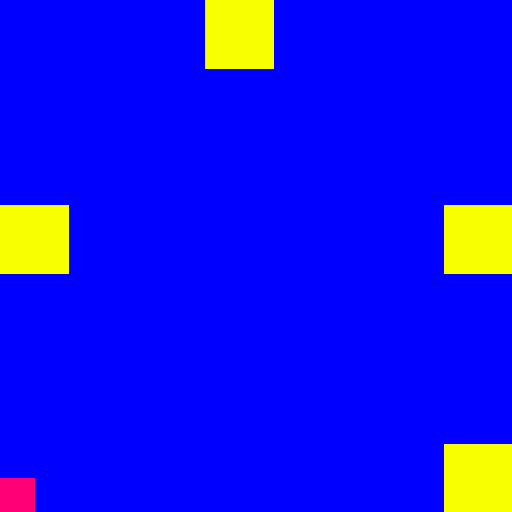

In [27]:
from google.colab.patches import cv2_imshow
cv2_imshow(room1.generateImage())

## Repetición en bucle

In [8]:
import random

room  0
    7 elementos
    Elemento: 0 en posición center bottom
    Elemento: 2 en posición center right
    Elemento: 1 en posición center left
    Elemento: 1 en posición top left
OVERLAP, chair in 0
    Elemento: 2 en posición top right
OVERLAP, door in 0
    Elemento: 0 en posición top right
    Elemento: 1 en posición top left
room  1
    8 elementos
    Elemento: 1 en posición top left
    Elemento: 2 en posición center right
    Elemento: 2 en posición top right
    Elemento: 0 en posición top right
OVERLAP, table in 0
    Elemento: 2 en posición top right
OVERLAP, door in 0
    Elemento: 2 en posición center top
OVERLAP, door in 0
    Elemento: 2 en posición center
OVERLAP, door in 4
    Elemento: 1 en posición center top
OVERLAP, chair in 0
room  2
    3 elementos
    Elemento: 1 en posición center bottom
    Elemento: 1 en posición center right
    Elemento: 1 en posición center
room  3
    3 elementos
    Elemento: 1 en posición top left
    Elemento: 0 en posición center


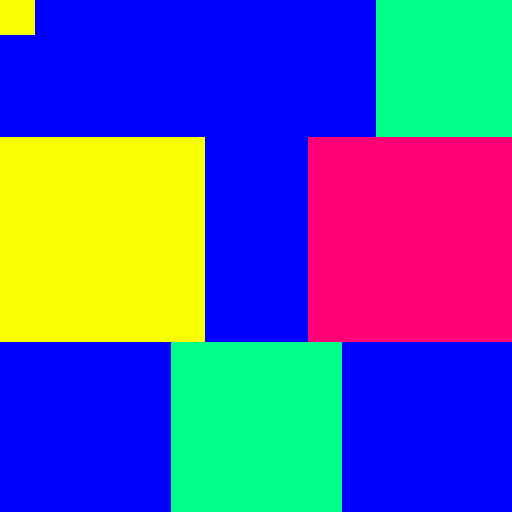

1/301


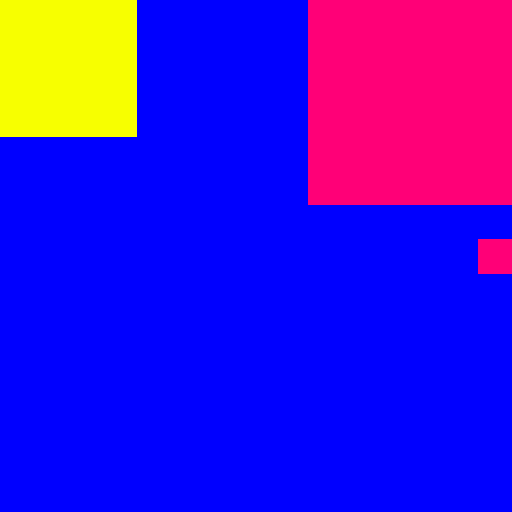

2/301


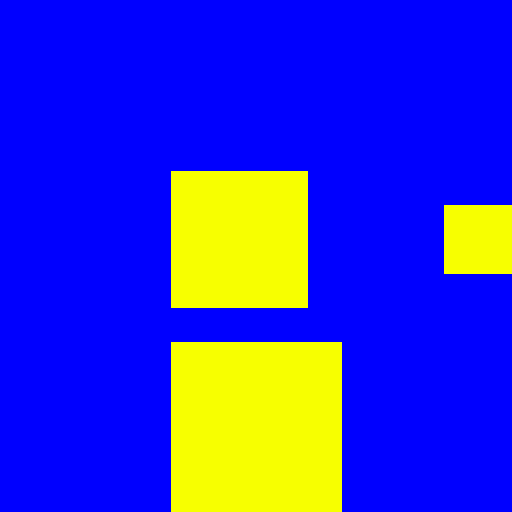

3/301


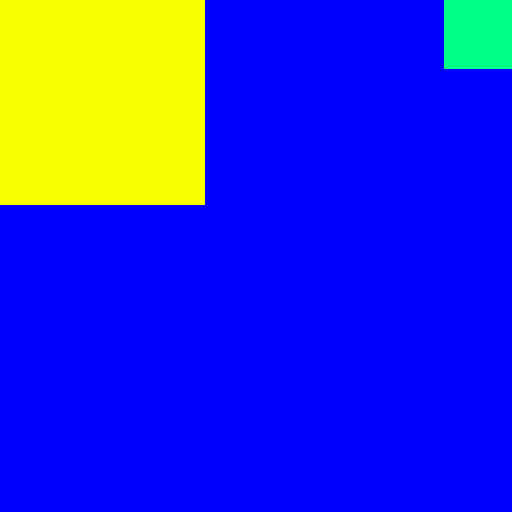

4/301


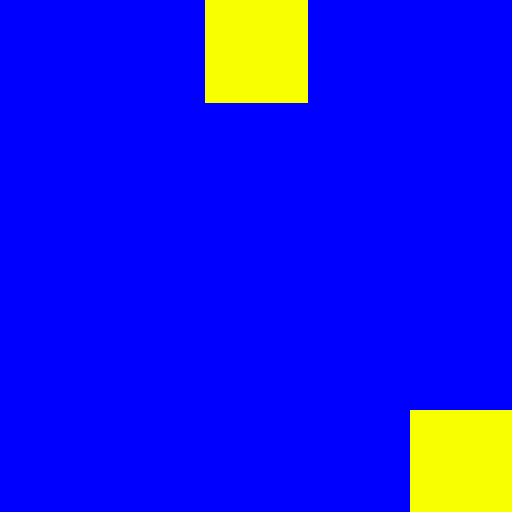

5/301


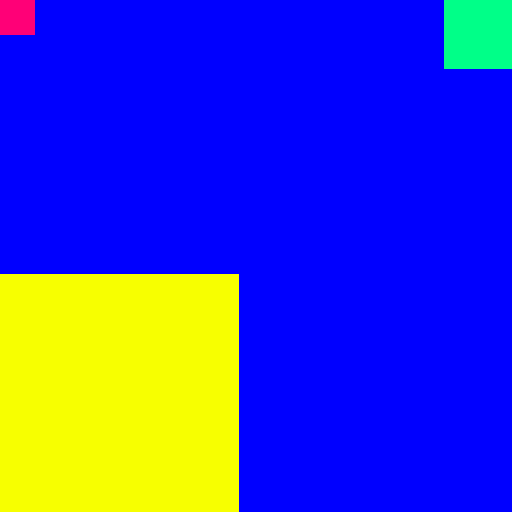

6/301


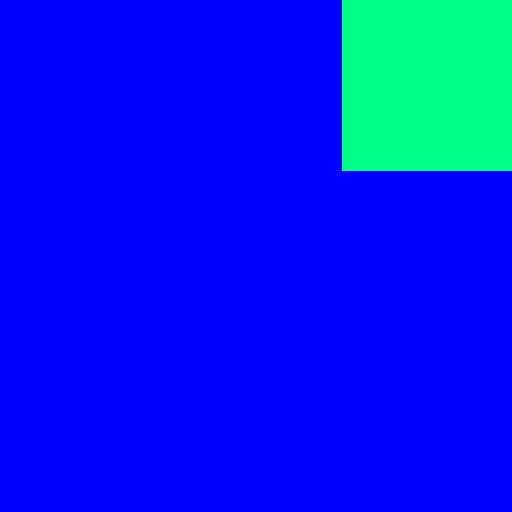

7/301


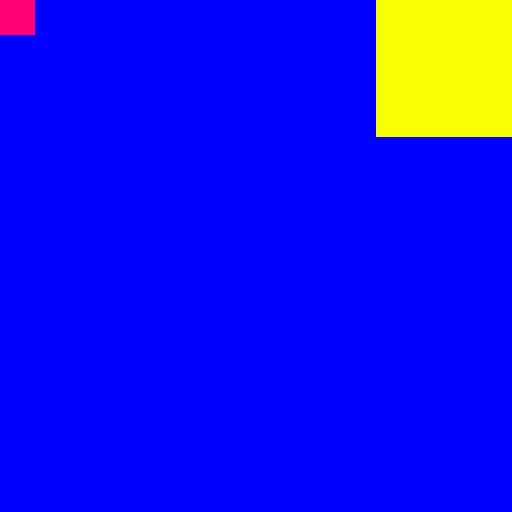

8/301


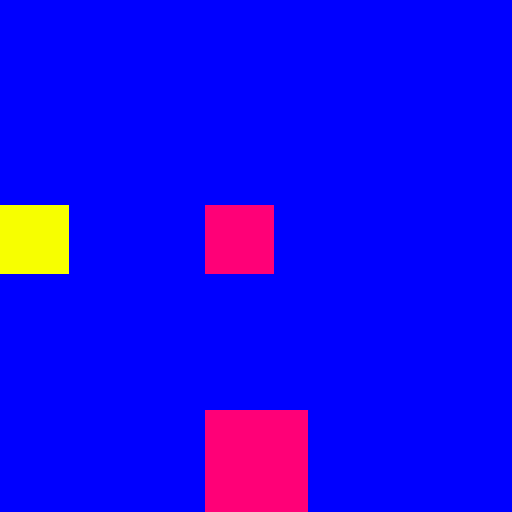

9/301


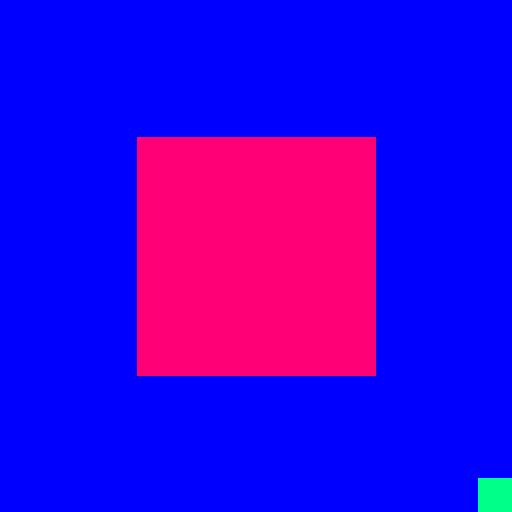

10/301


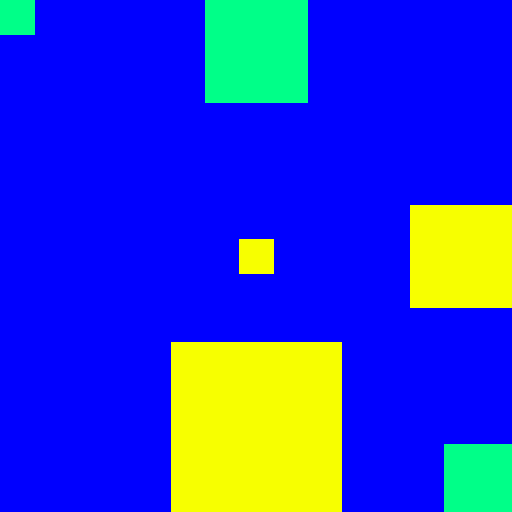

11/301


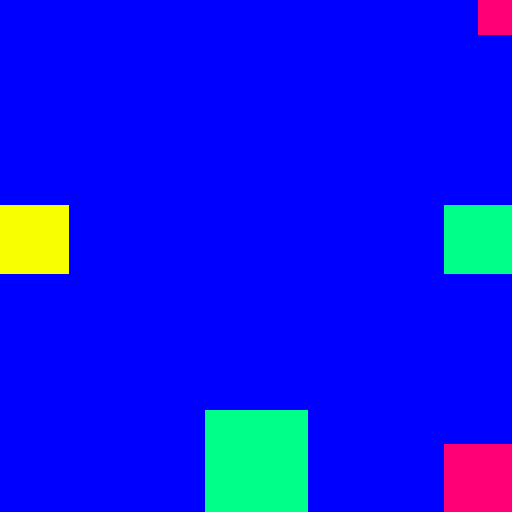

12/301


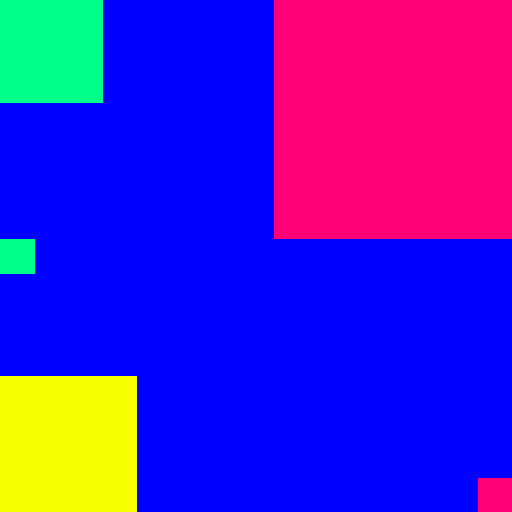

13/301


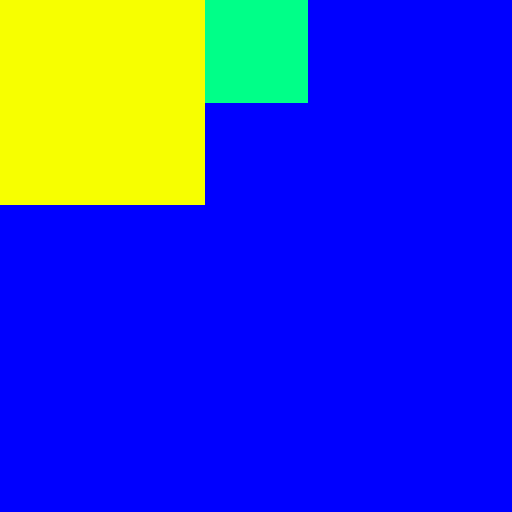

14/301


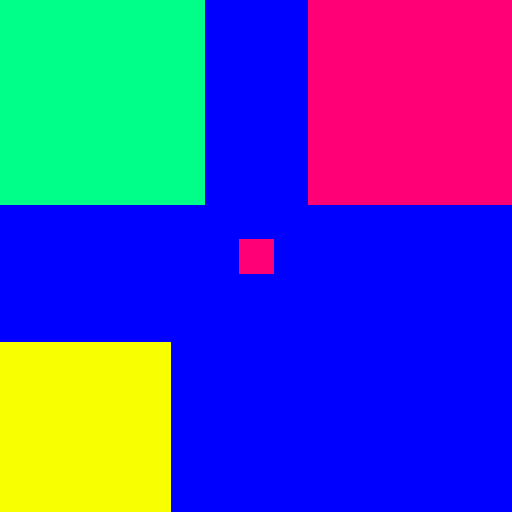

15/301


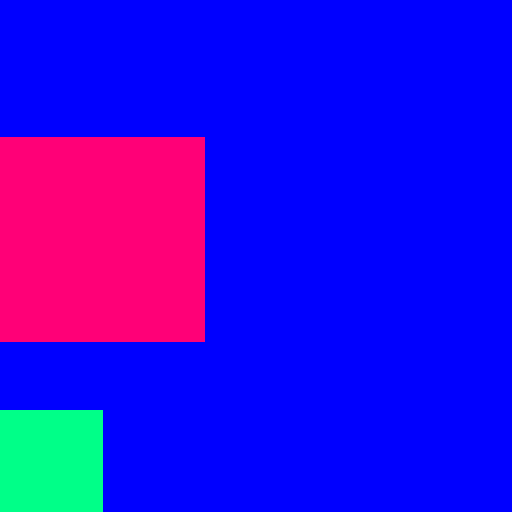

16/301


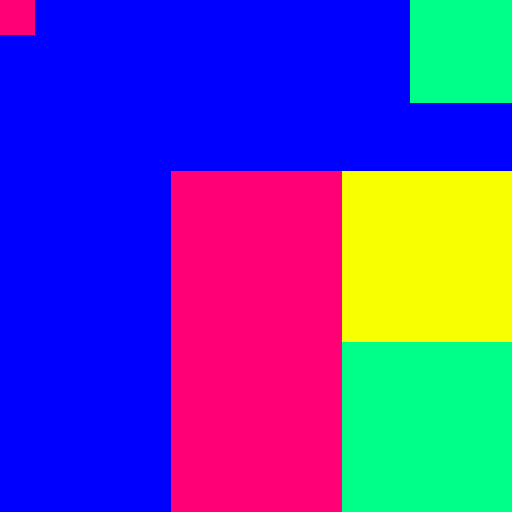

17/301


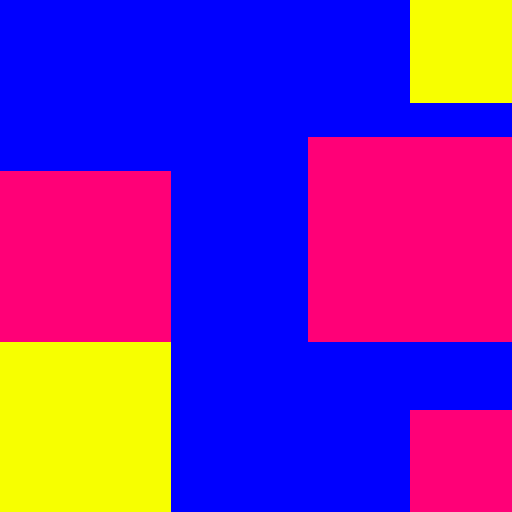

18/301


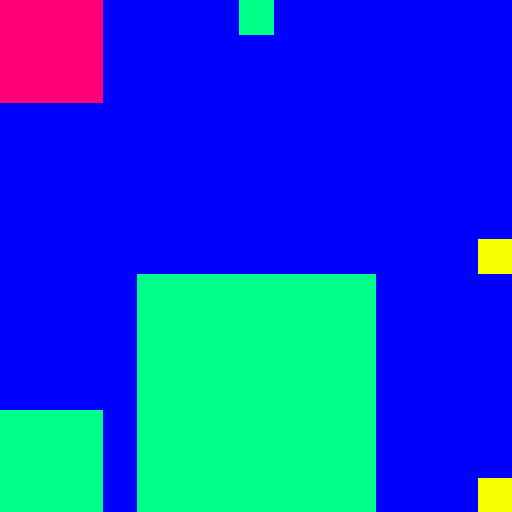

19/301


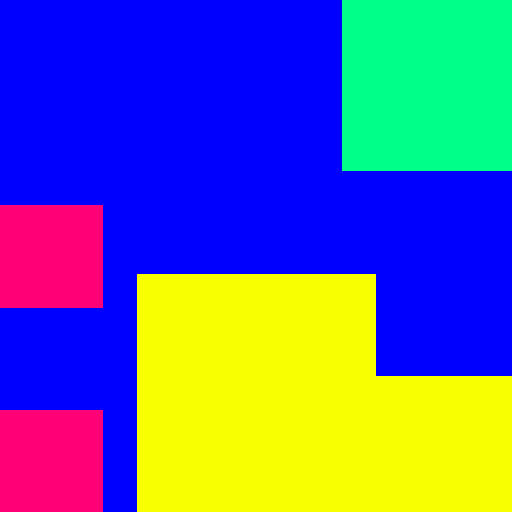

20/301


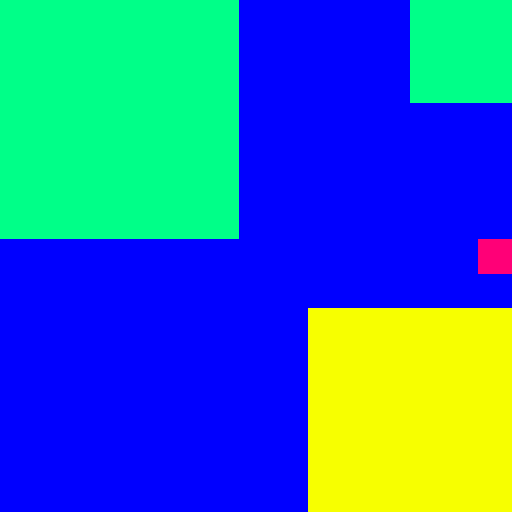

21/301


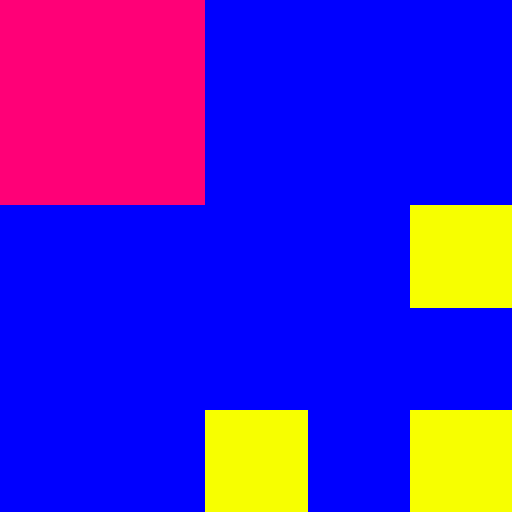

22/301


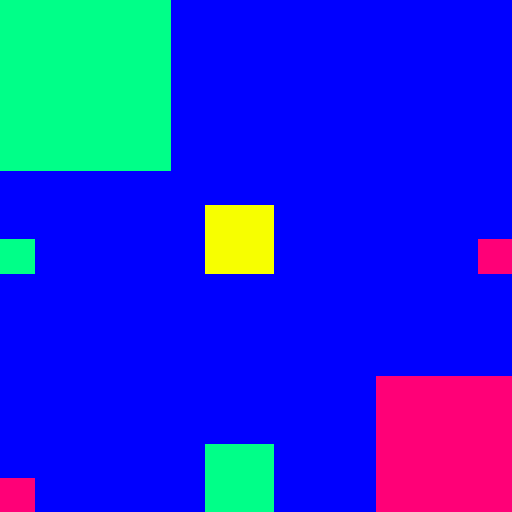

23/301


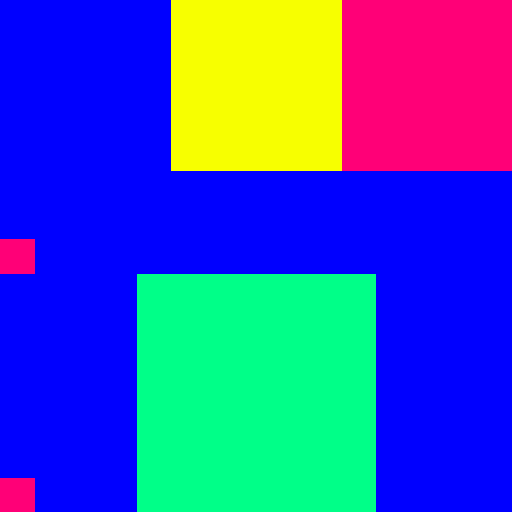

24/301


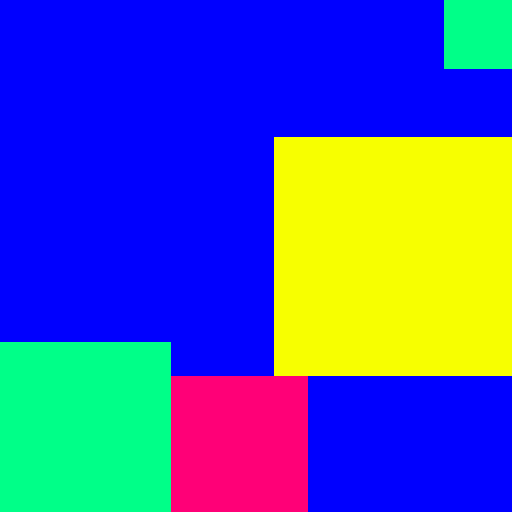

25/301


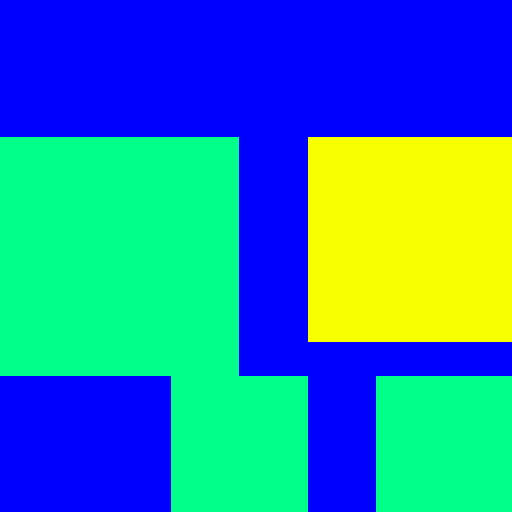

26/301


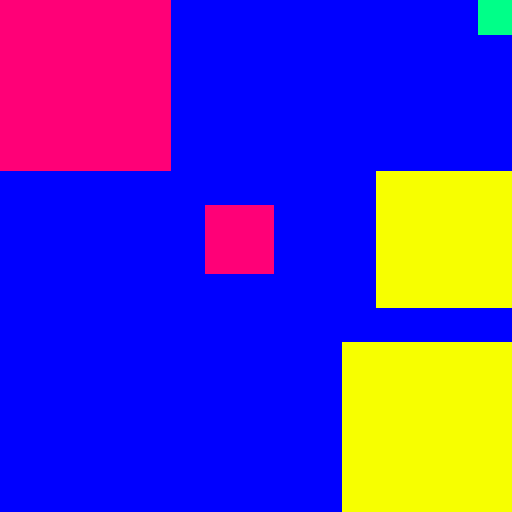

27/301


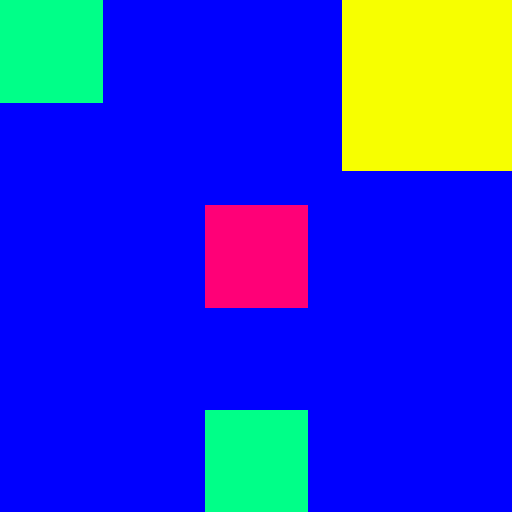

28/301


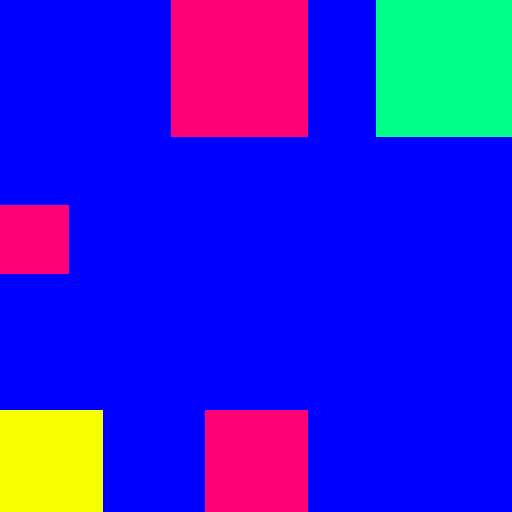

29/301


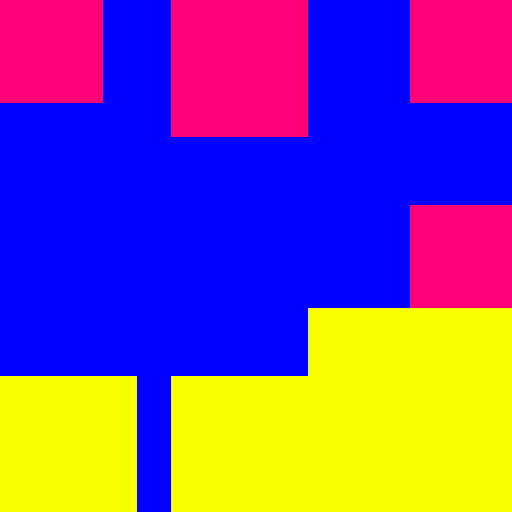

30/301


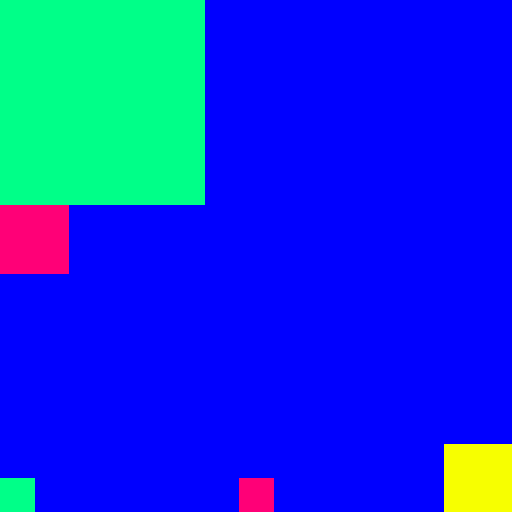

31/301


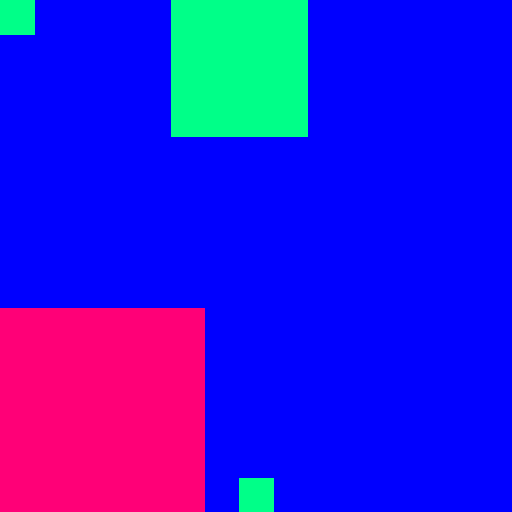

32/301


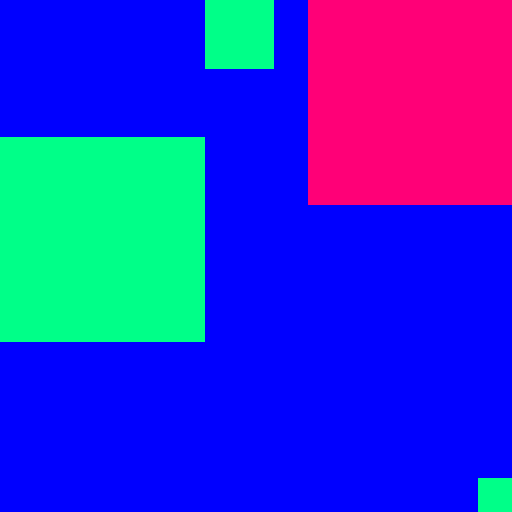

33/301


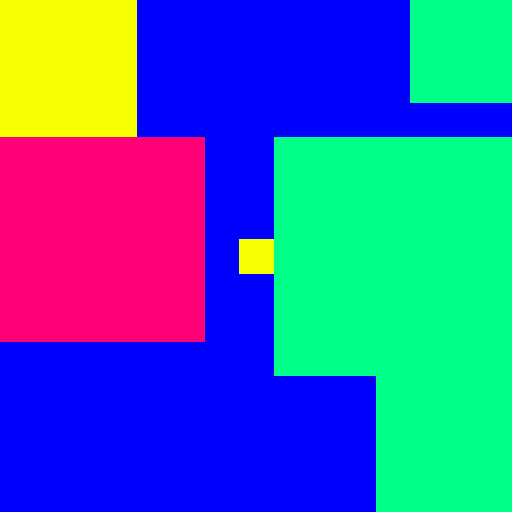

34/301


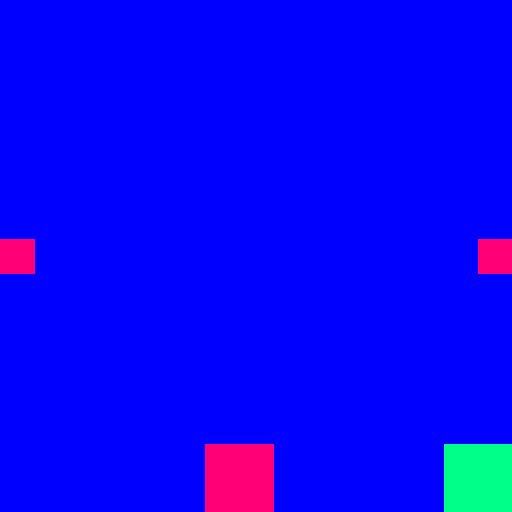

35/301


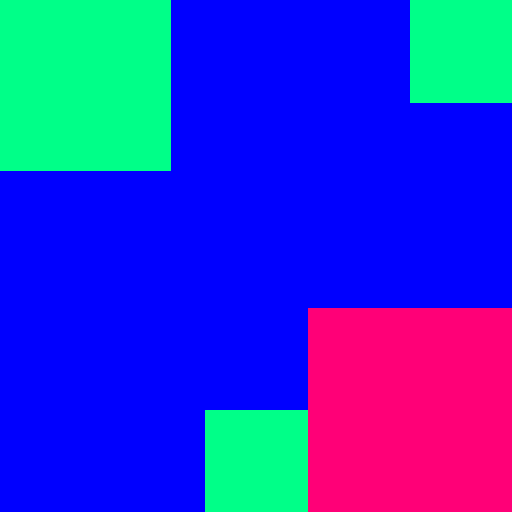

36/301


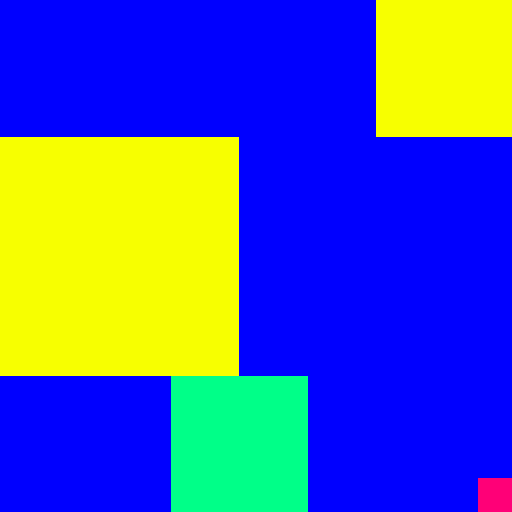

37/301


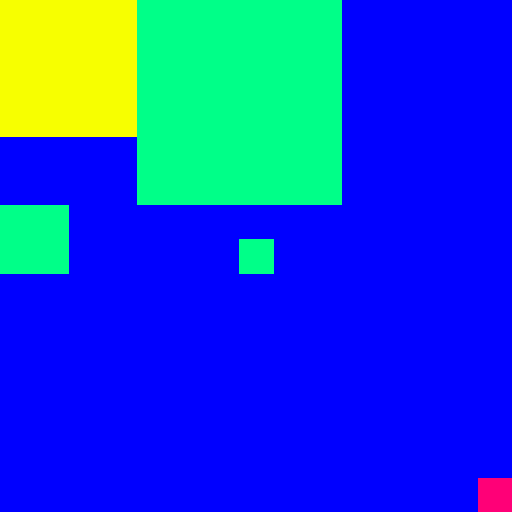

38/301


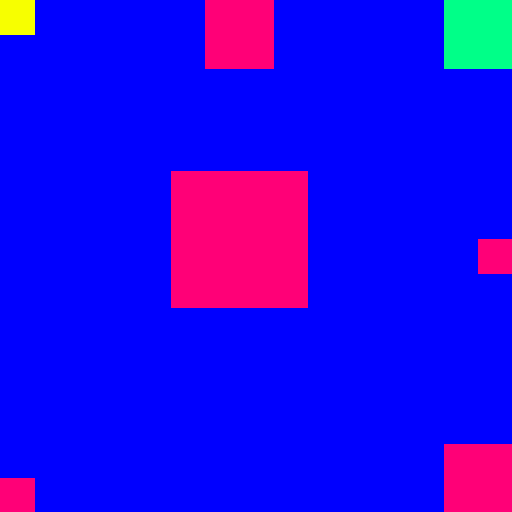

39/301


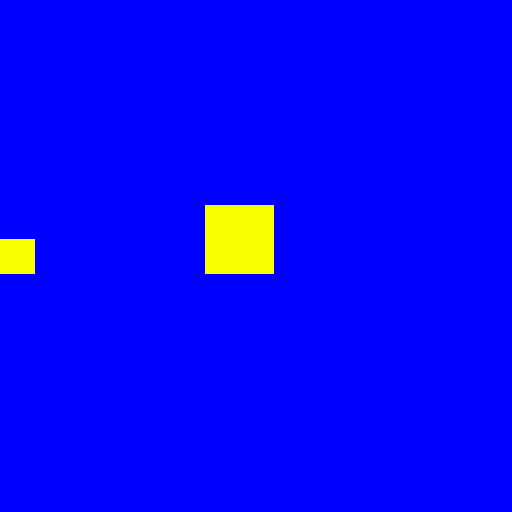

40/301


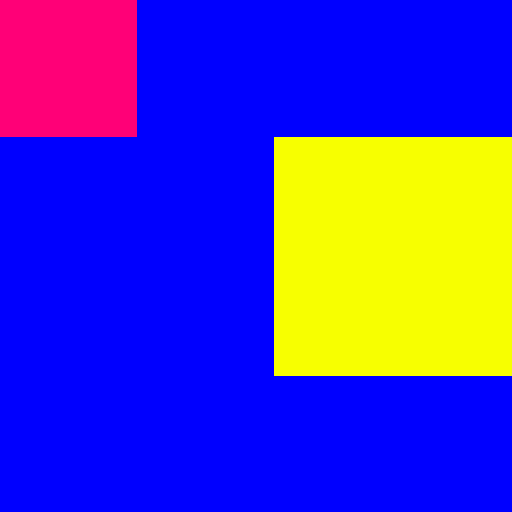

41/301


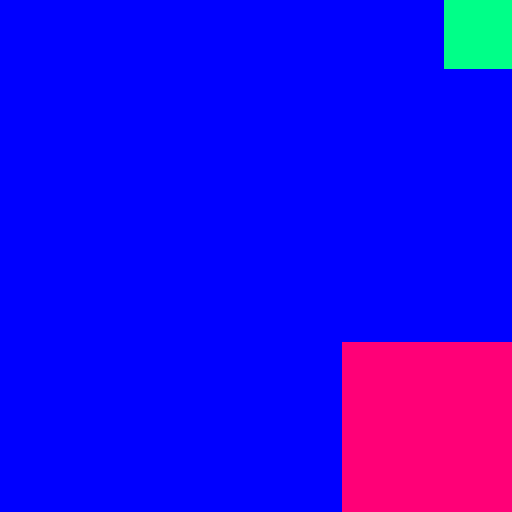

42/301


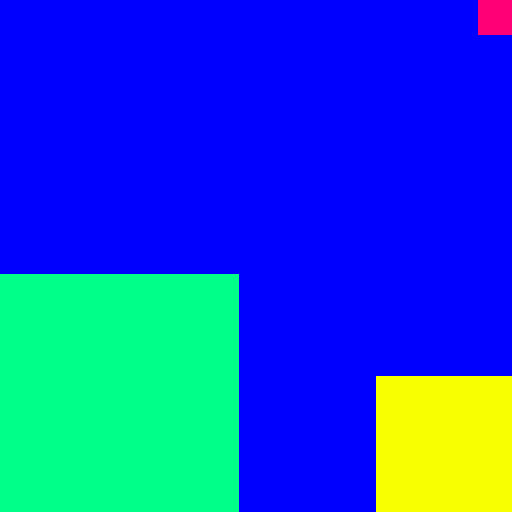

43/301


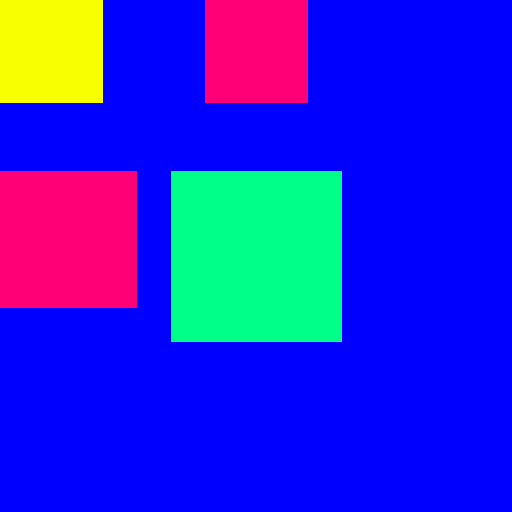

44/301


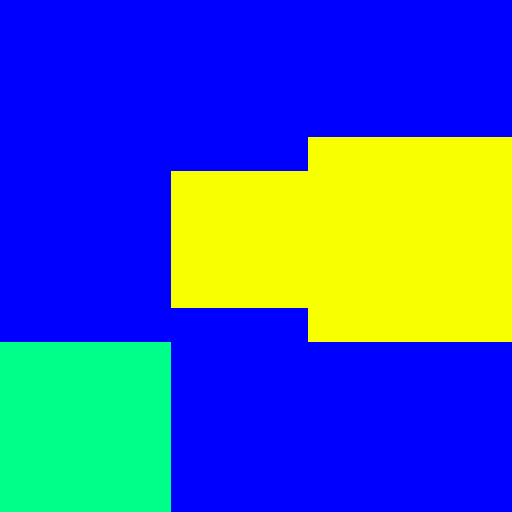

45/301


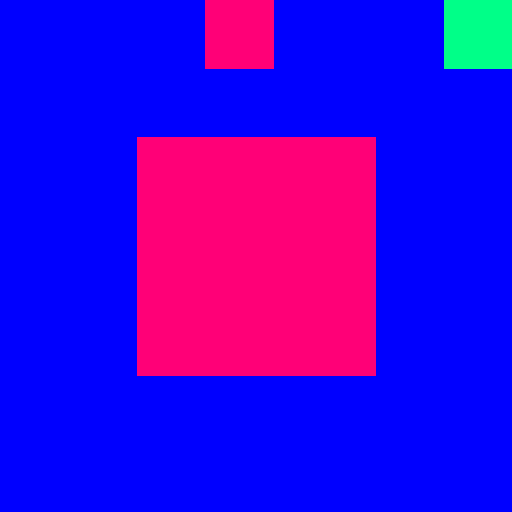

46/301


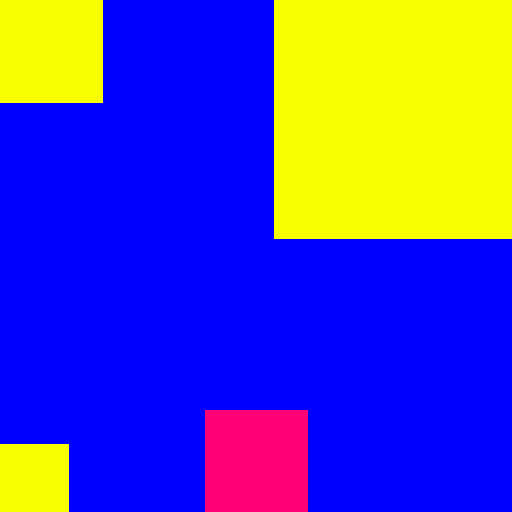

47/301


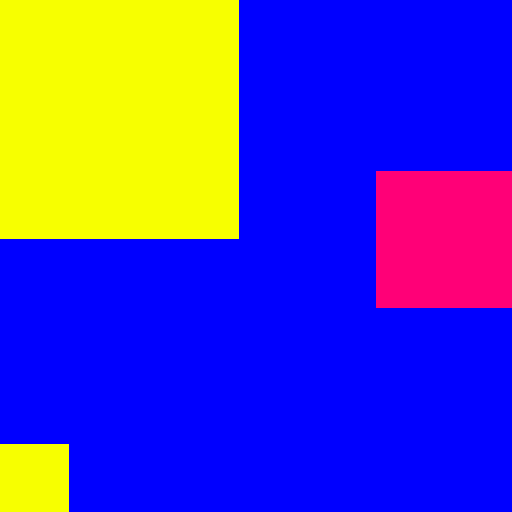

48/301


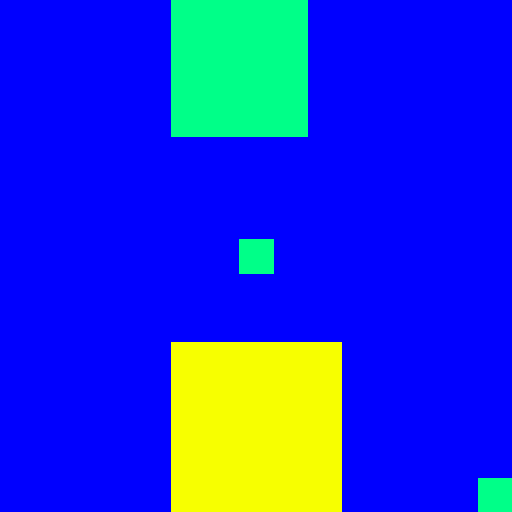

49/301


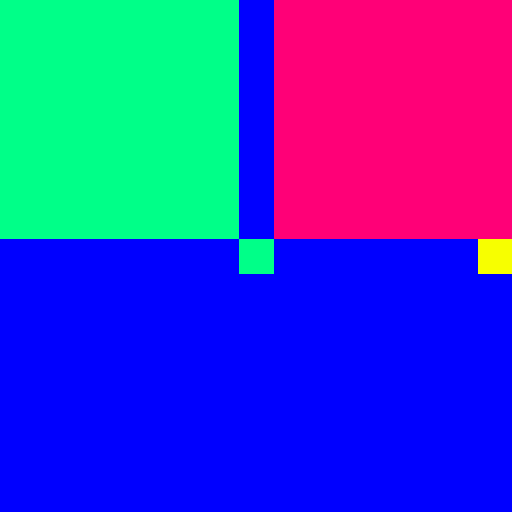

50/301


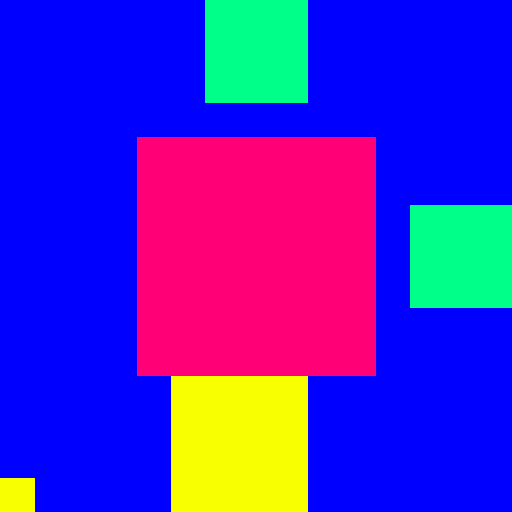

51/301


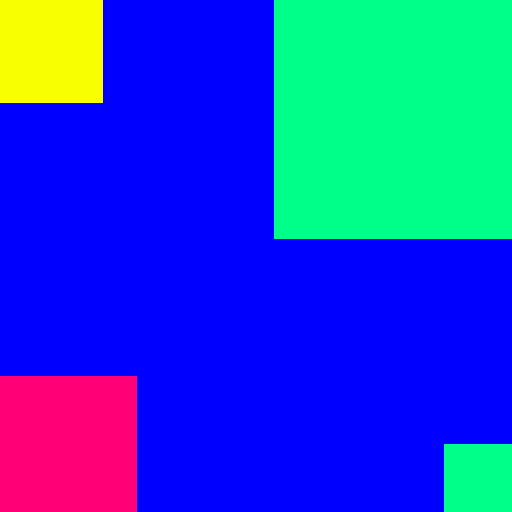

52/301


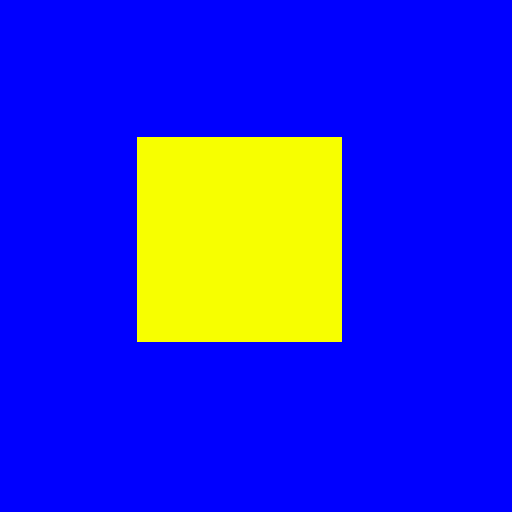

53/301


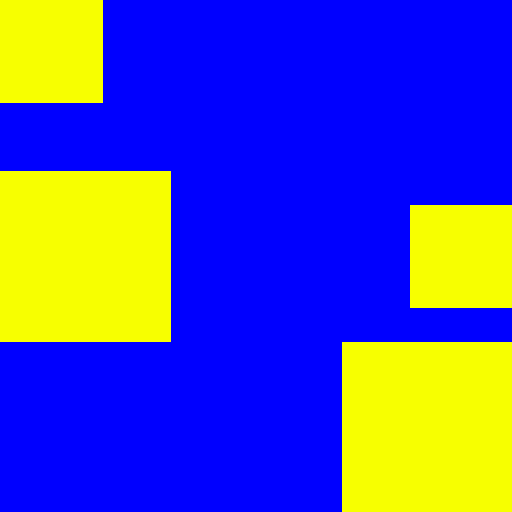

54/301


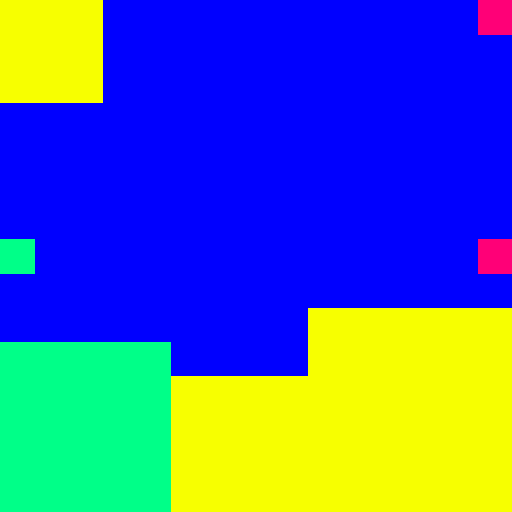

55/301


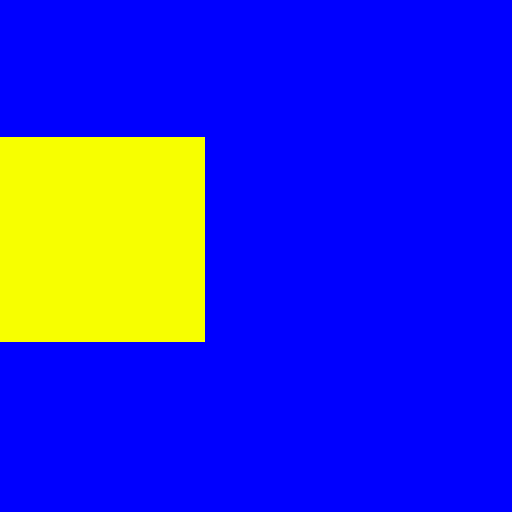

56/301


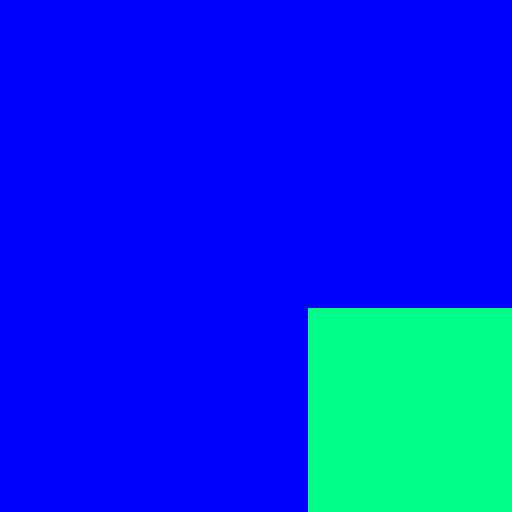

57/301


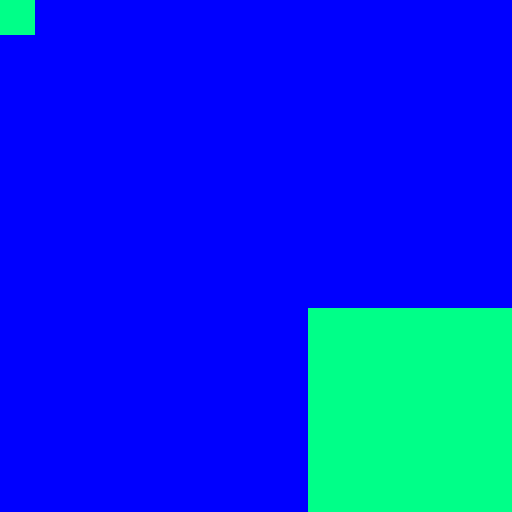

58/301


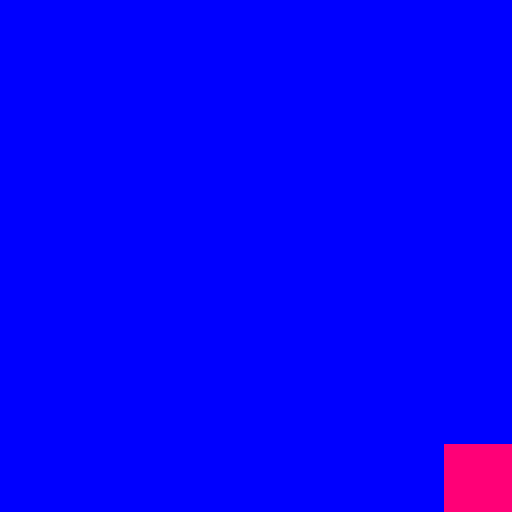

59/301


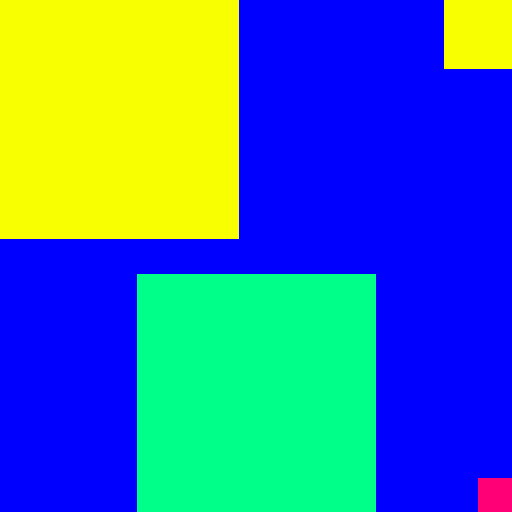

60/301


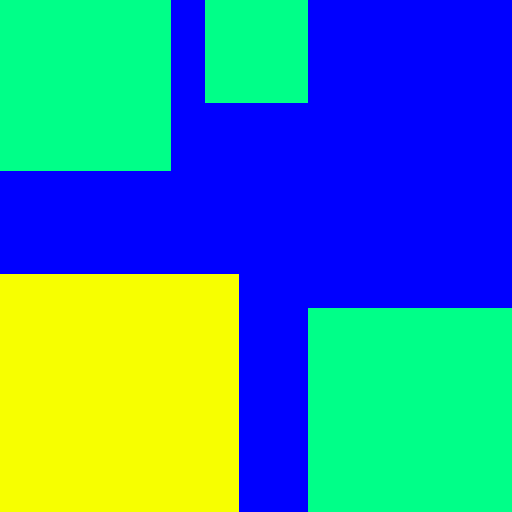

61/301


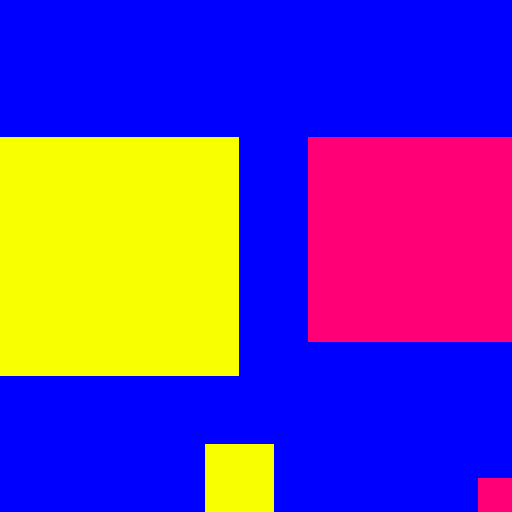

62/301


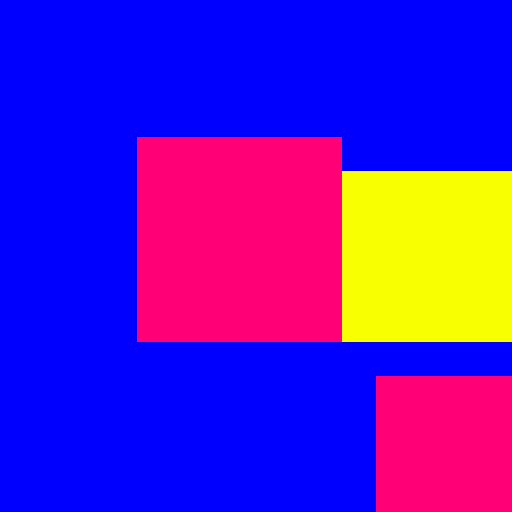

63/301


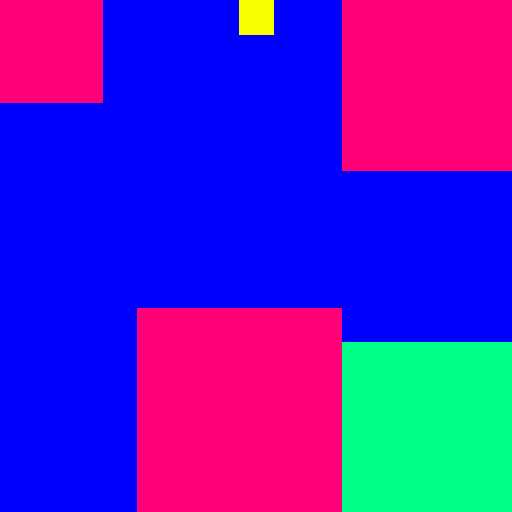

64/301


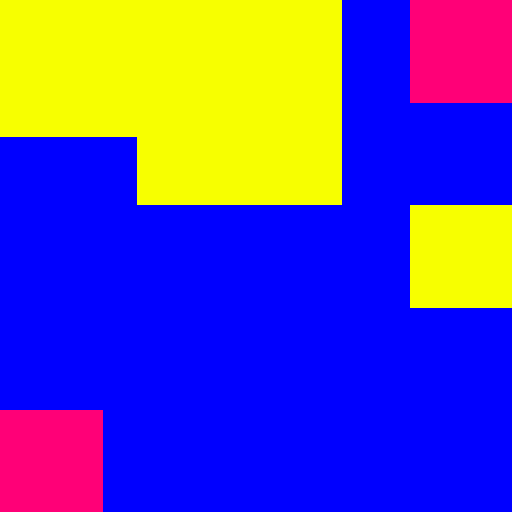

65/301


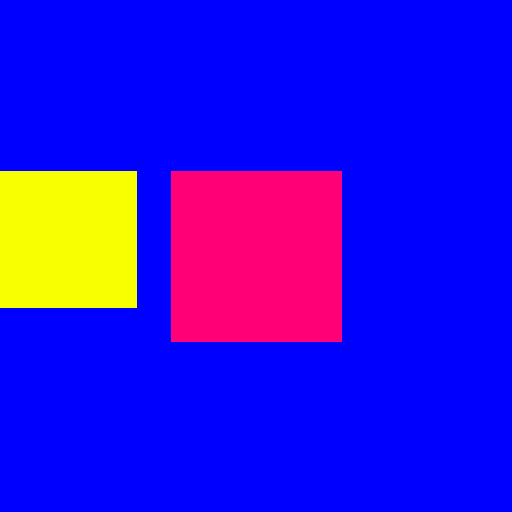

66/301


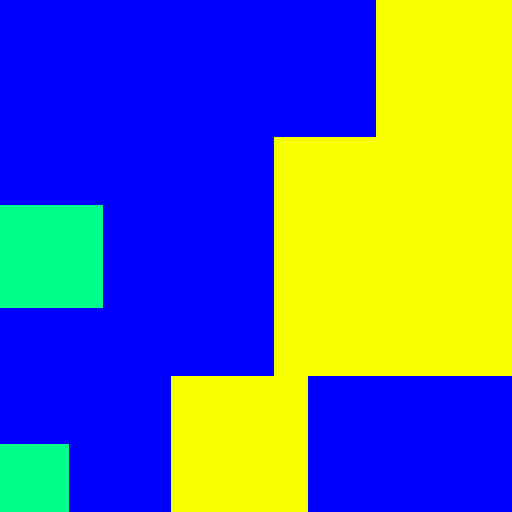

67/301


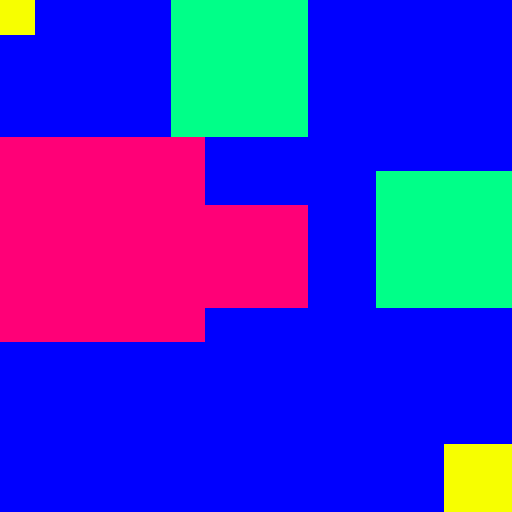

68/301


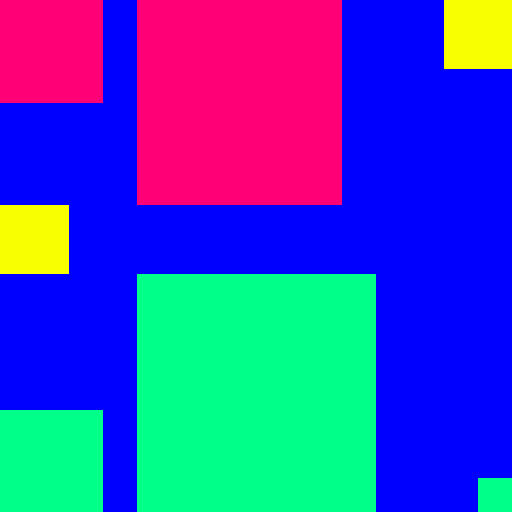

69/301


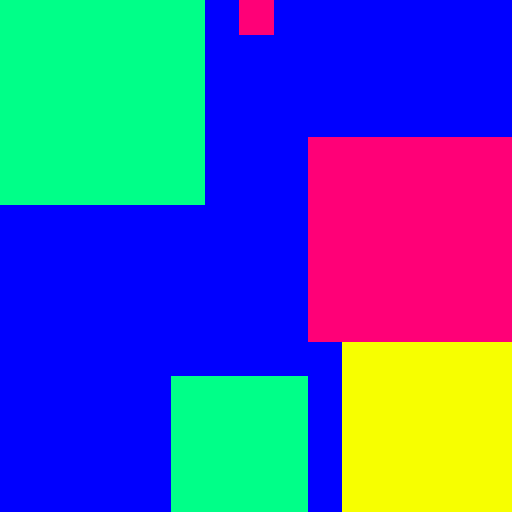

70/301


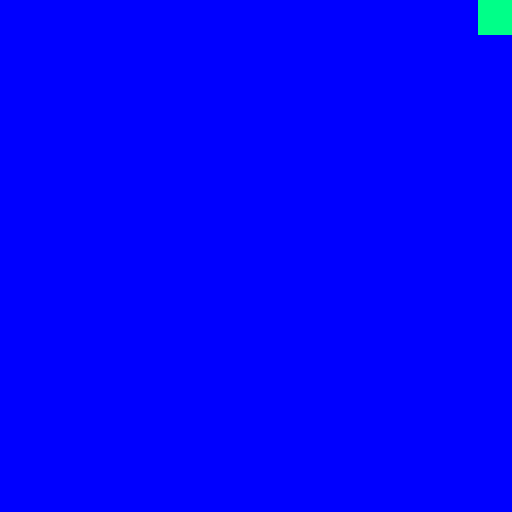

71/301


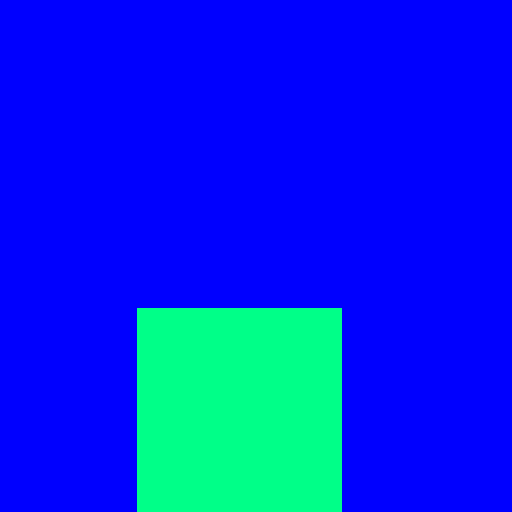

72/301


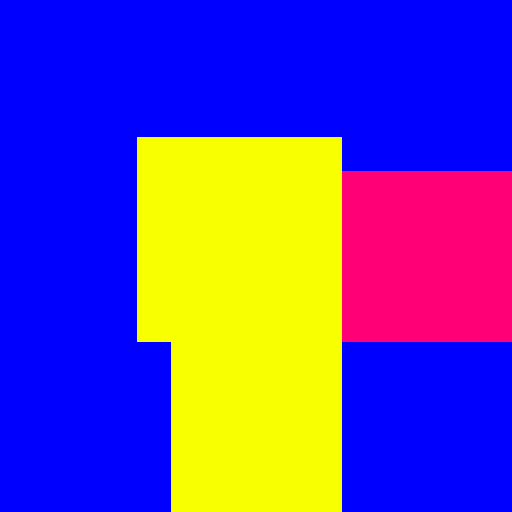

73/301


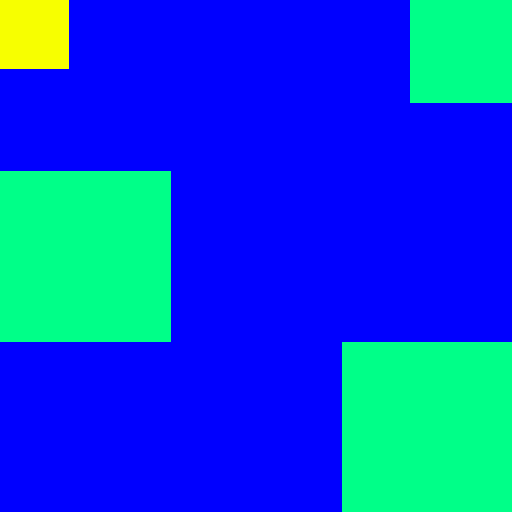

74/301


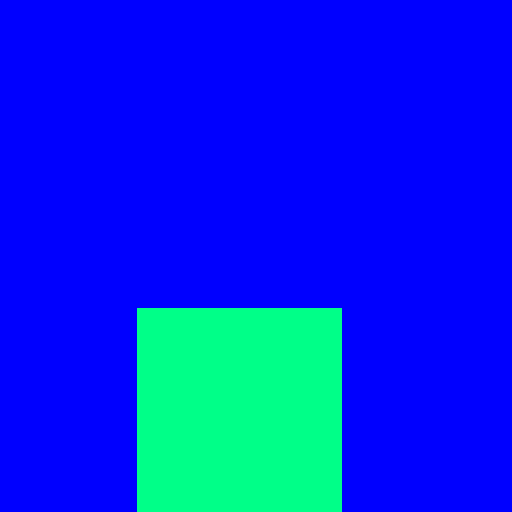

75/301


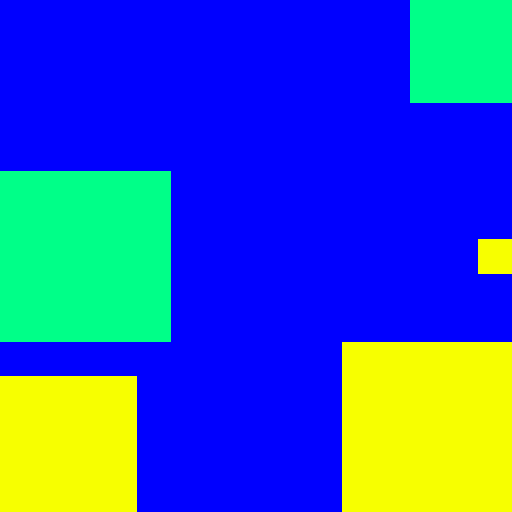

76/301


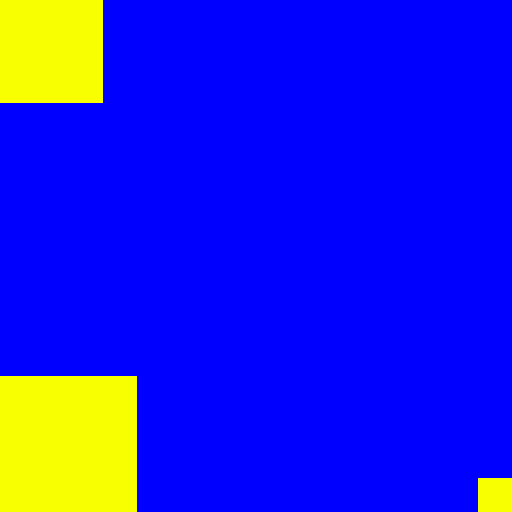

77/301


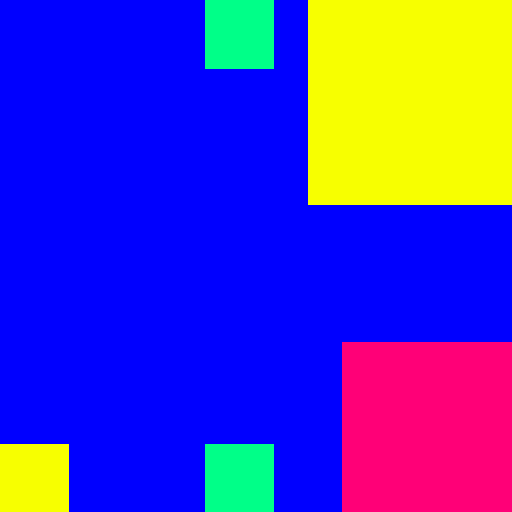

78/301


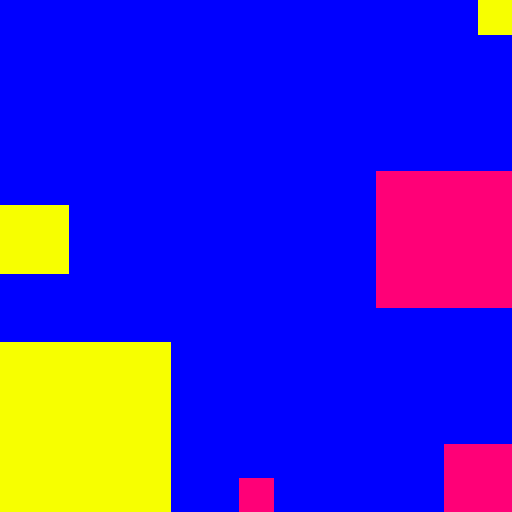

79/301


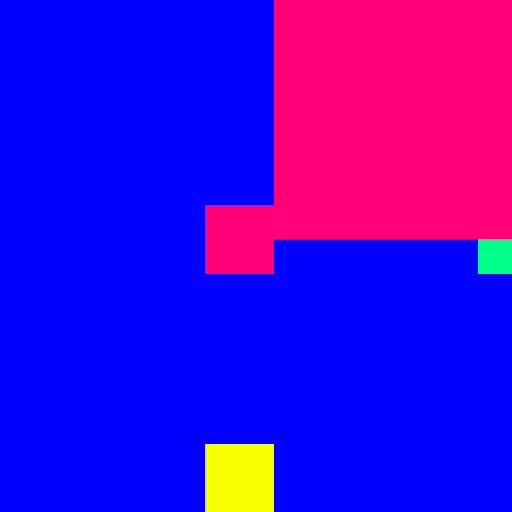

80/301


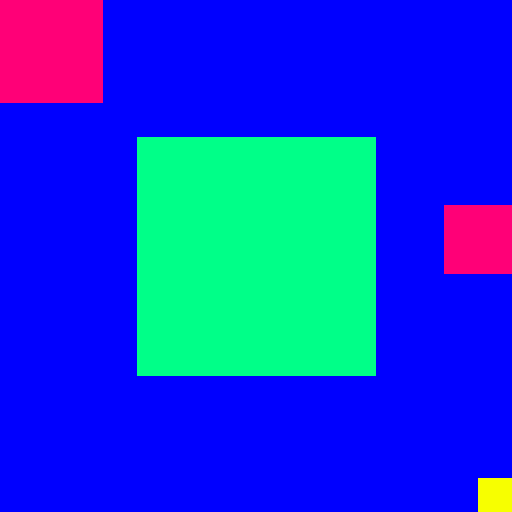

81/301


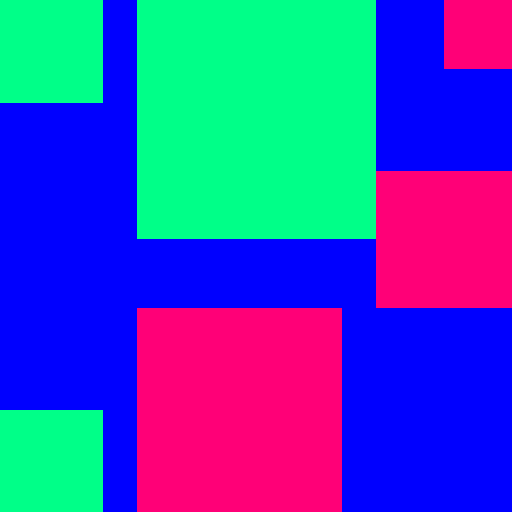

82/301


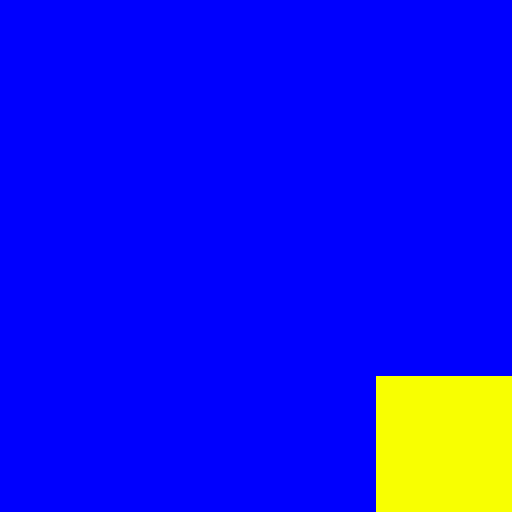

83/301


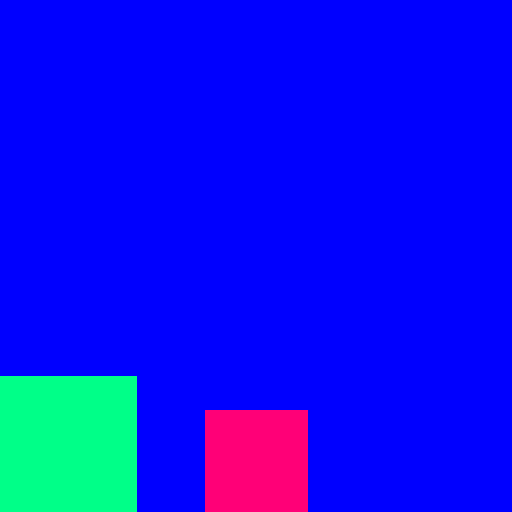

84/301


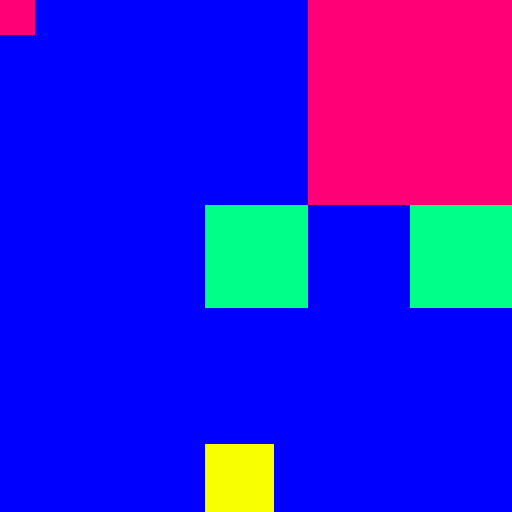

85/301


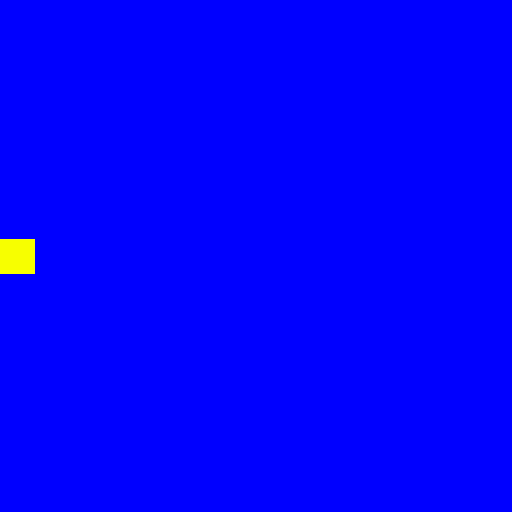

86/301


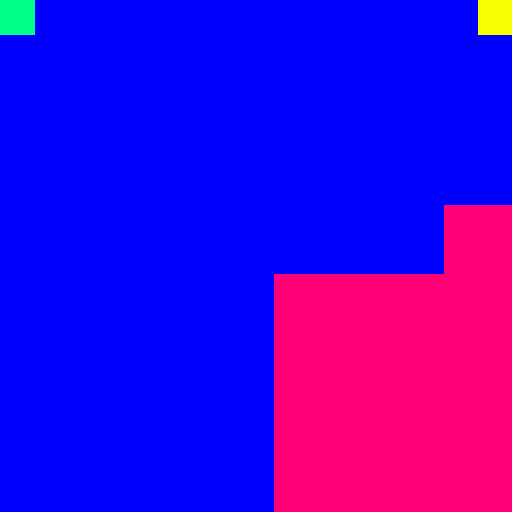

87/301


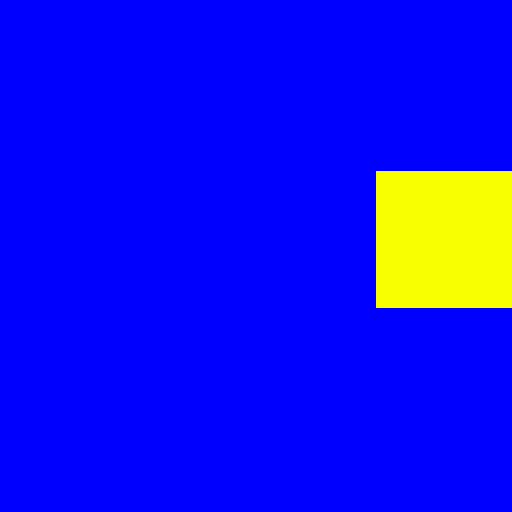

88/301


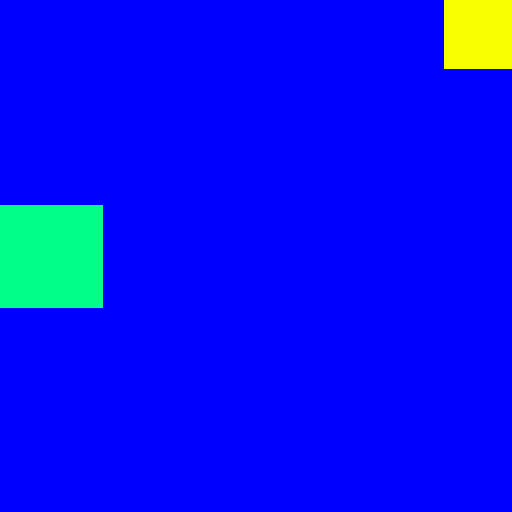

89/301


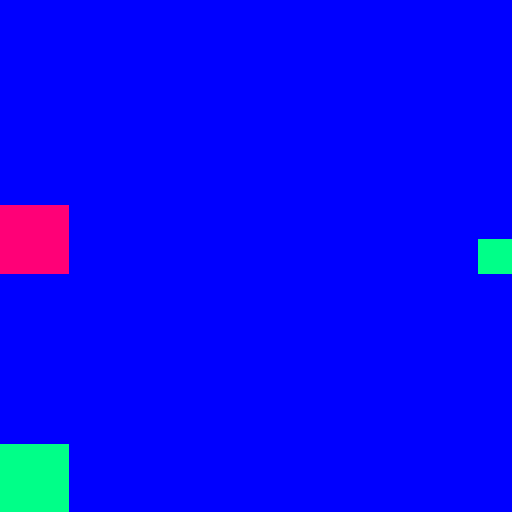

90/301


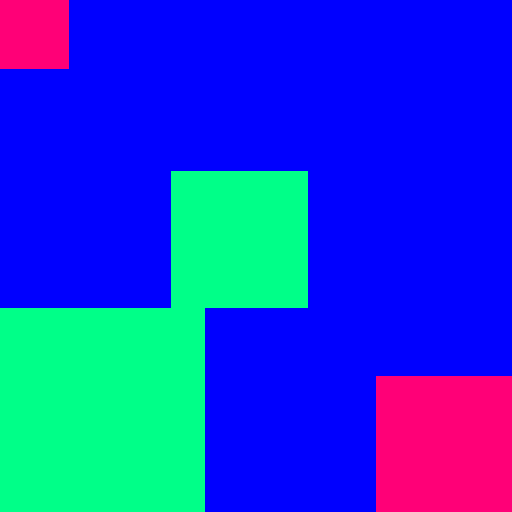

91/301


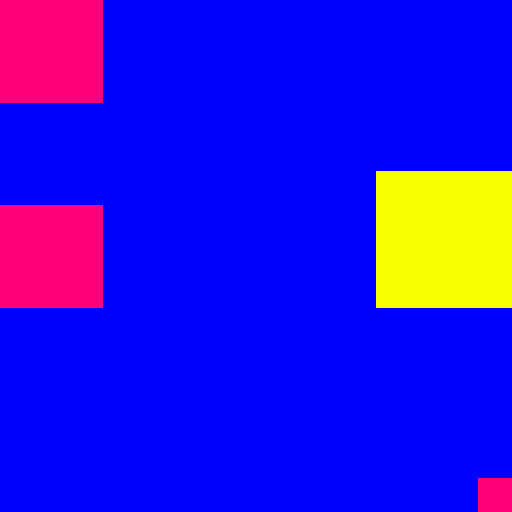

92/301


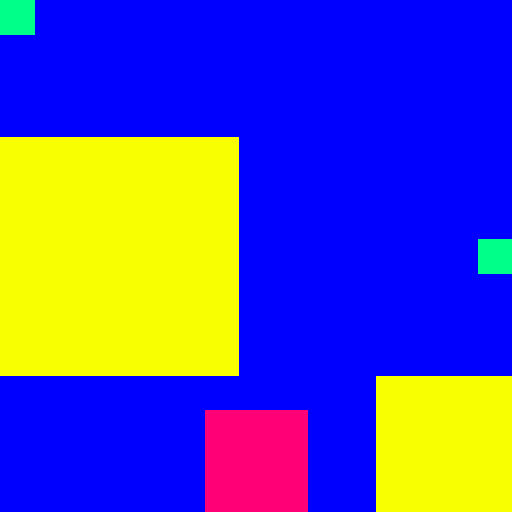

93/301


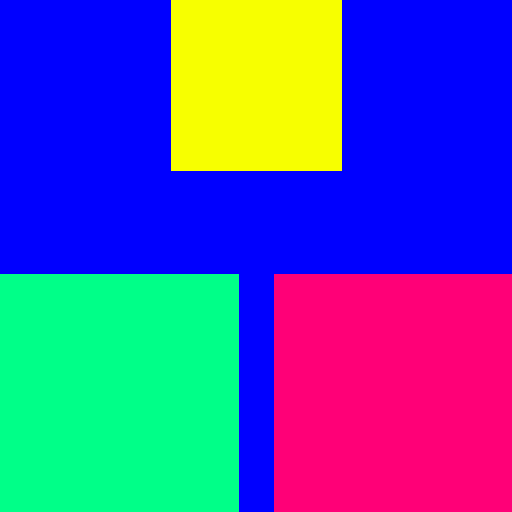

94/301


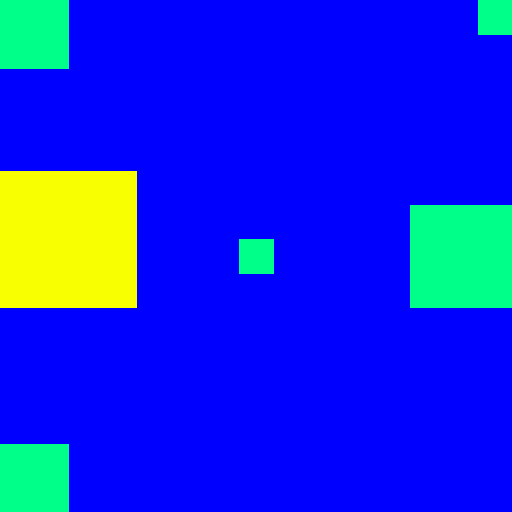

95/301


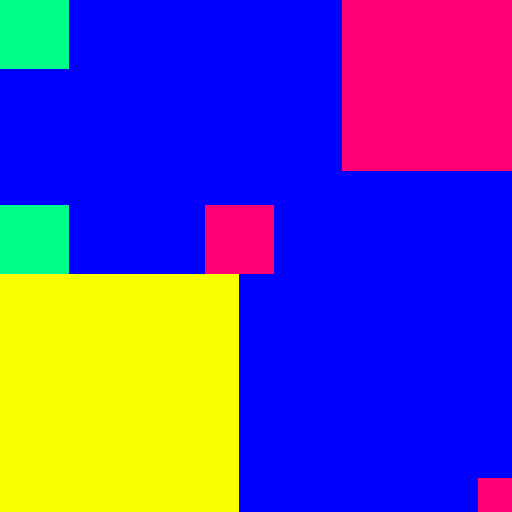

96/301


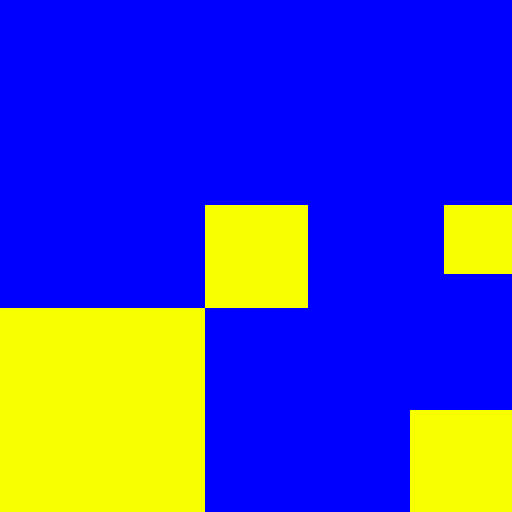

97/301


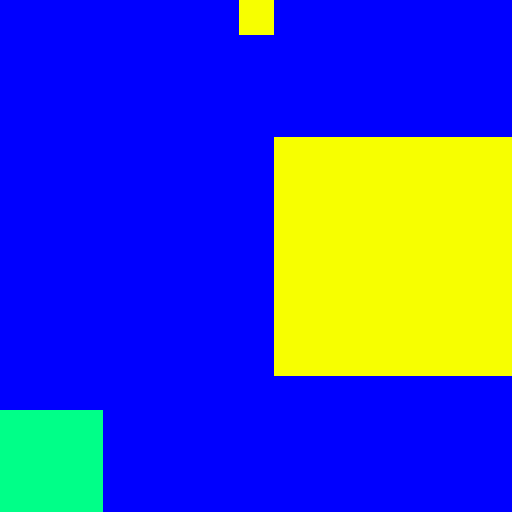

98/301


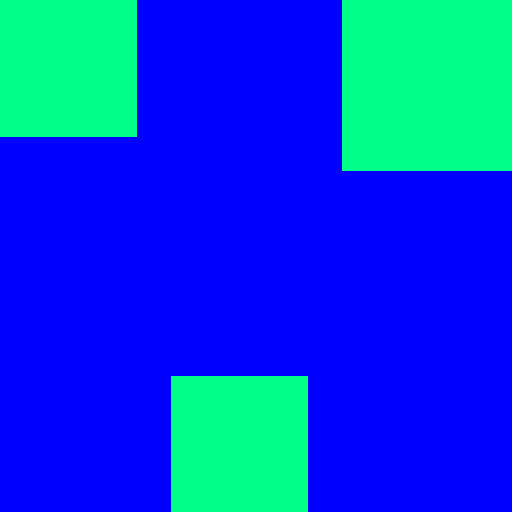

99/301


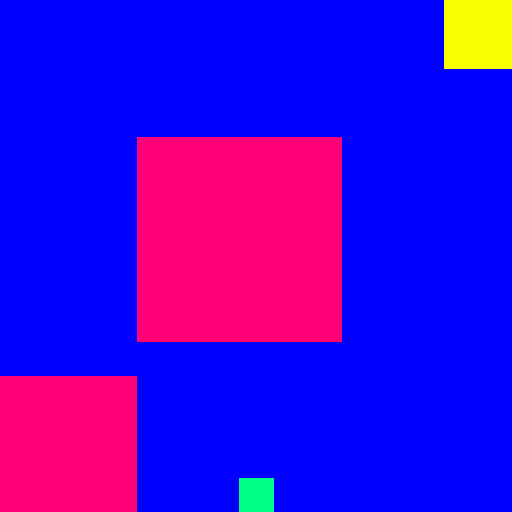

100/301


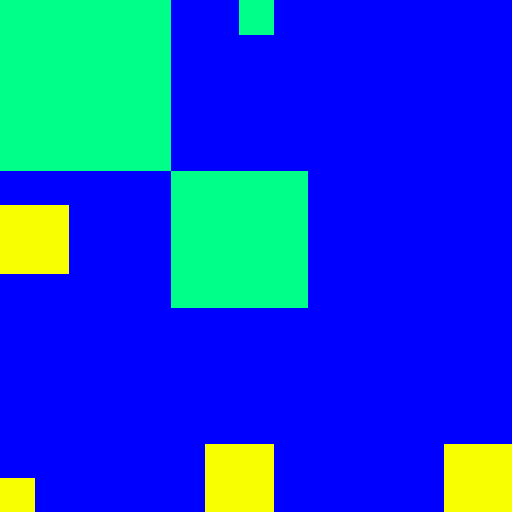

101/301


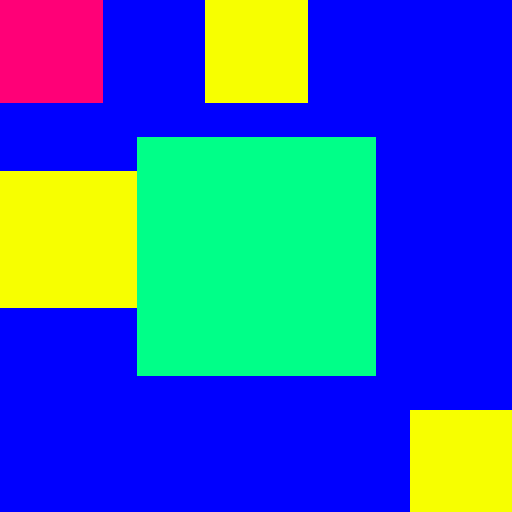

102/301


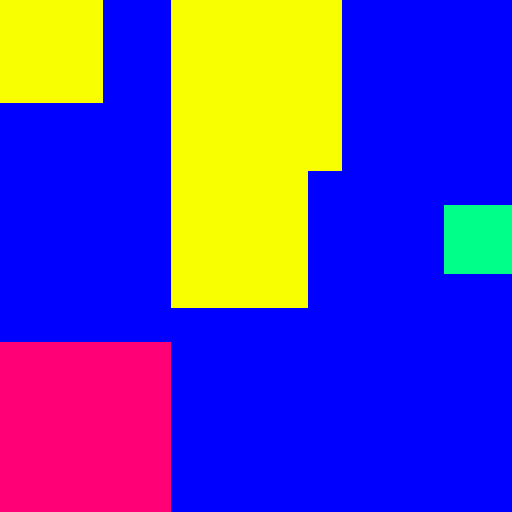

103/301


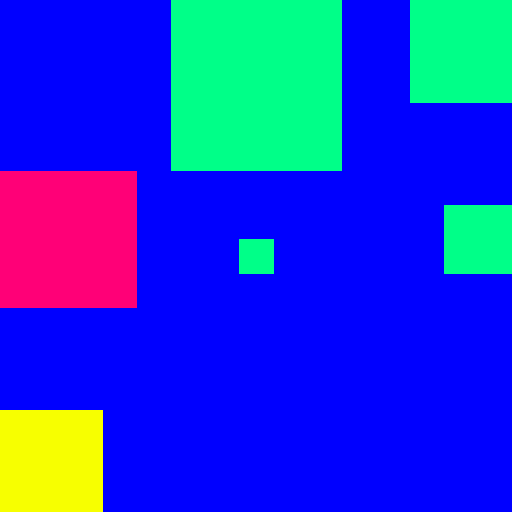

104/301


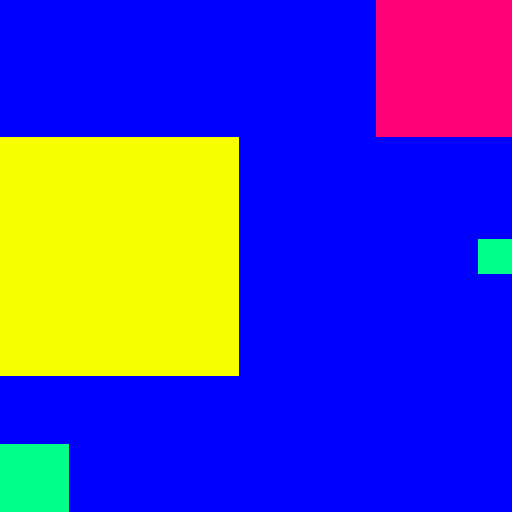

105/301


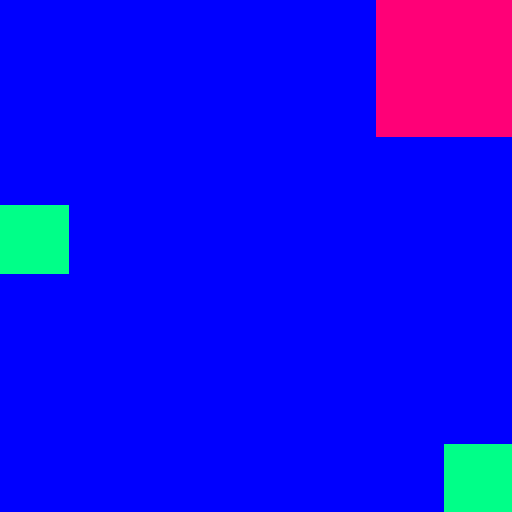

106/301


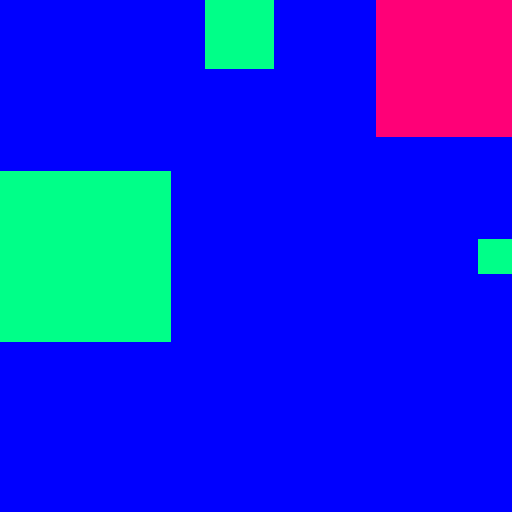

107/301


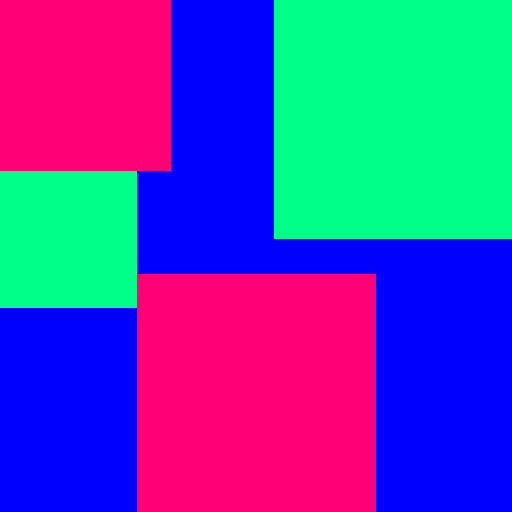

108/301


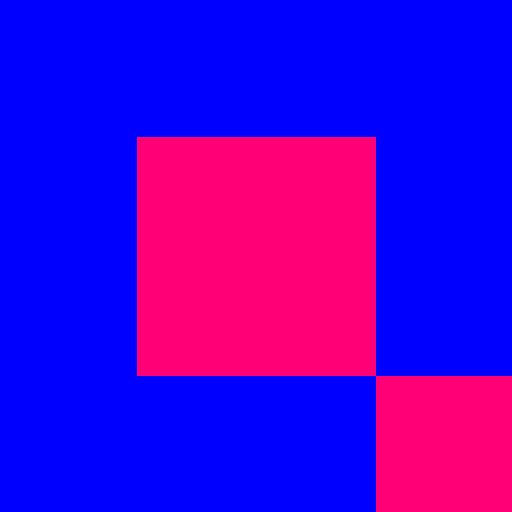

109/301


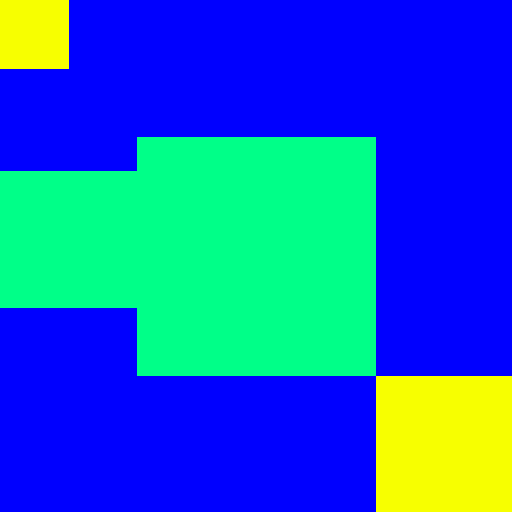

110/301


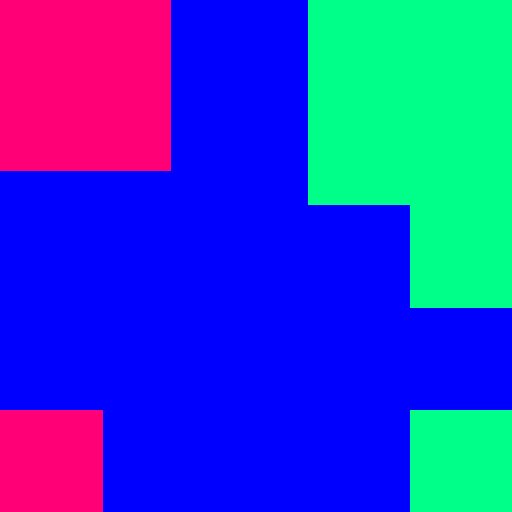

111/301


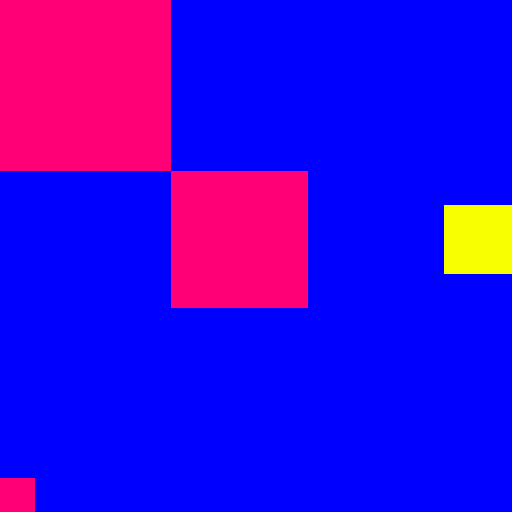

112/301


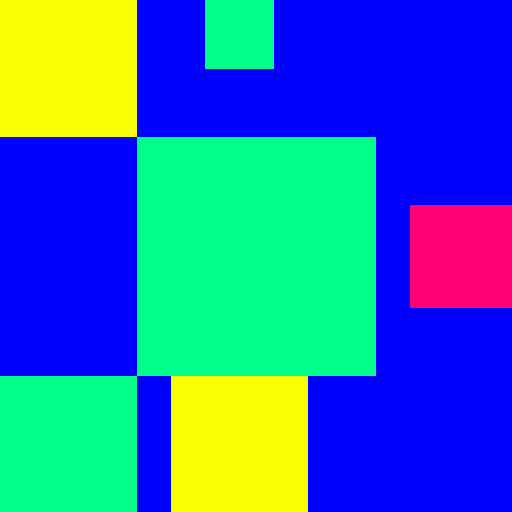

113/301


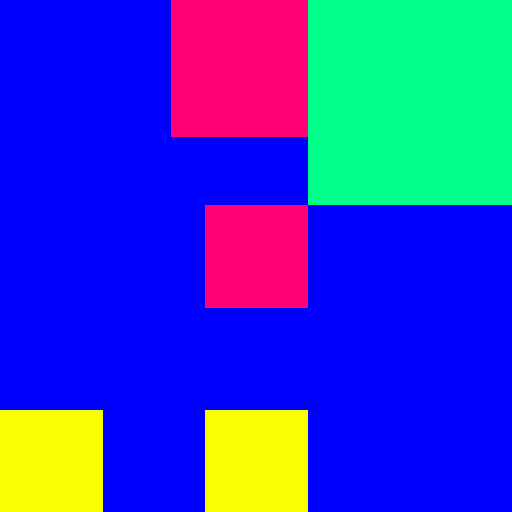

114/301


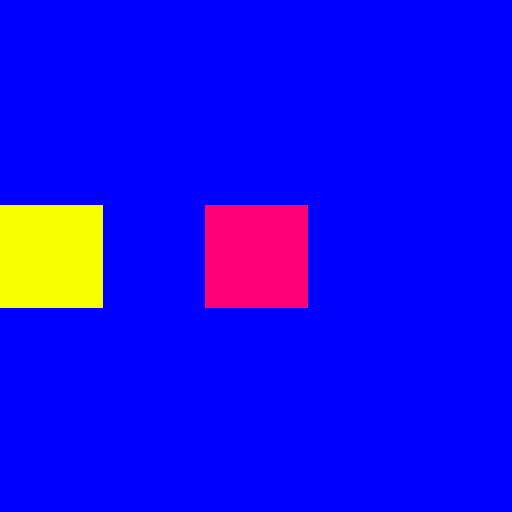

115/301


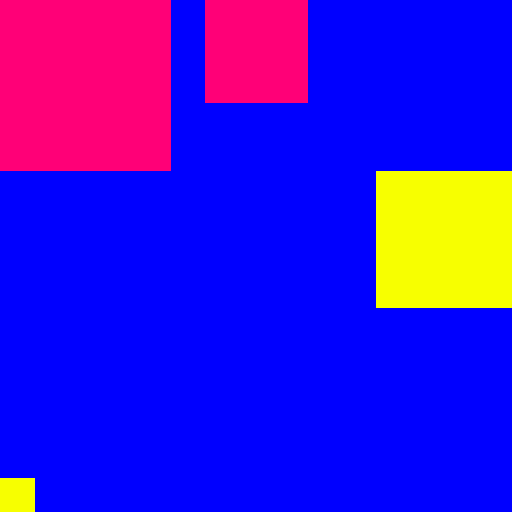

116/301


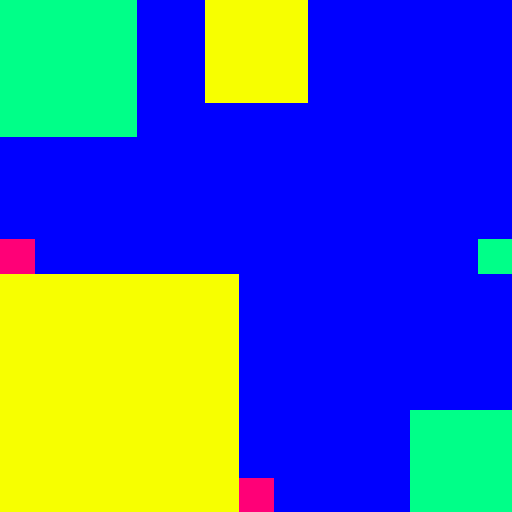

117/301


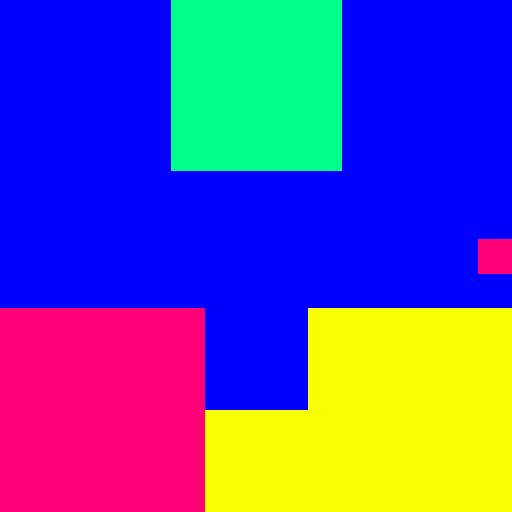

118/301


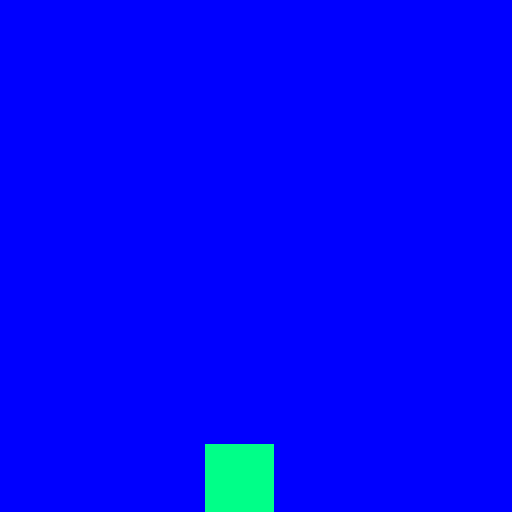

119/301


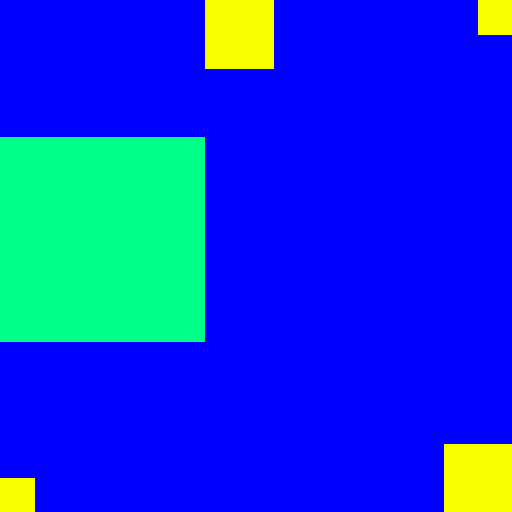

120/301


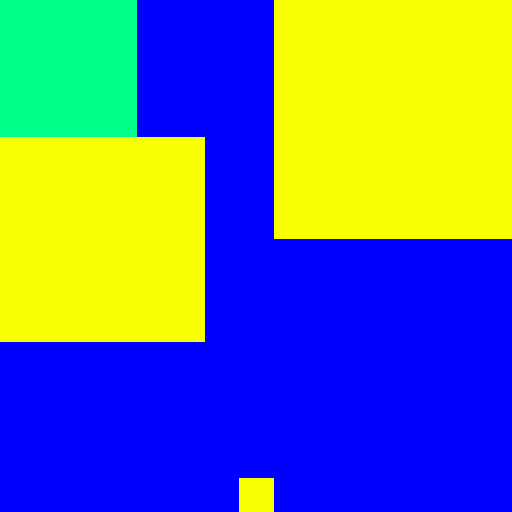

121/301


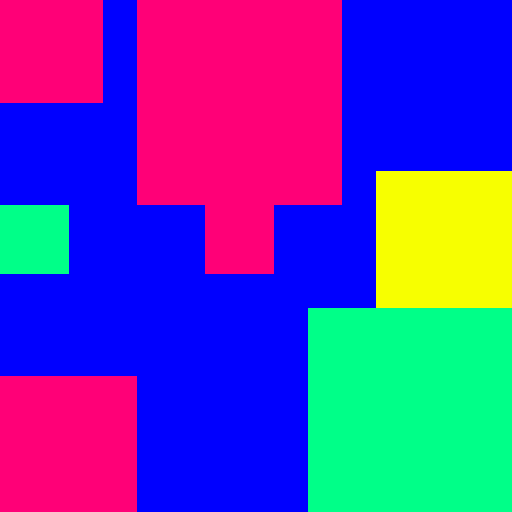

122/301


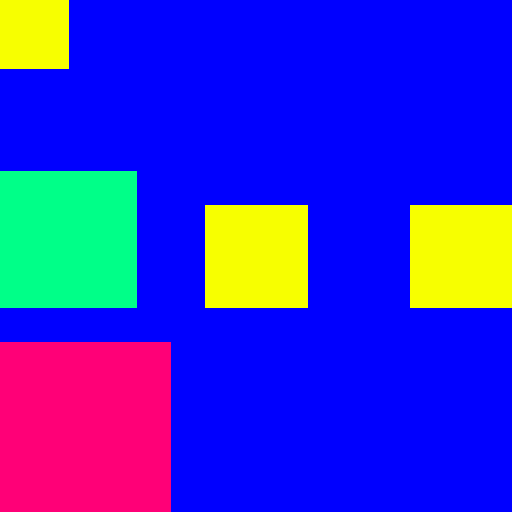

123/301


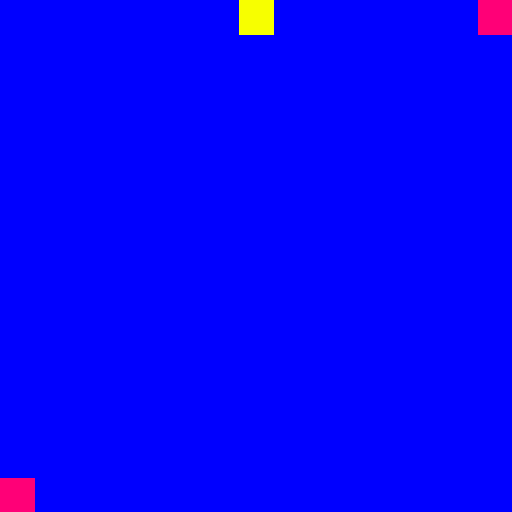

124/301


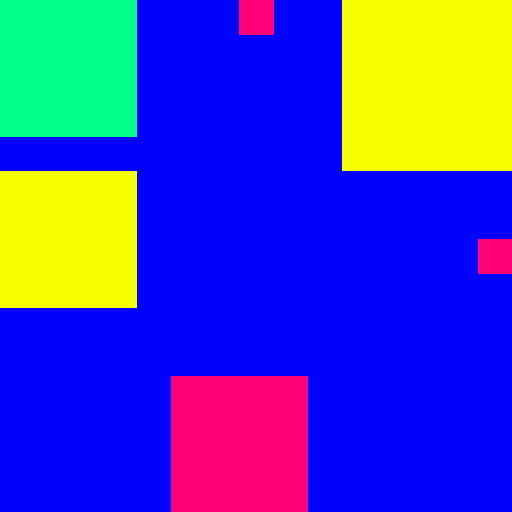

125/301


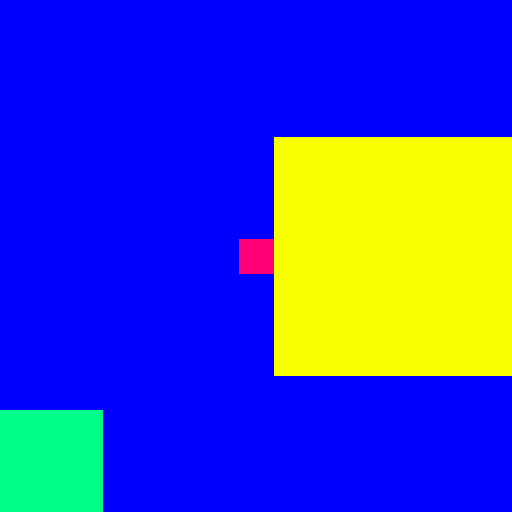

126/301


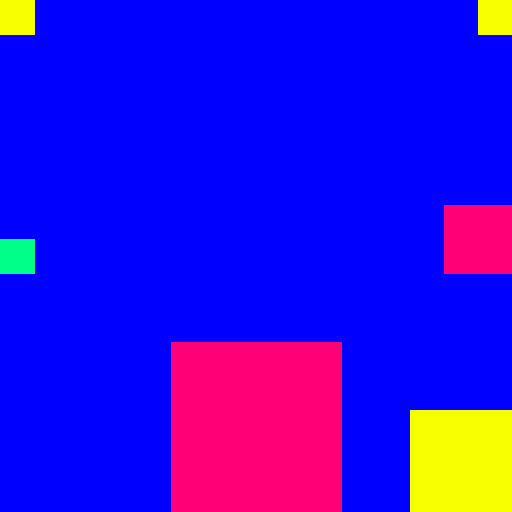

127/301


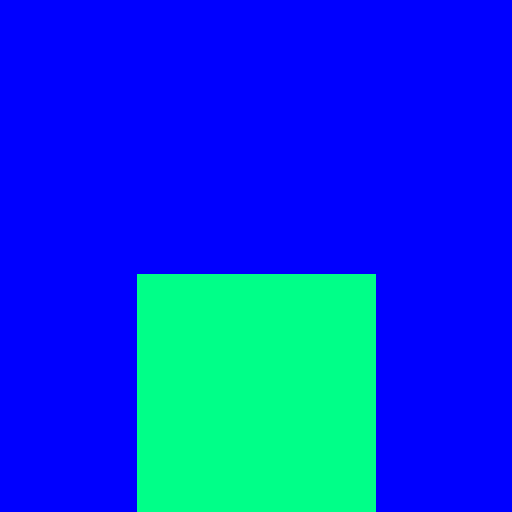

128/301


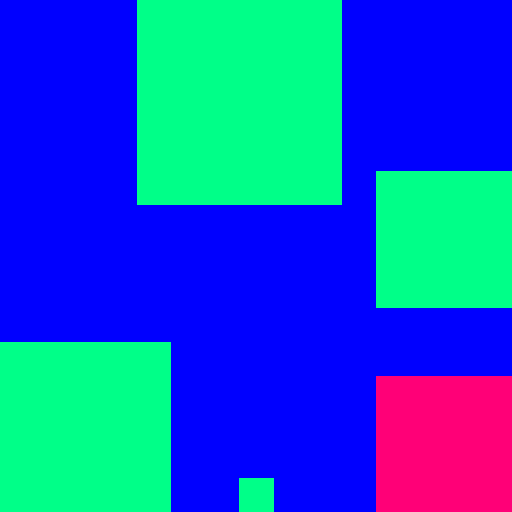

129/301


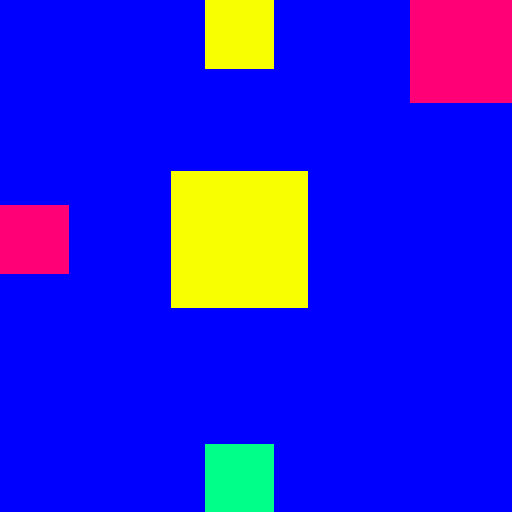

130/301


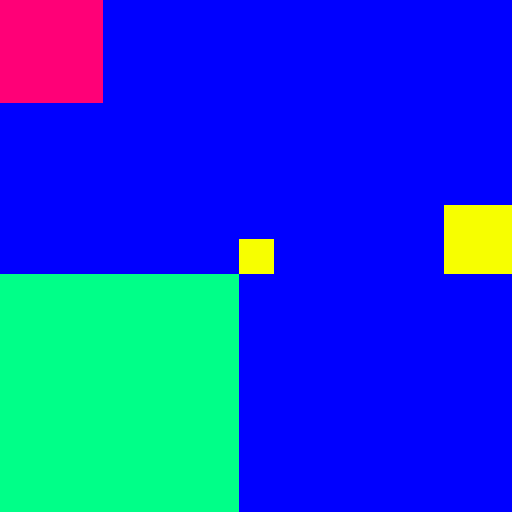

131/301


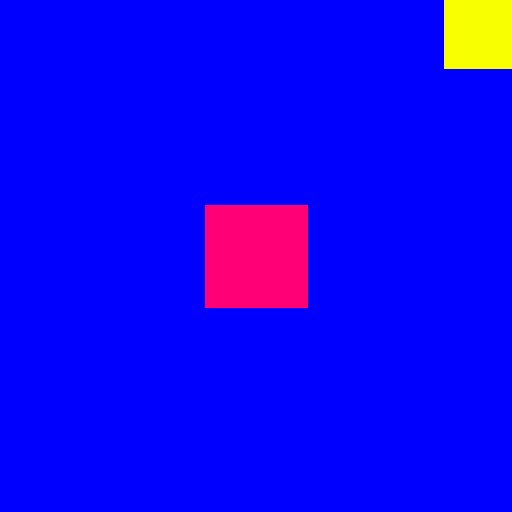

132/301


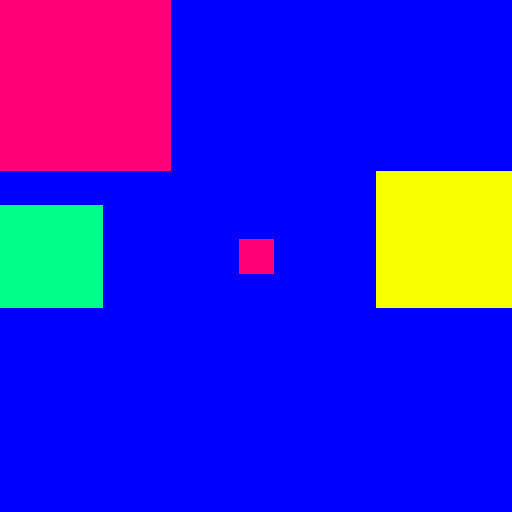

133/301


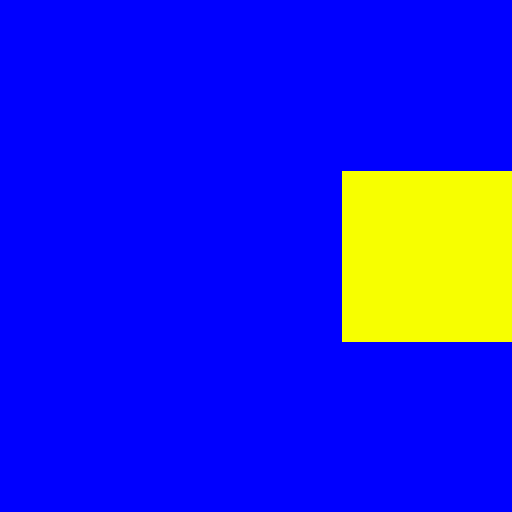

134/301


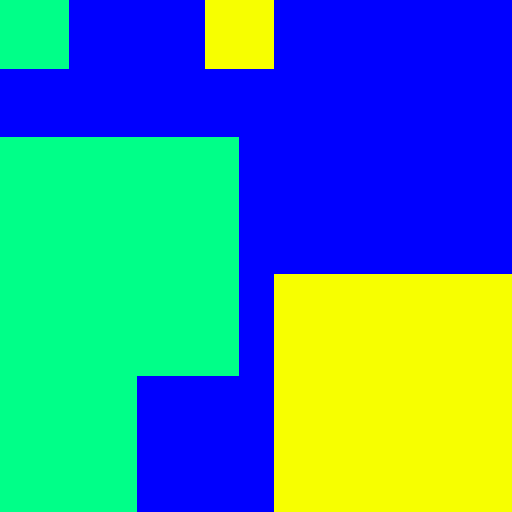

135/301


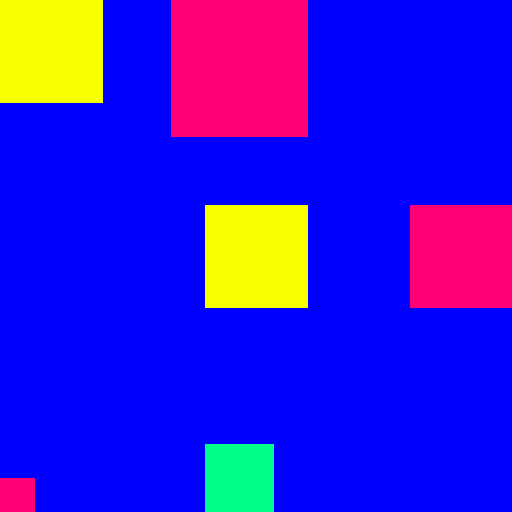

136/301


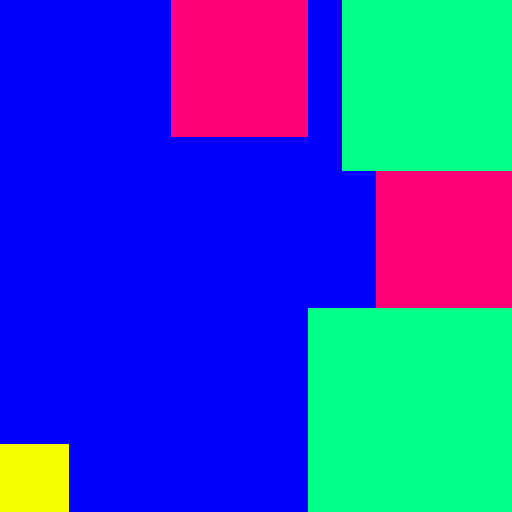

137/301


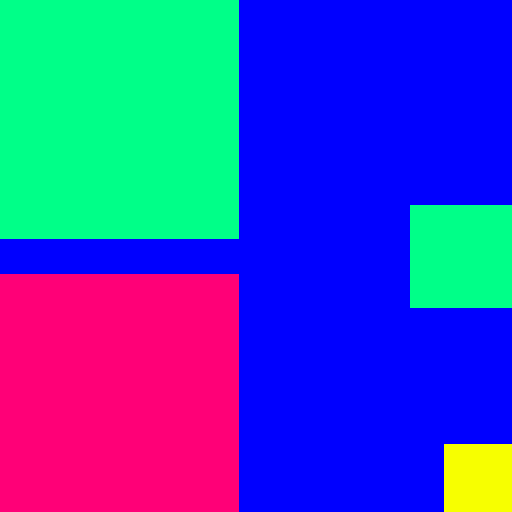

138/301


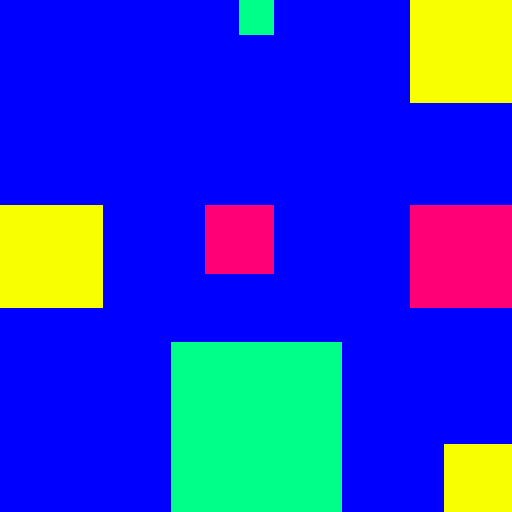

139/301


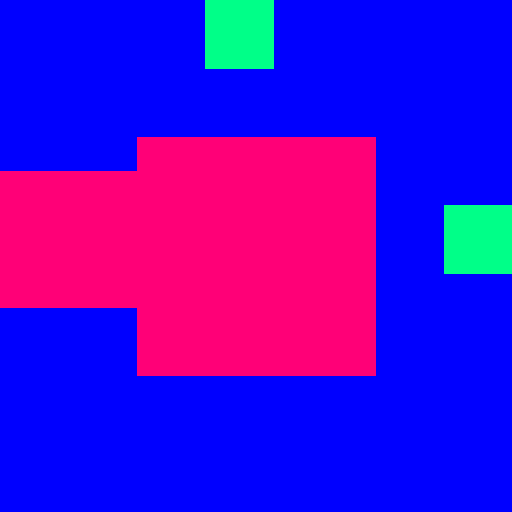

140/301


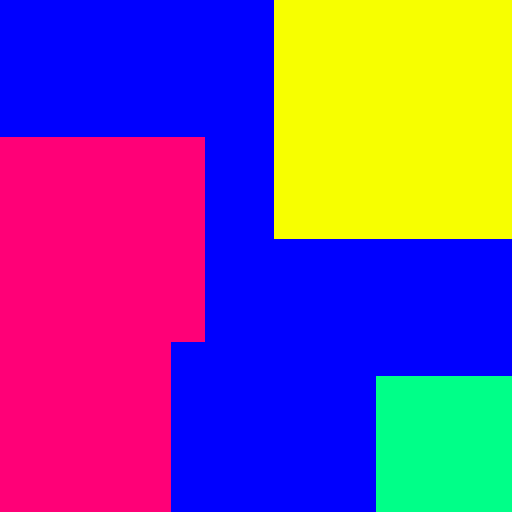

141/301


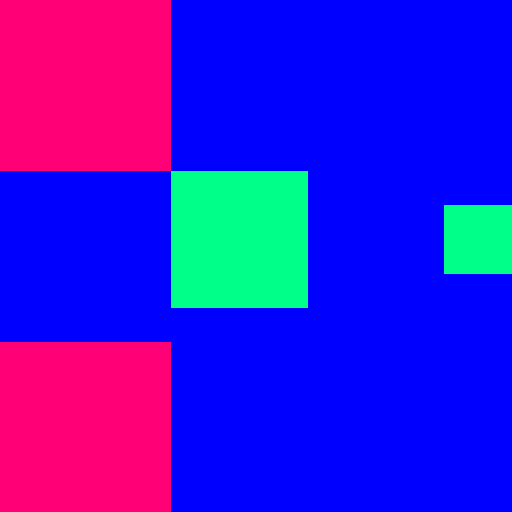

142/301


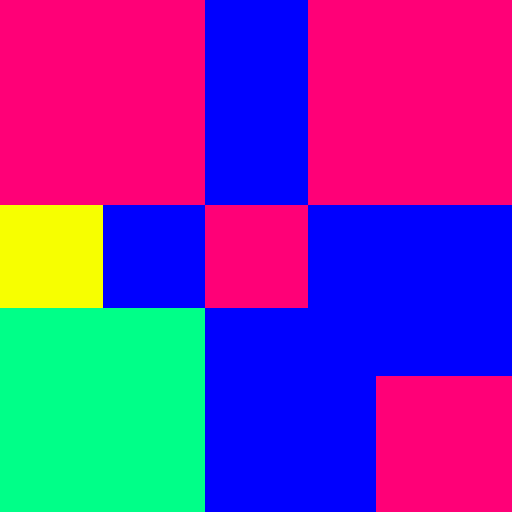

143/301


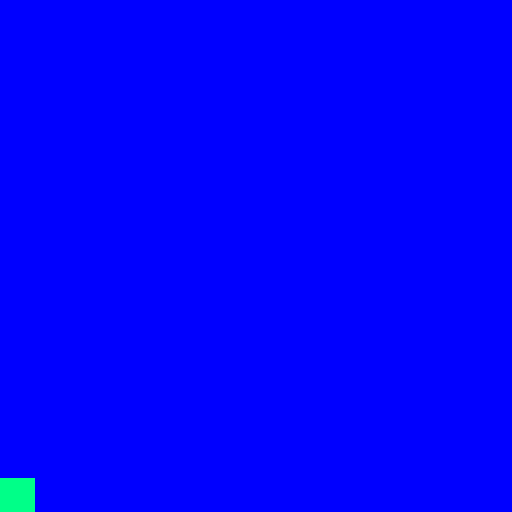

144/301


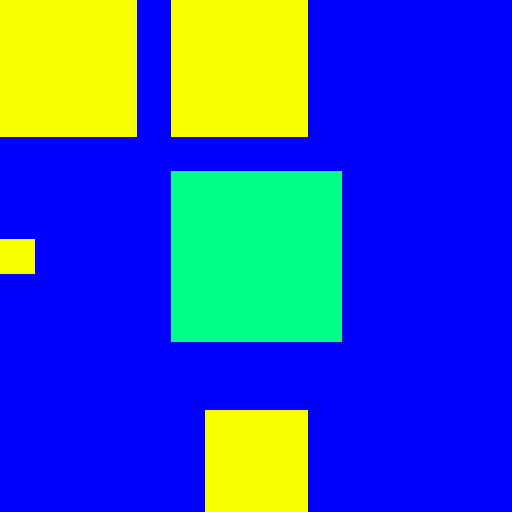

145/301


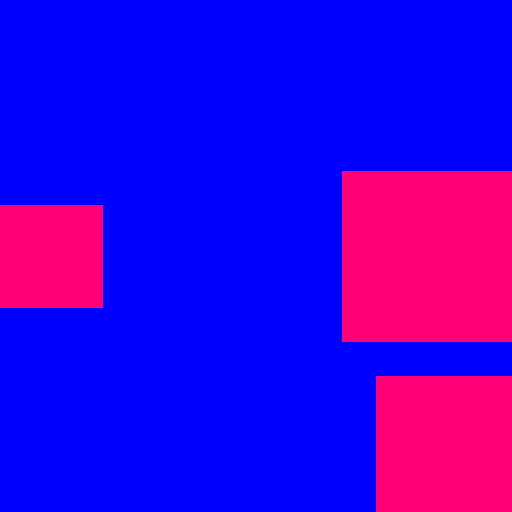

146/301


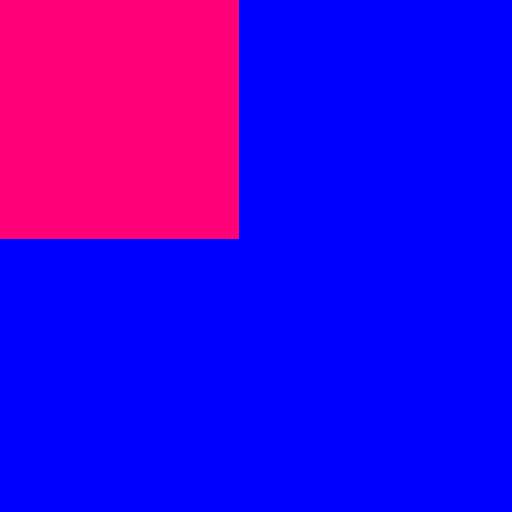

147/301


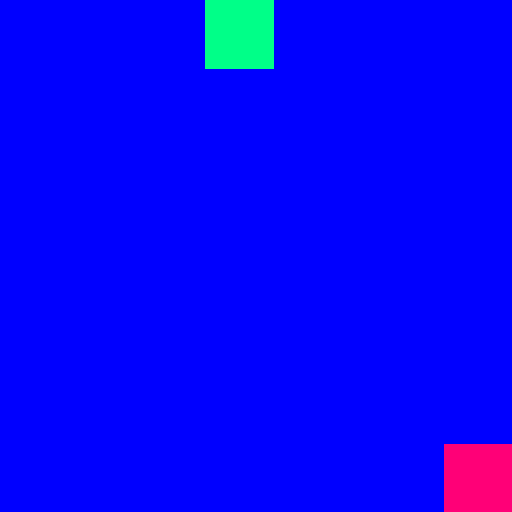

148/301


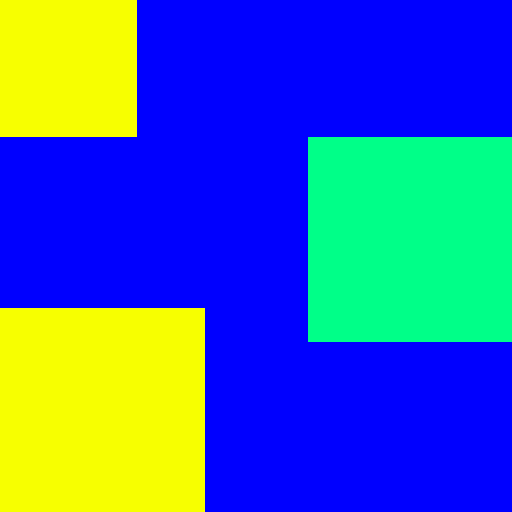

149/301


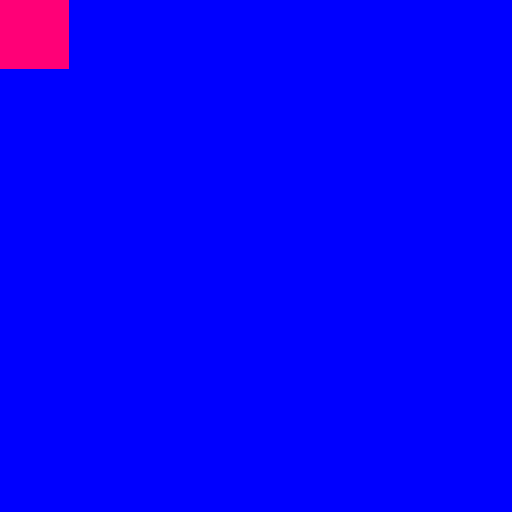

150/301


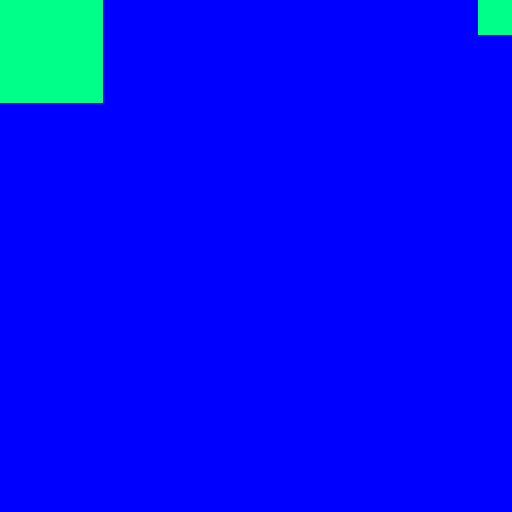

151/301


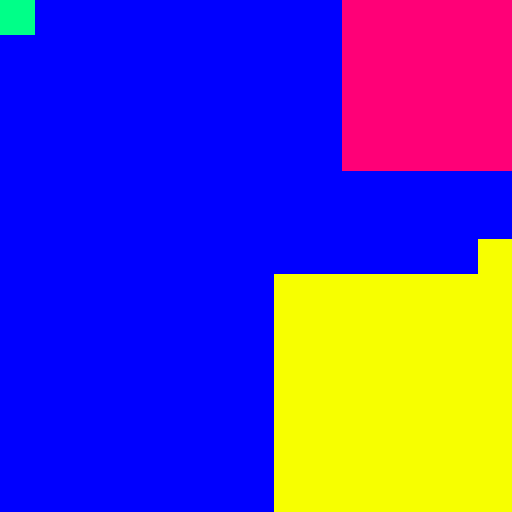

152/301


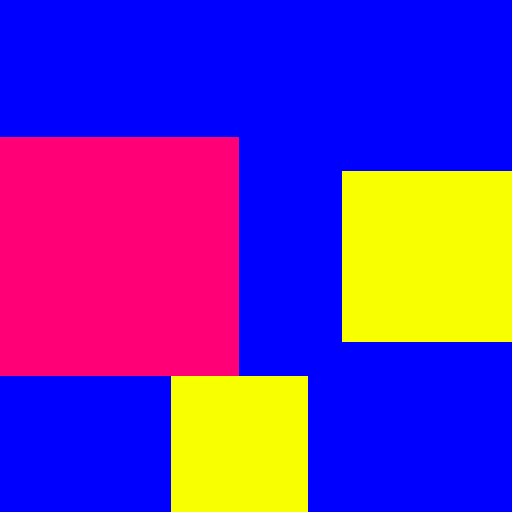

153/301


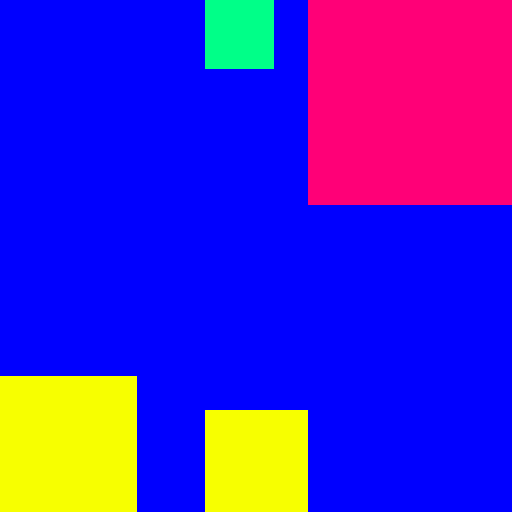

154/301


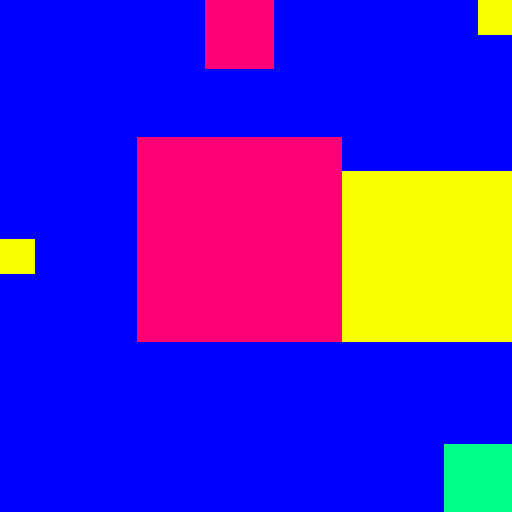

155/301


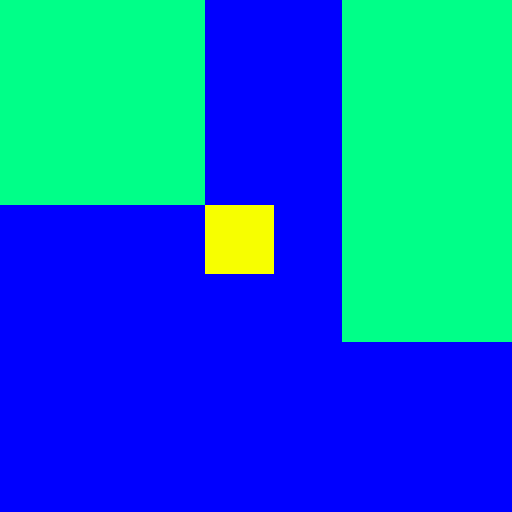

156/301


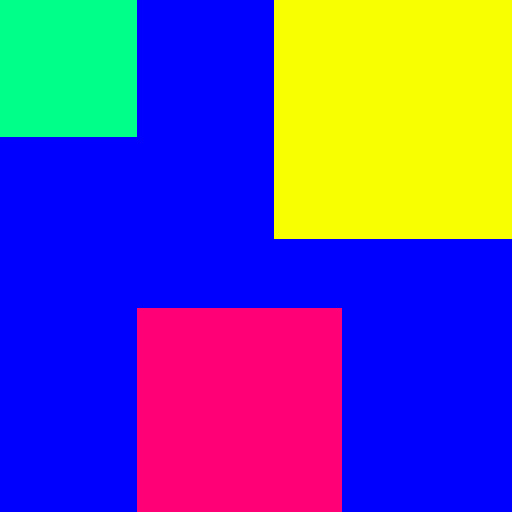

157/301


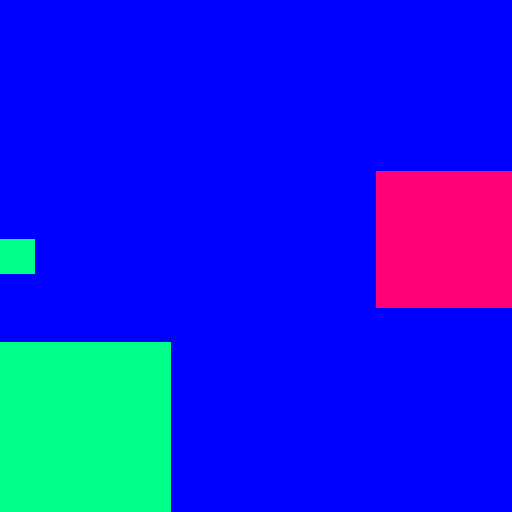

158/301


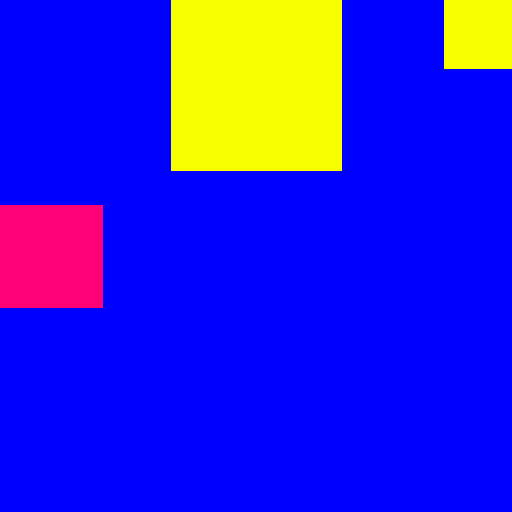

159/301


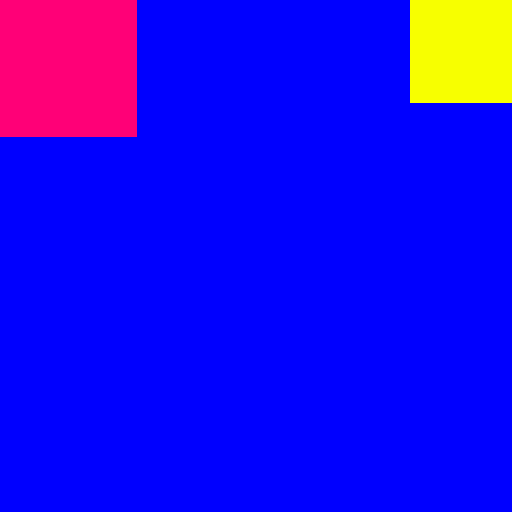

160/301


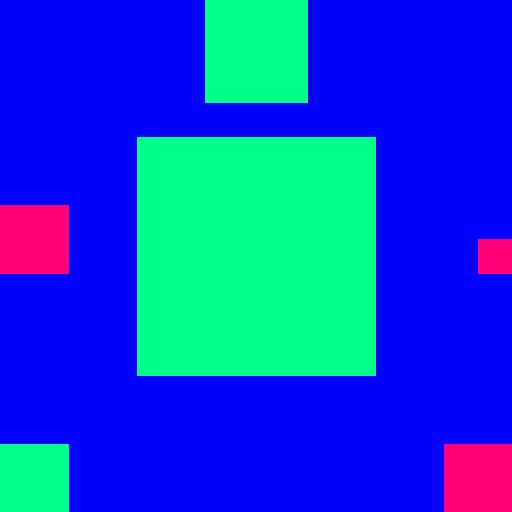

161/301


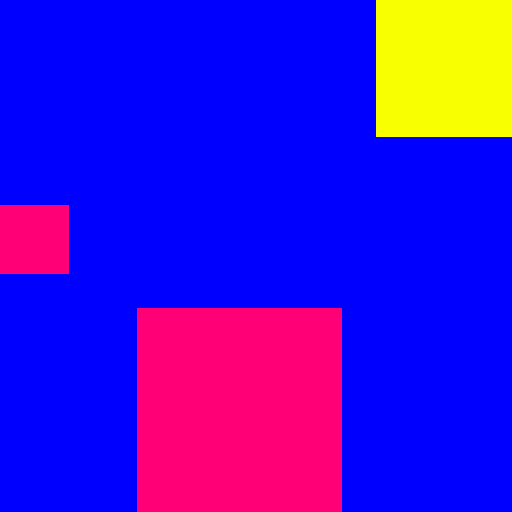

162/301


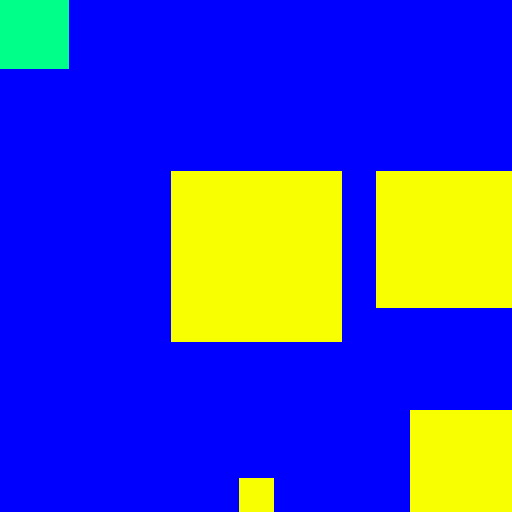

163/301


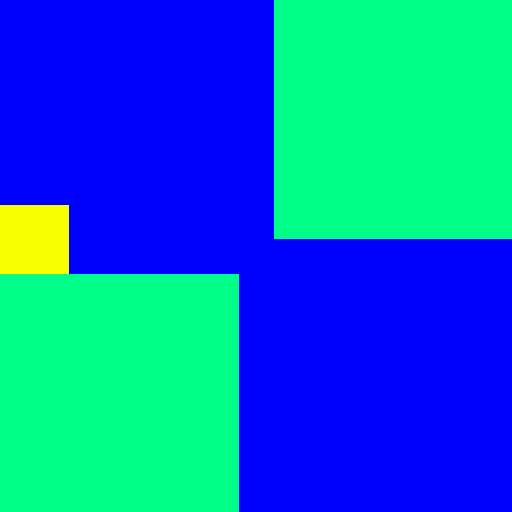

164/301


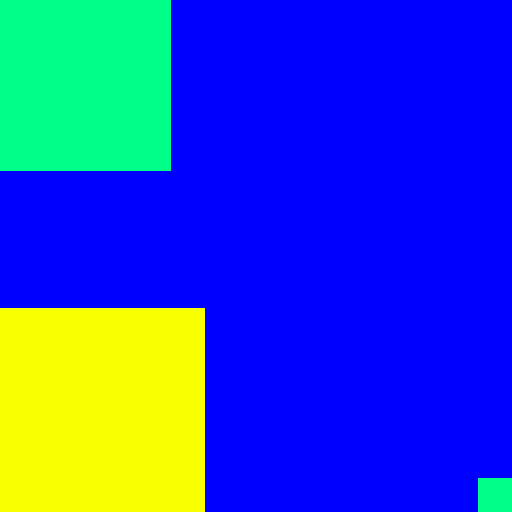

165/301


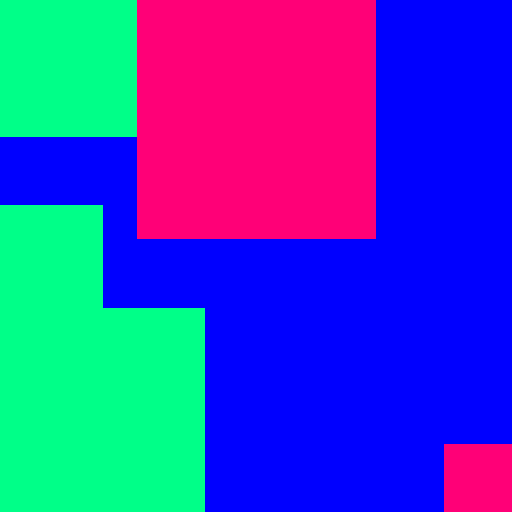

166/301


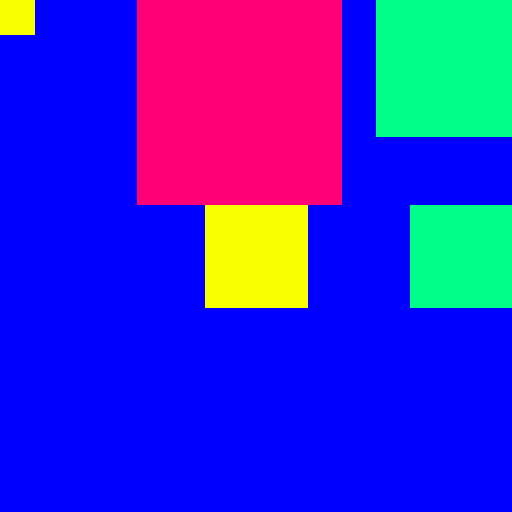

167/301


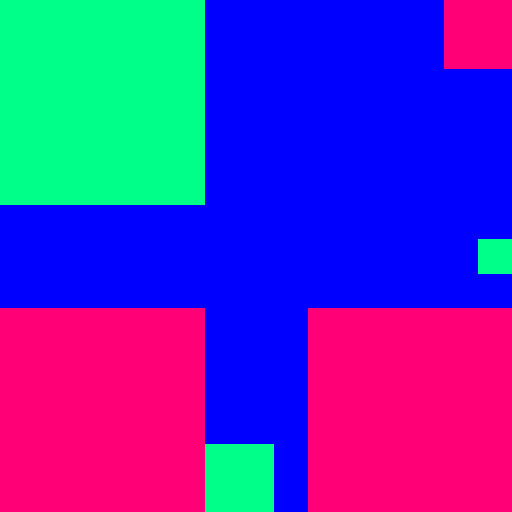

168/301


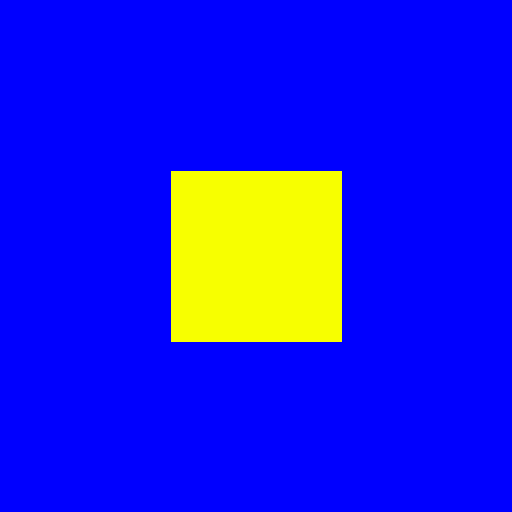

169/301


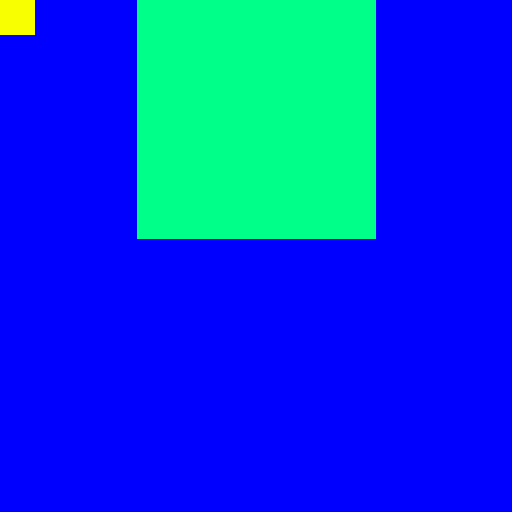

170/301


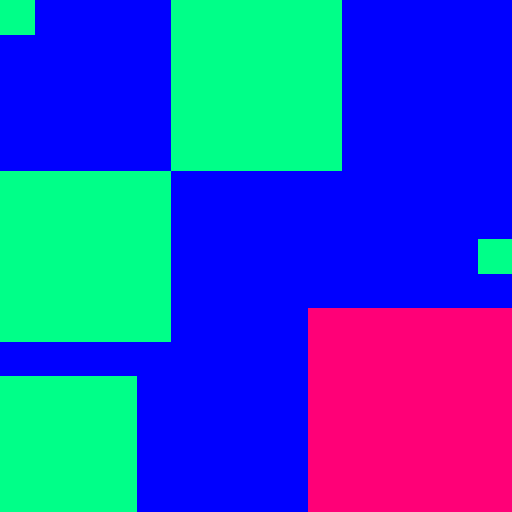

171/301


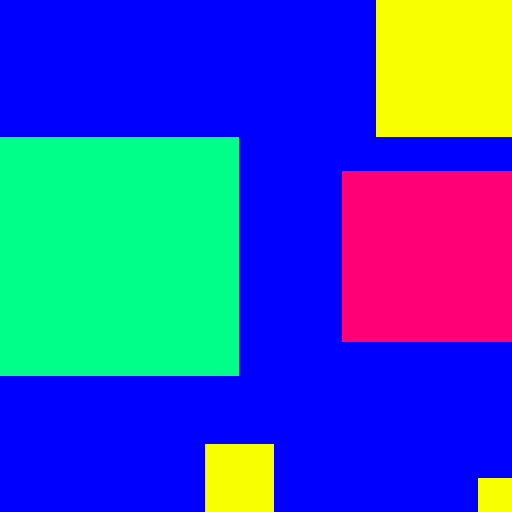

172/301


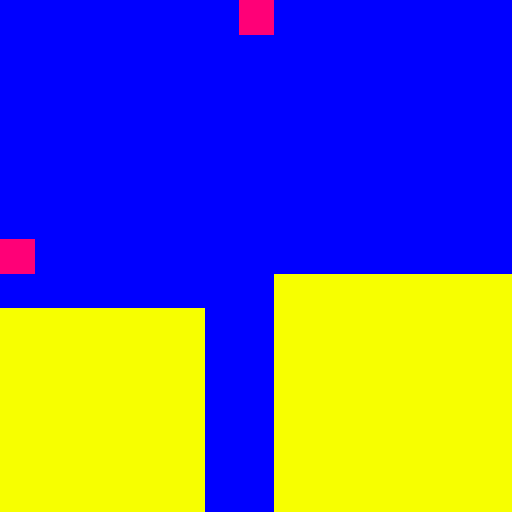

173/301


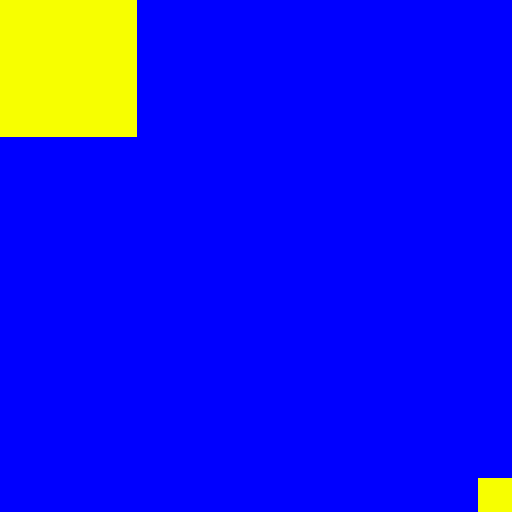

174/301


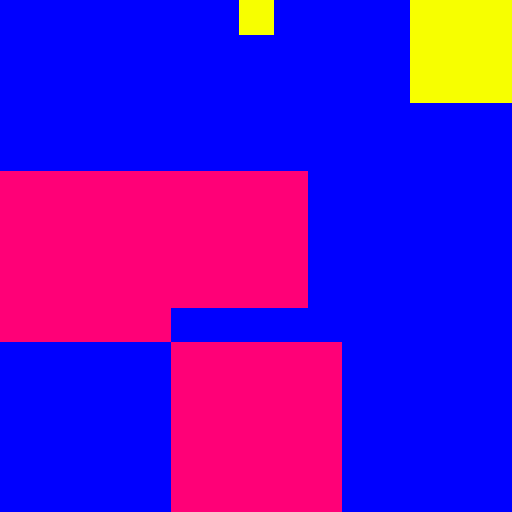

175/301


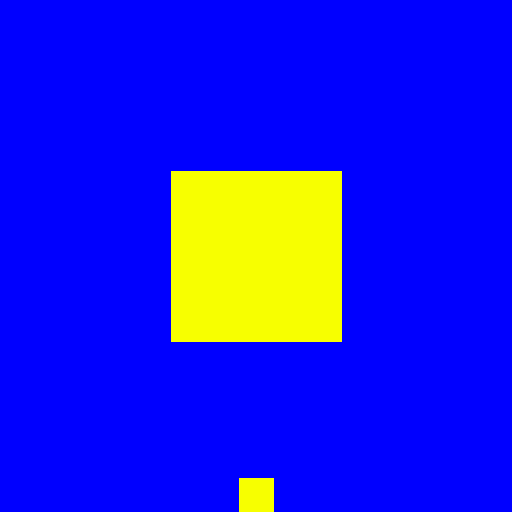

176/301


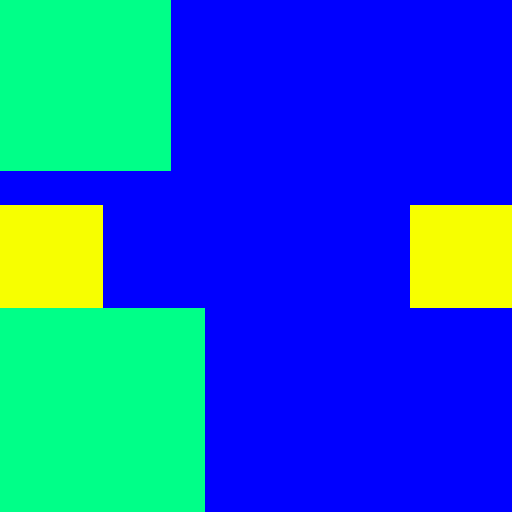

177/301


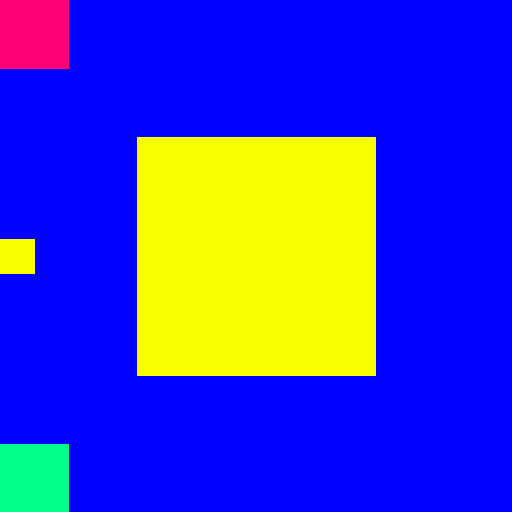

178/301


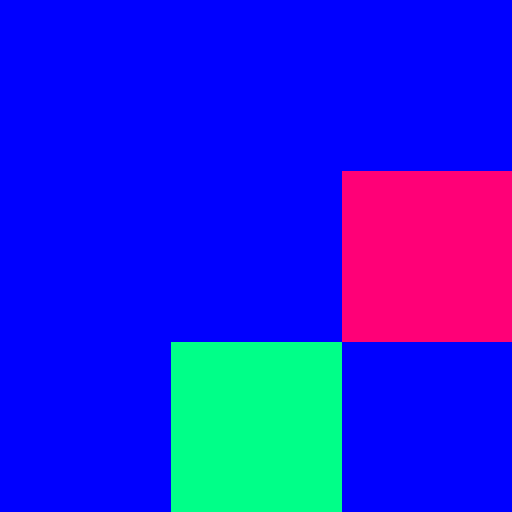

179/301


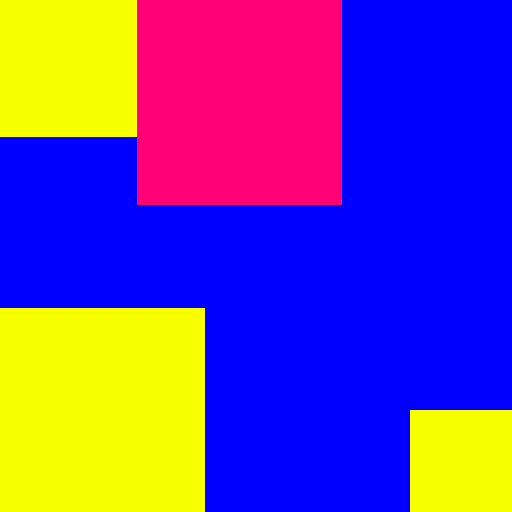

180/301


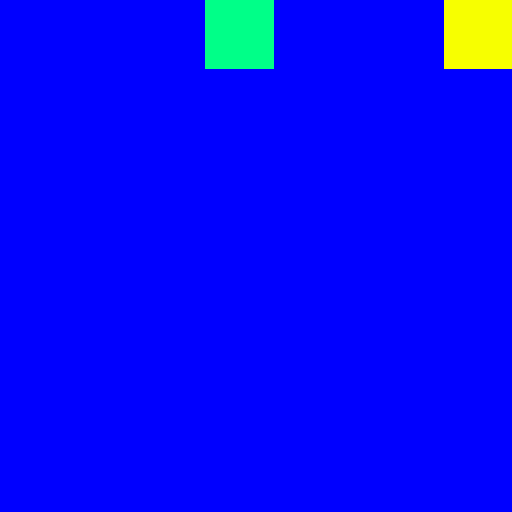

181/301


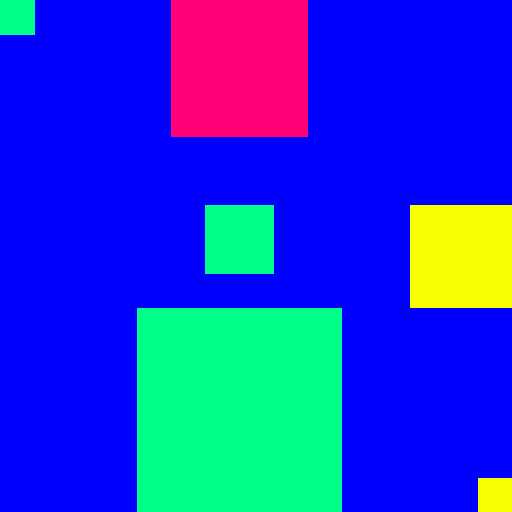

182/301


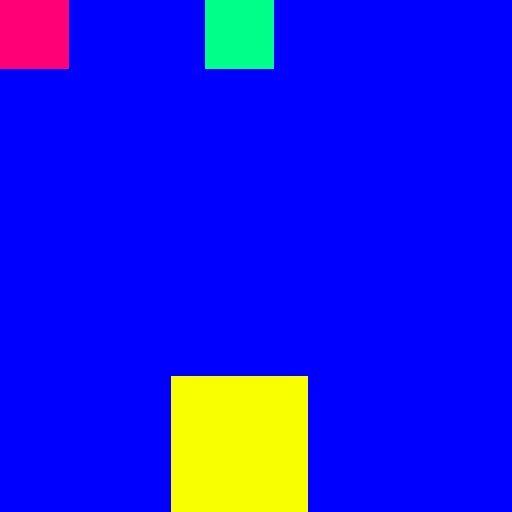

183/301


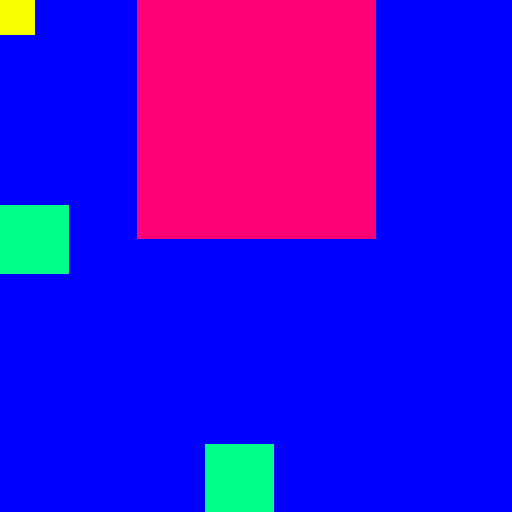

184/301


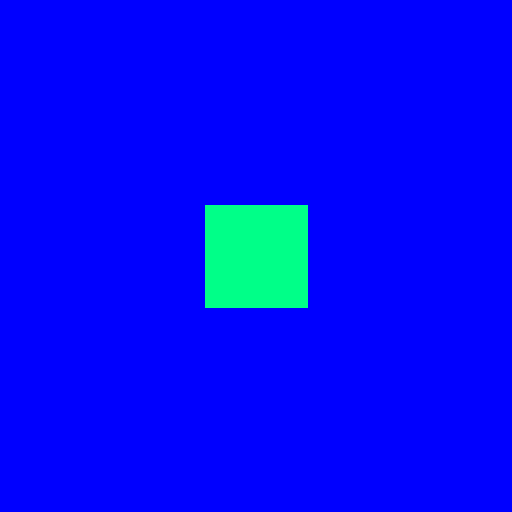

185/301


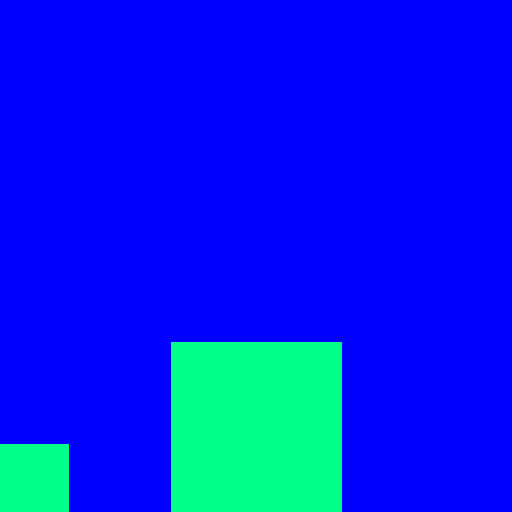

186/301


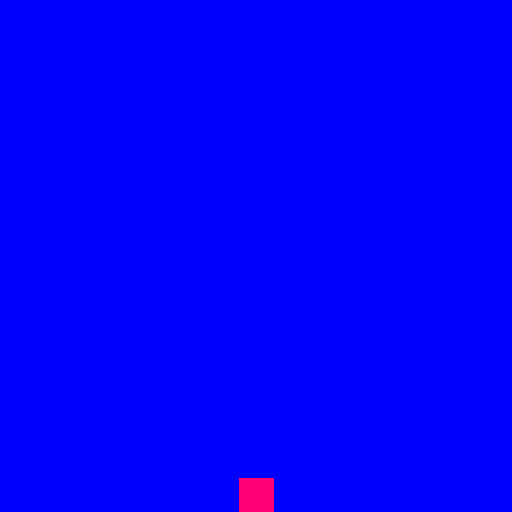

187/301


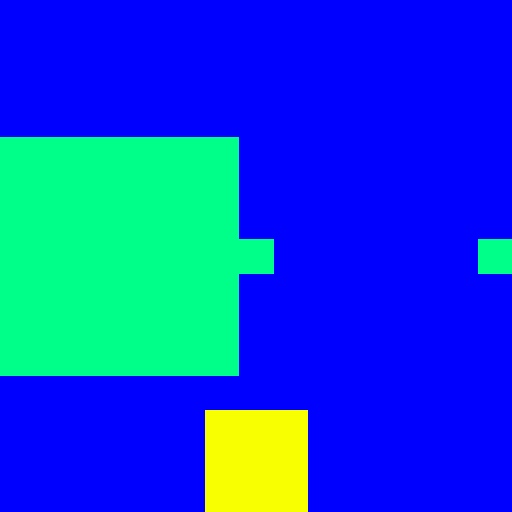

188/301


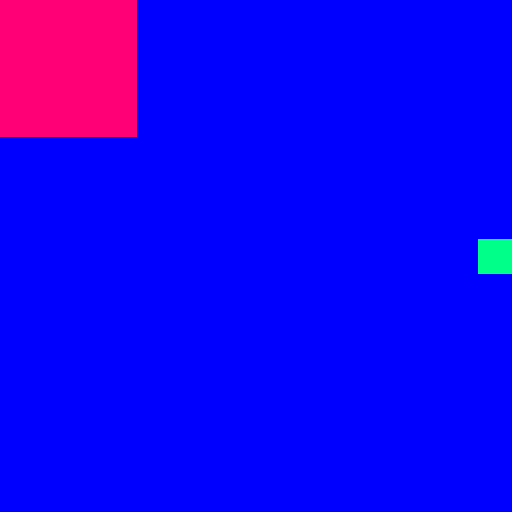

189/301


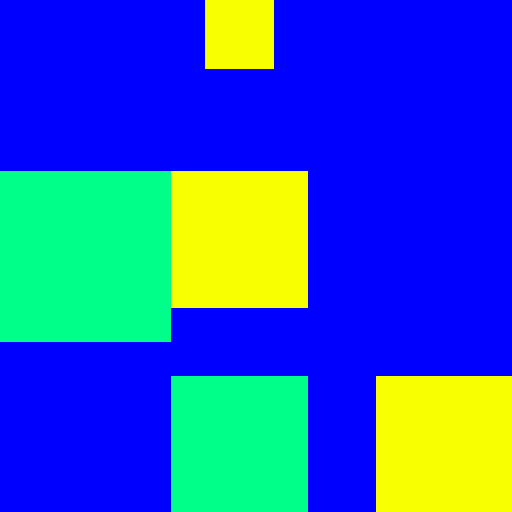

190/301


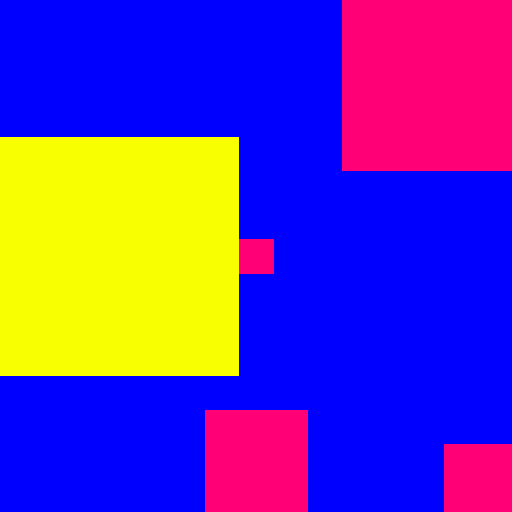

191/301


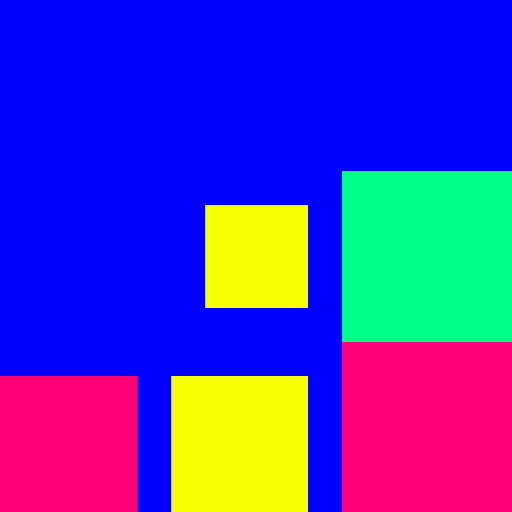

192/301


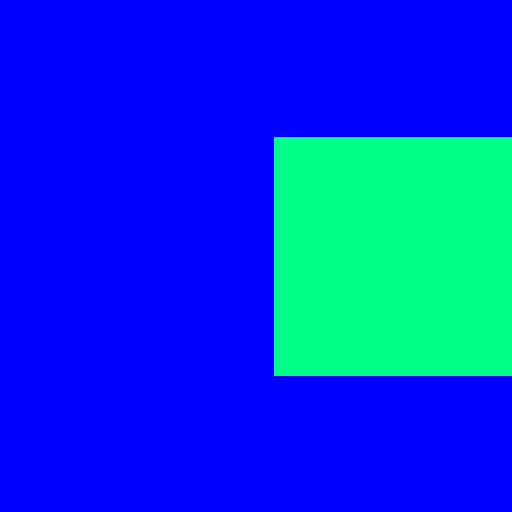

193/301


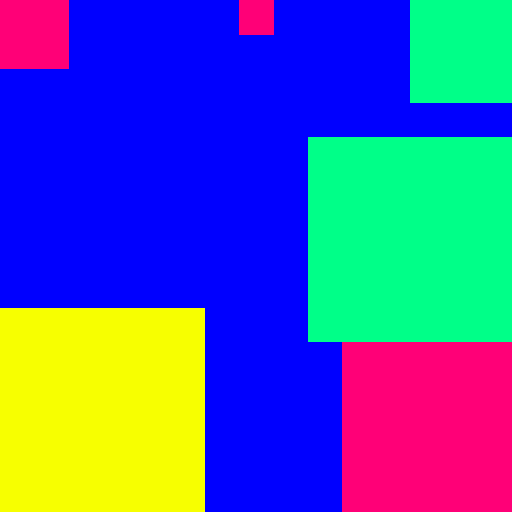

194/301


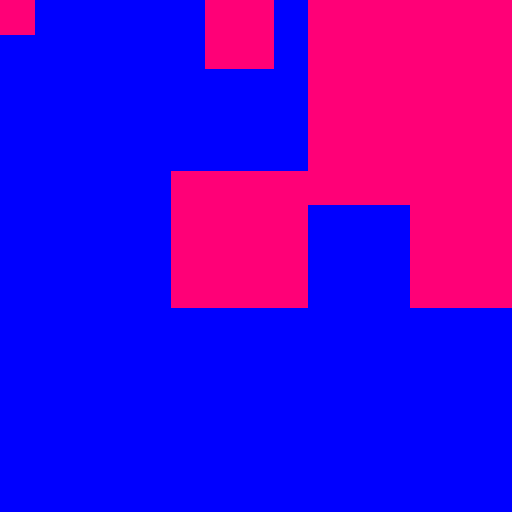

195/301


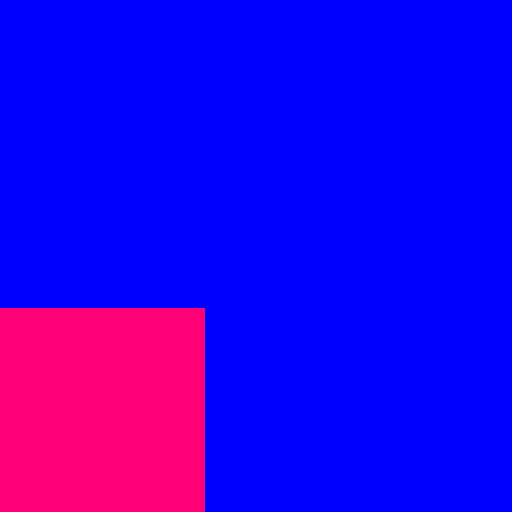

196/301


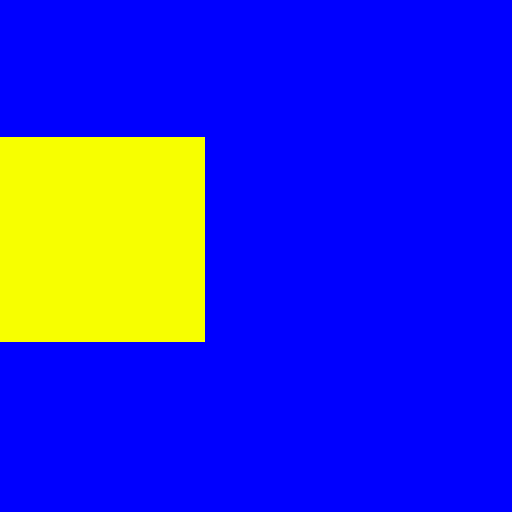

197/301


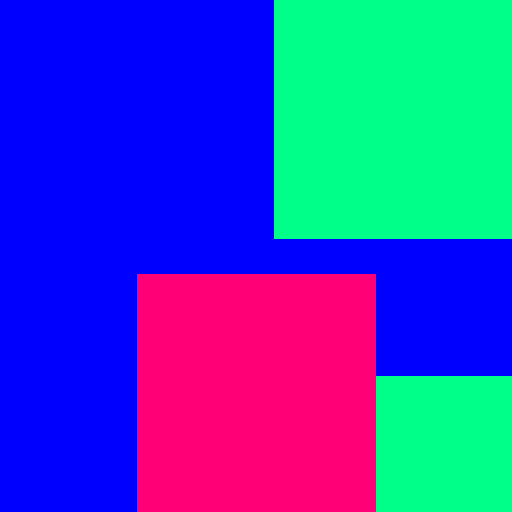

198/301


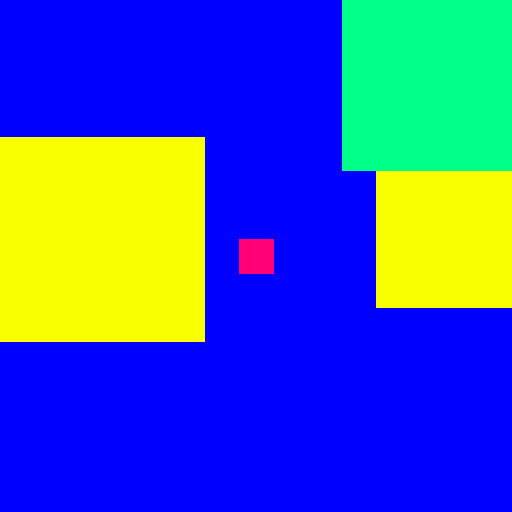

199/301


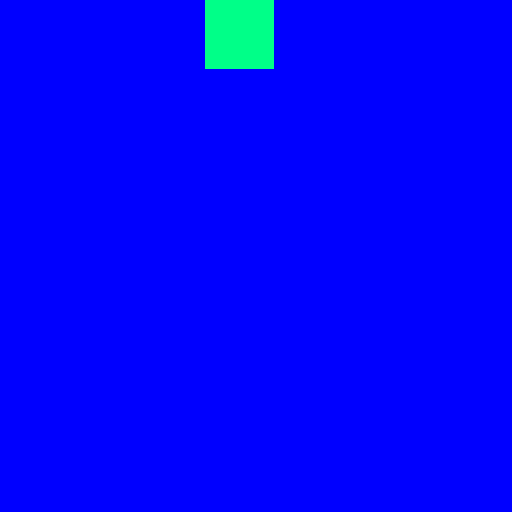

200/301


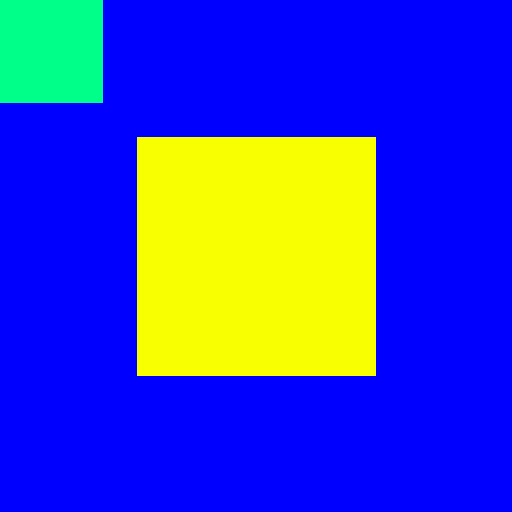

201/301


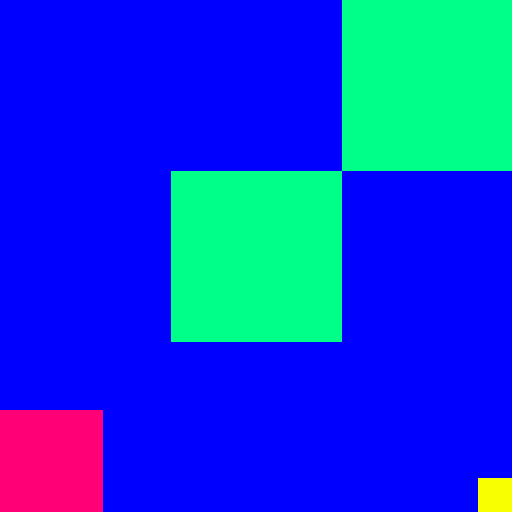

202/301


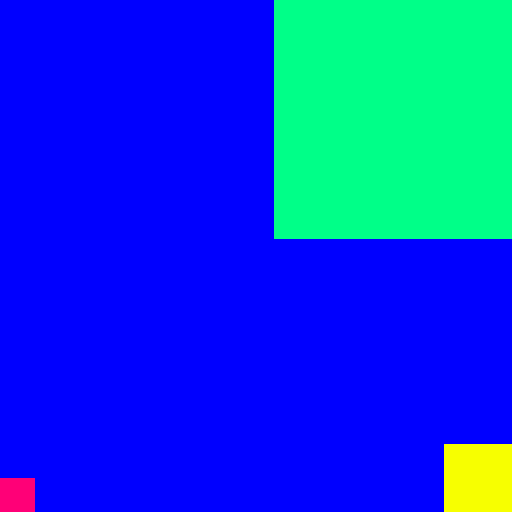

203/301


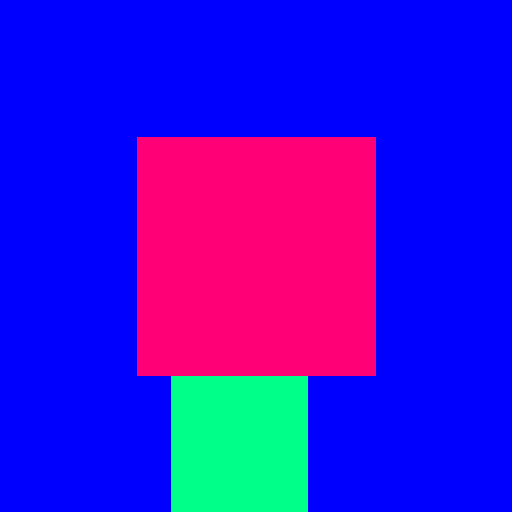

204/301


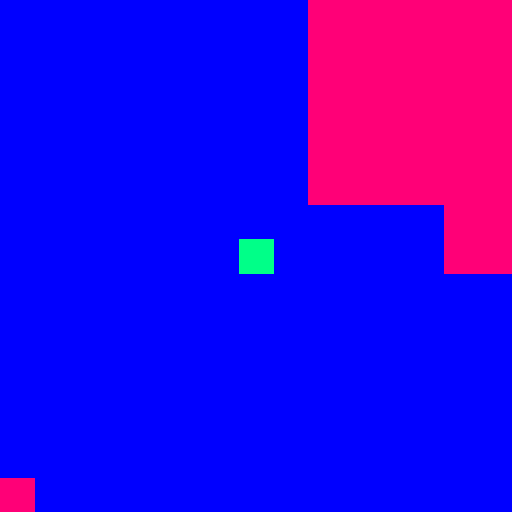

205/301


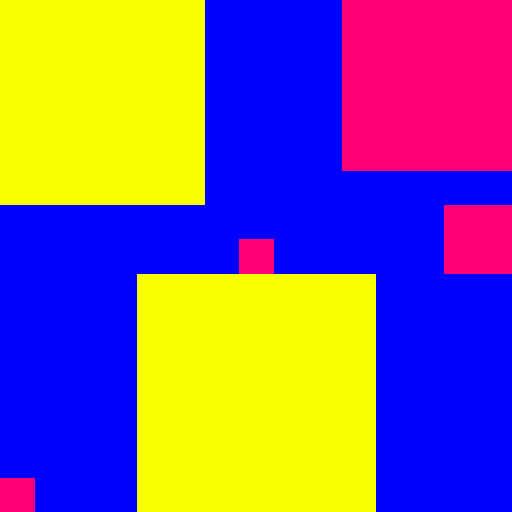

206/301


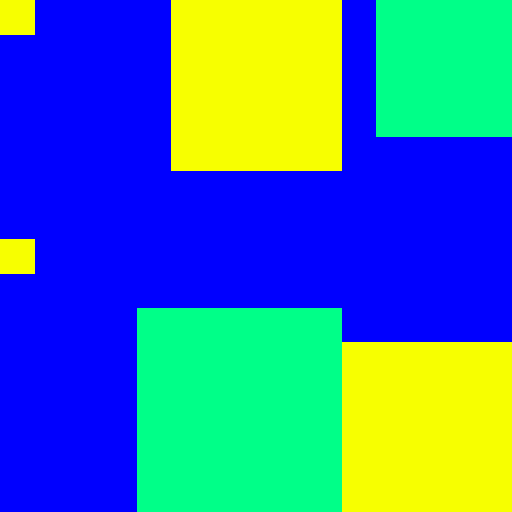

207/301


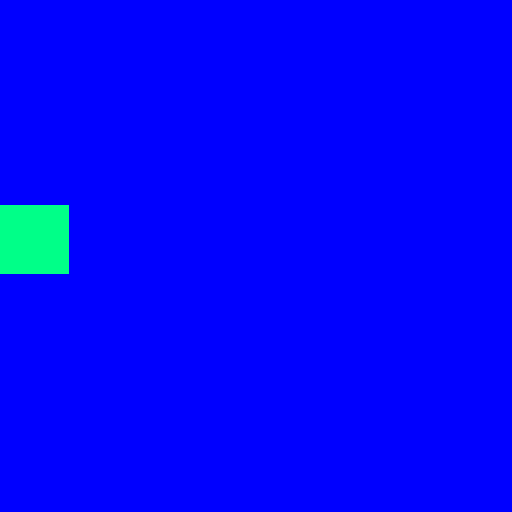

208/301


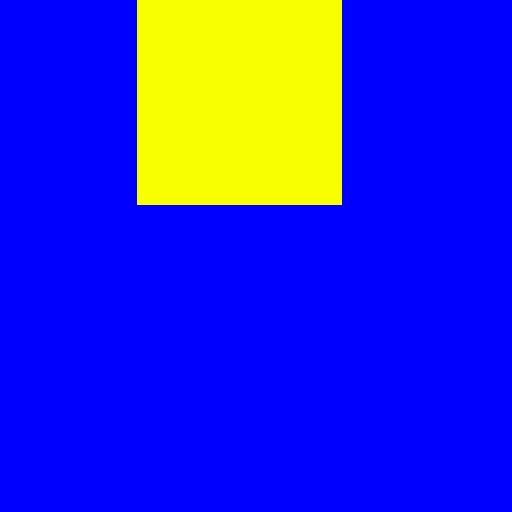

209/301


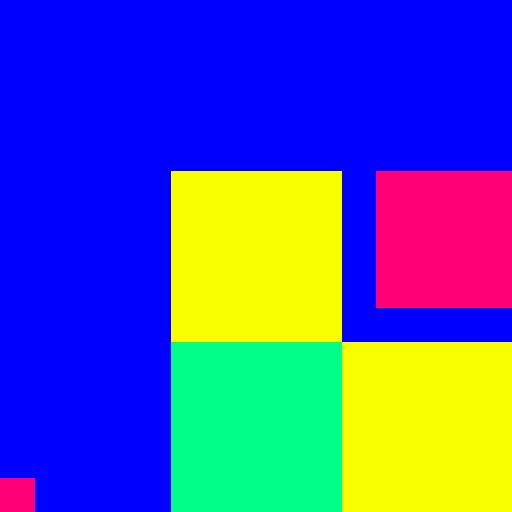

210/301


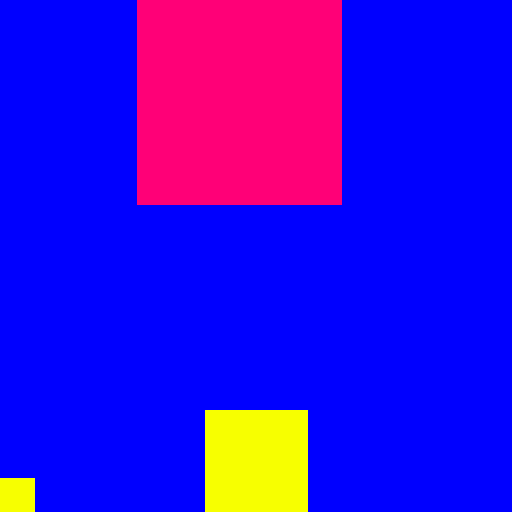

211/301


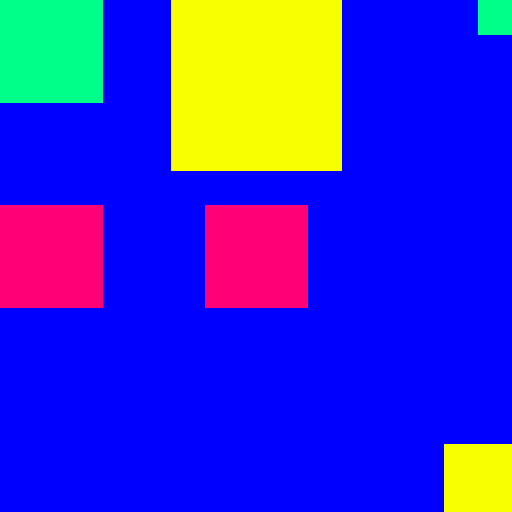

212/301


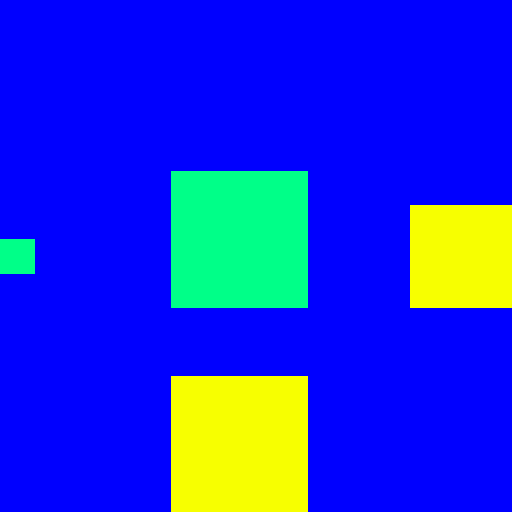

213/301


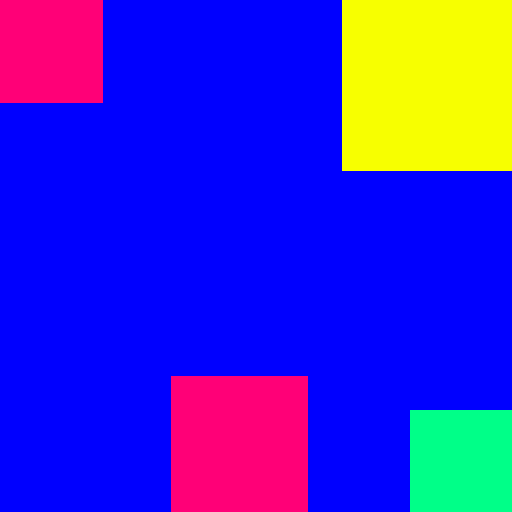

214/301


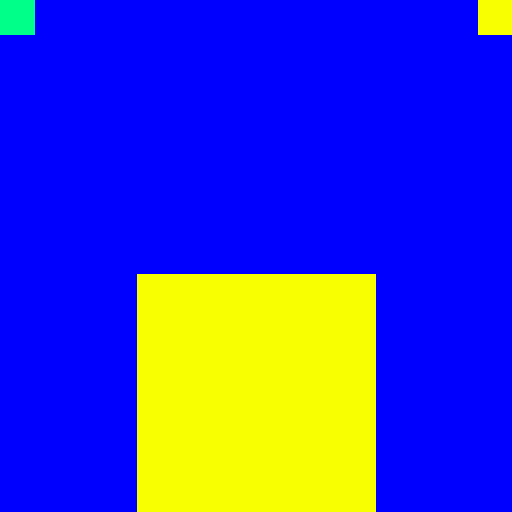

215/301


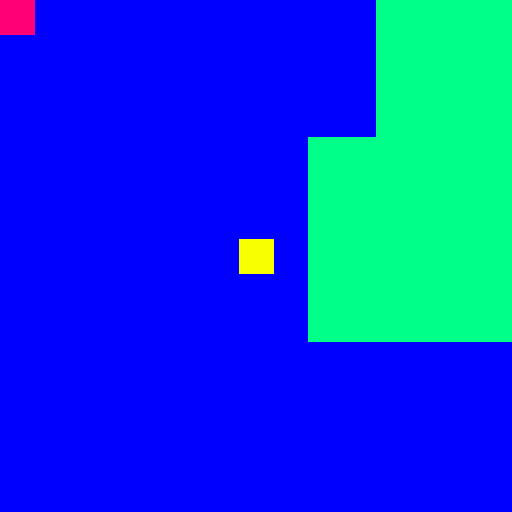

216/301


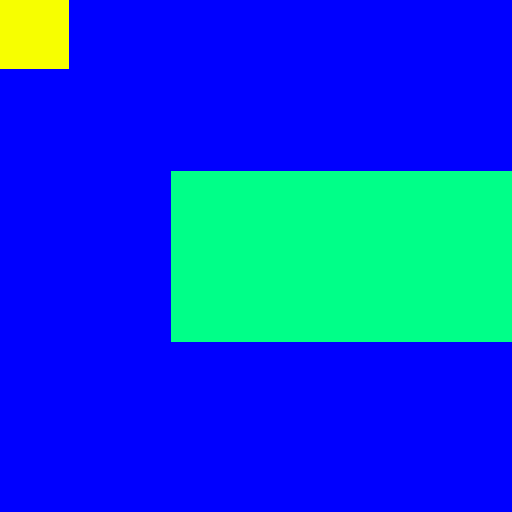

217/301


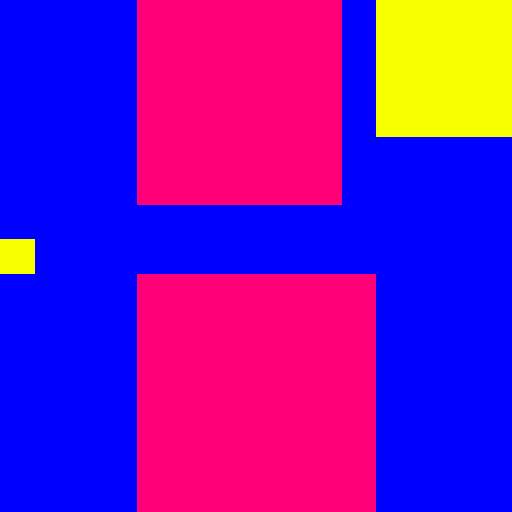

218/301


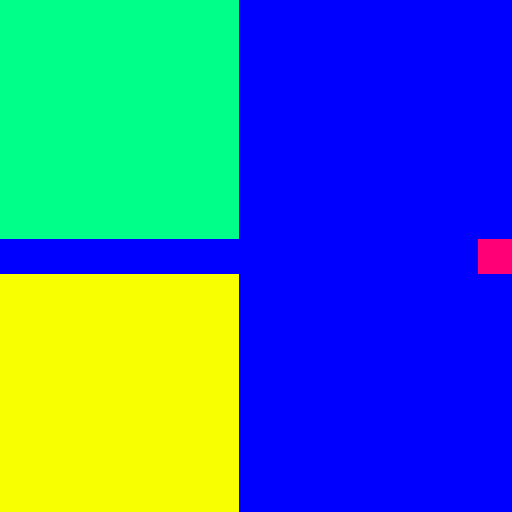

219/301


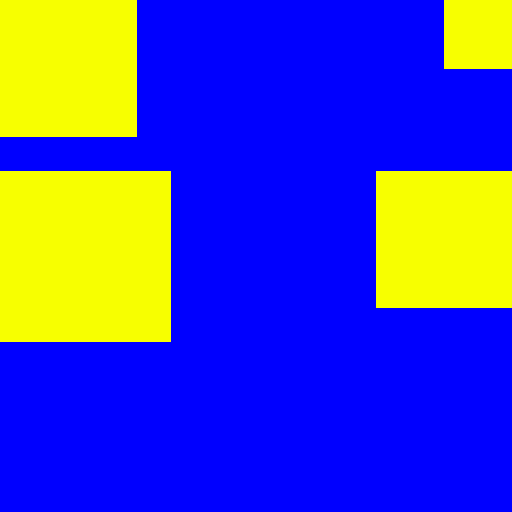

220/301


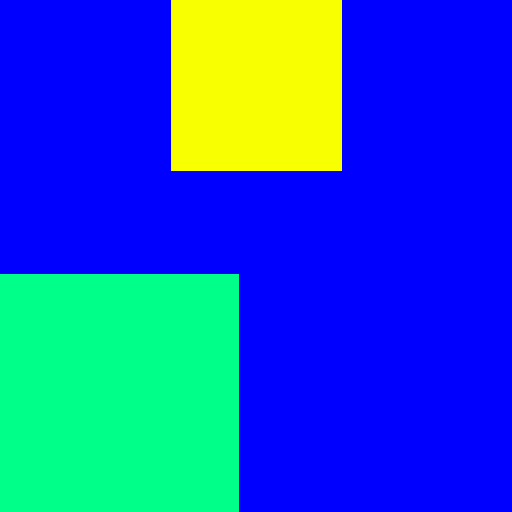

221/301


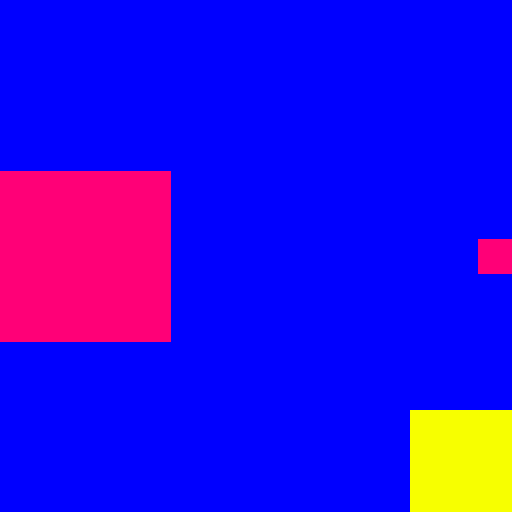

222/301


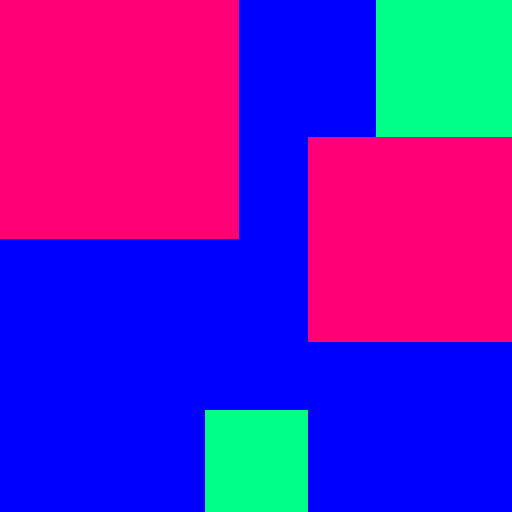

223/301


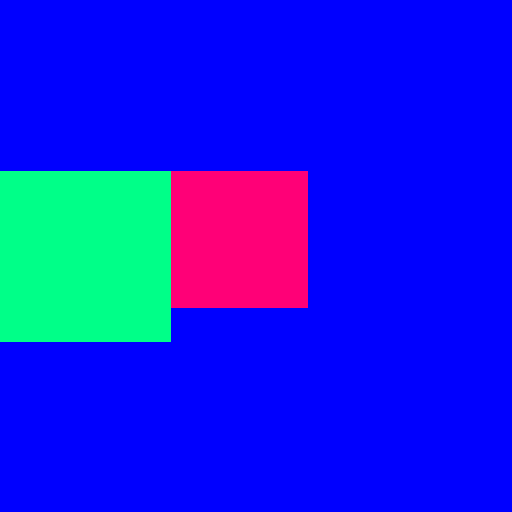

224/301


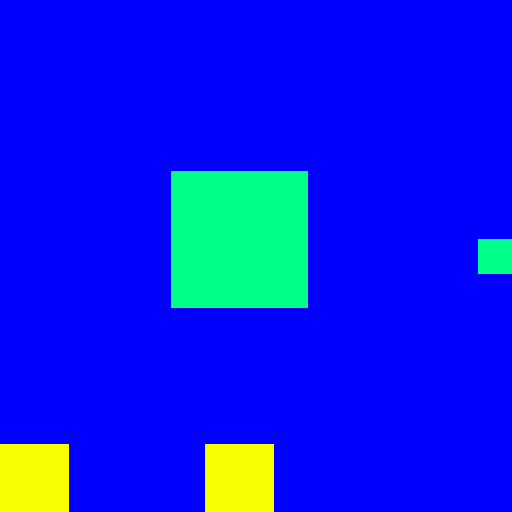

225/301


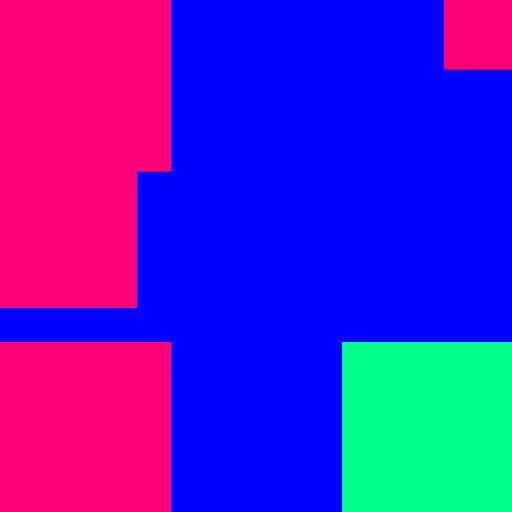

226/301


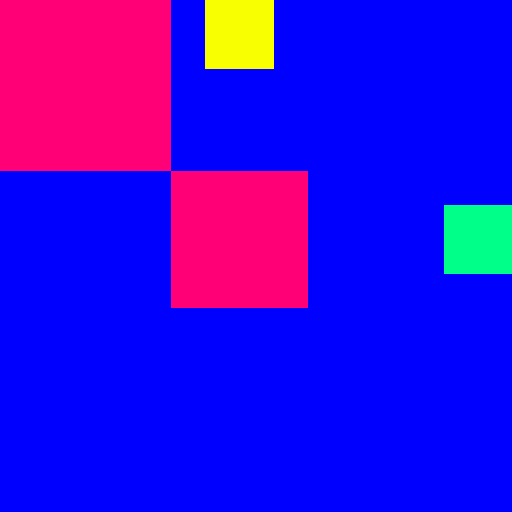

227/301


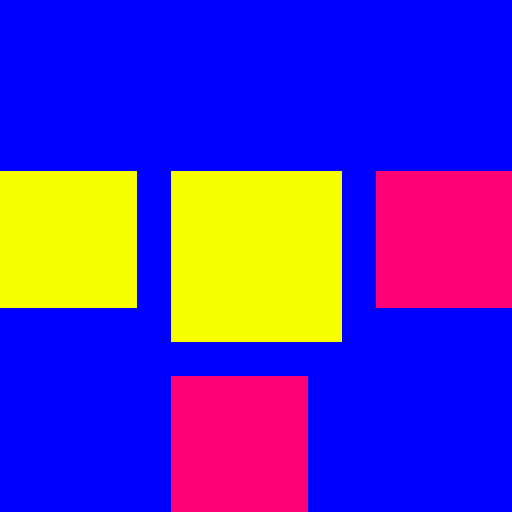

228/301


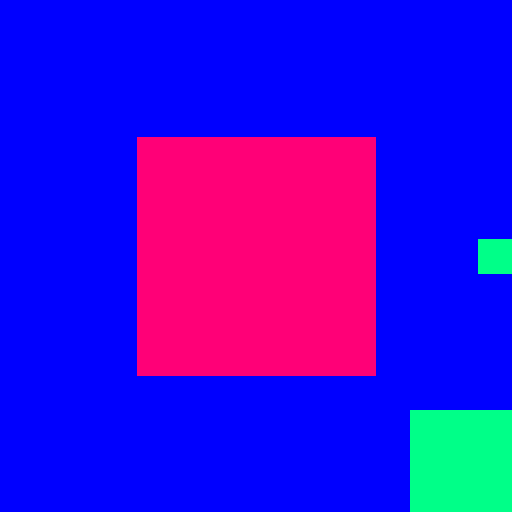

229/301


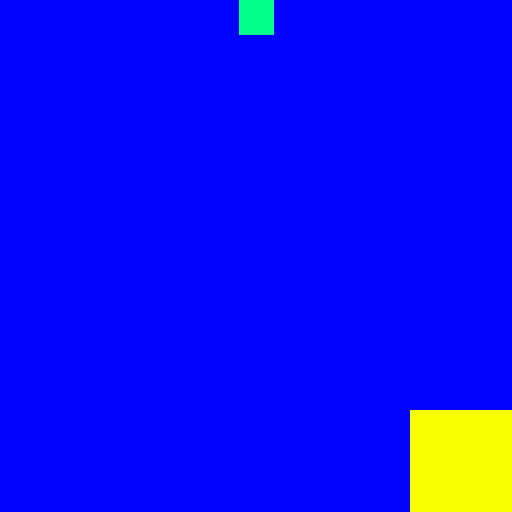

230/301


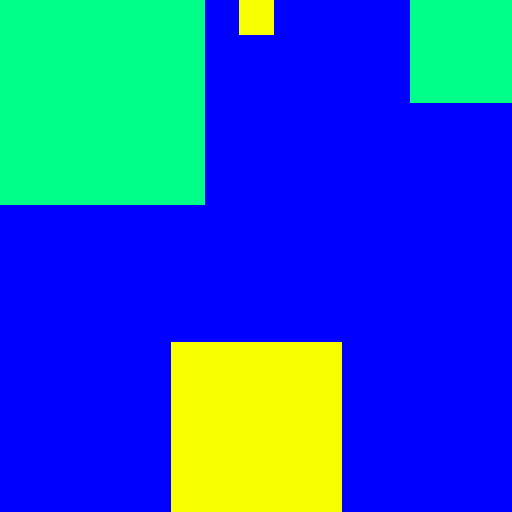

231/301


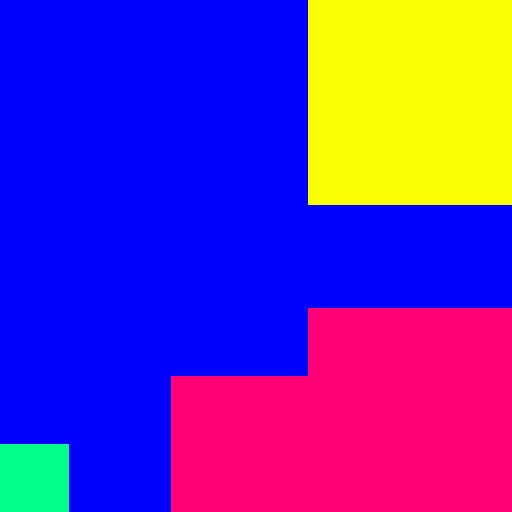

232/301


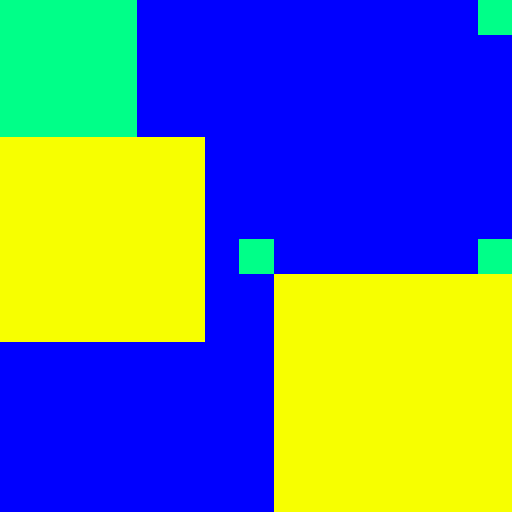

233/301


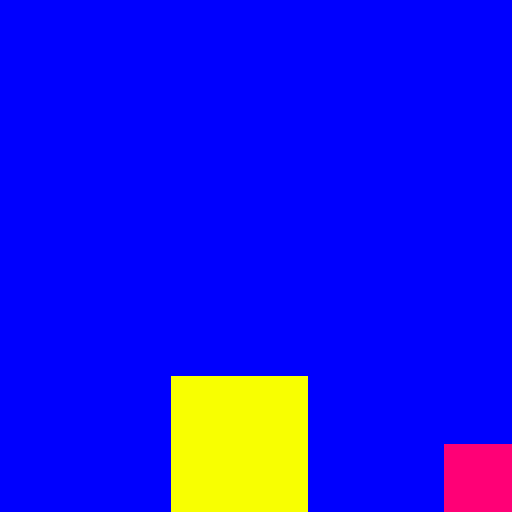

234/301


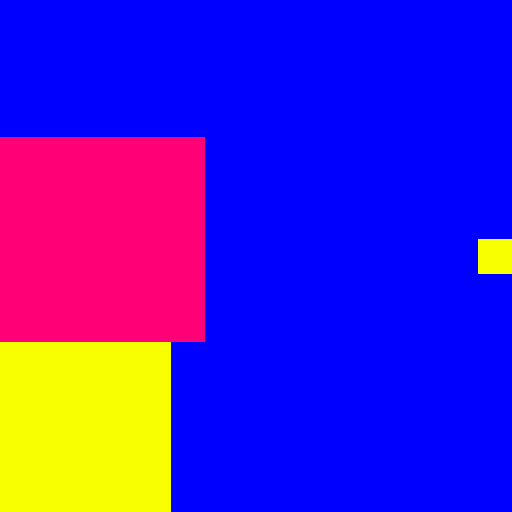

235/301


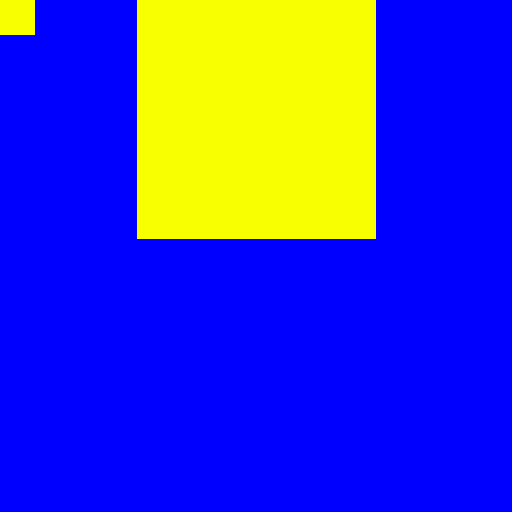

236/301


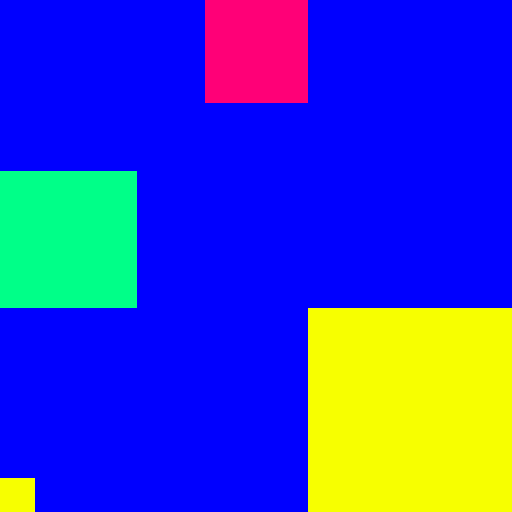

237/301


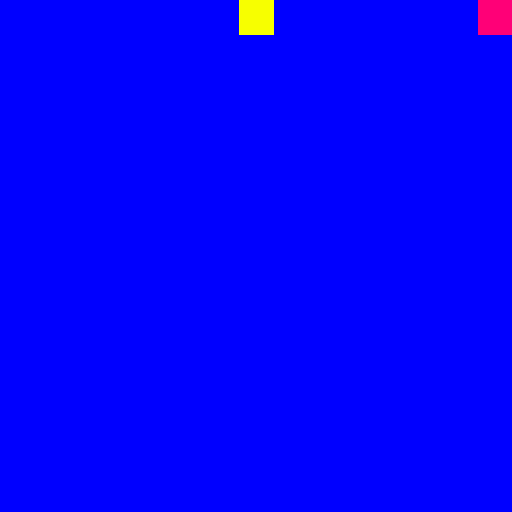

238/301


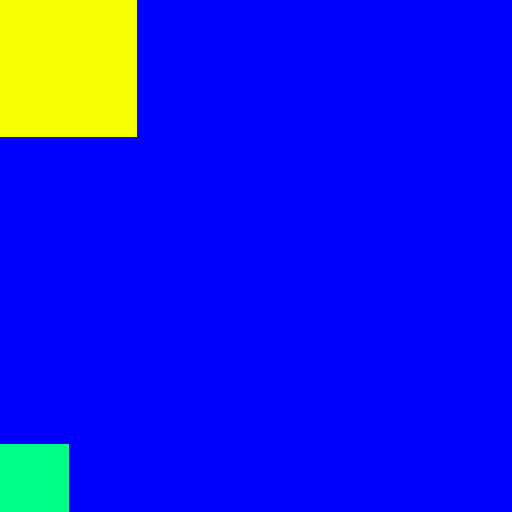

239/301


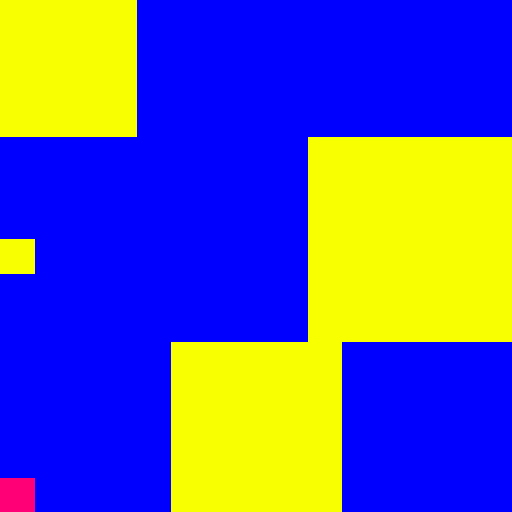

240/301


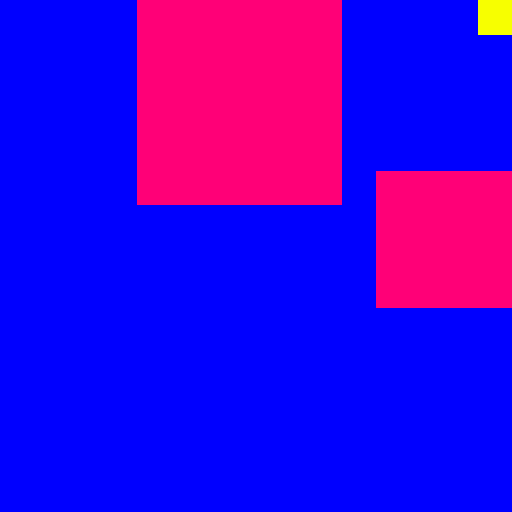

241/301


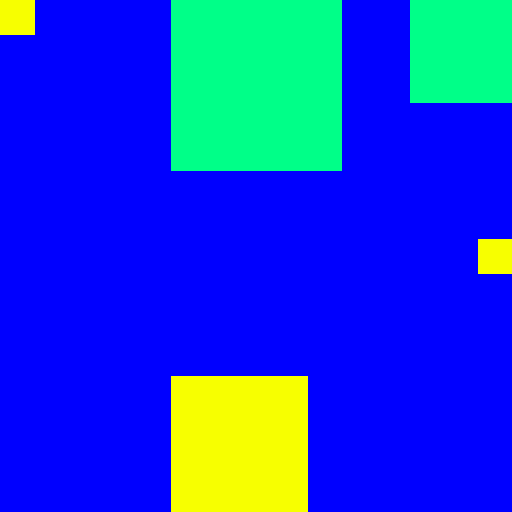

242/301


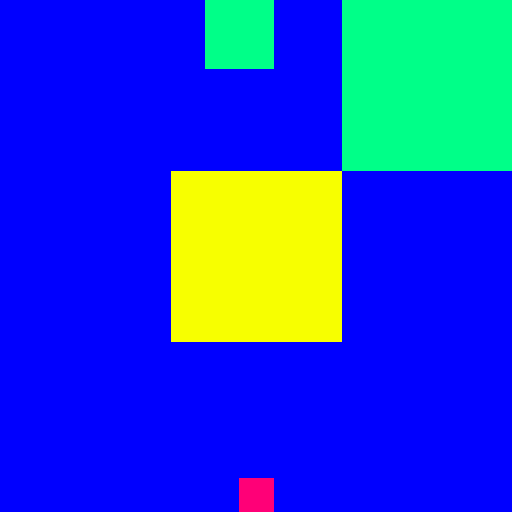

243/301


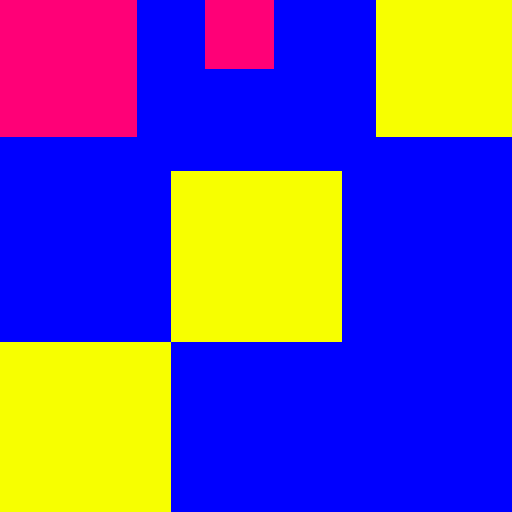

244/301


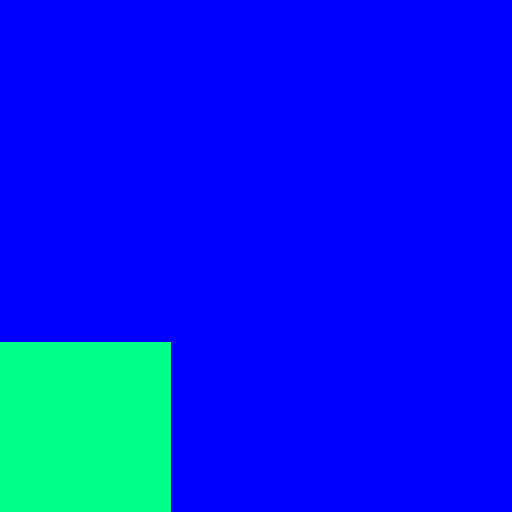

245/301


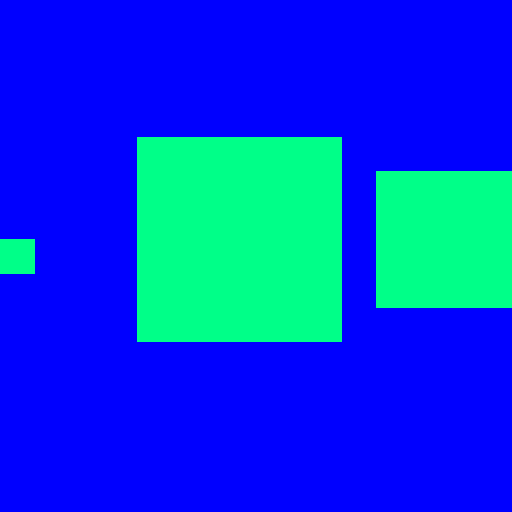

246/301


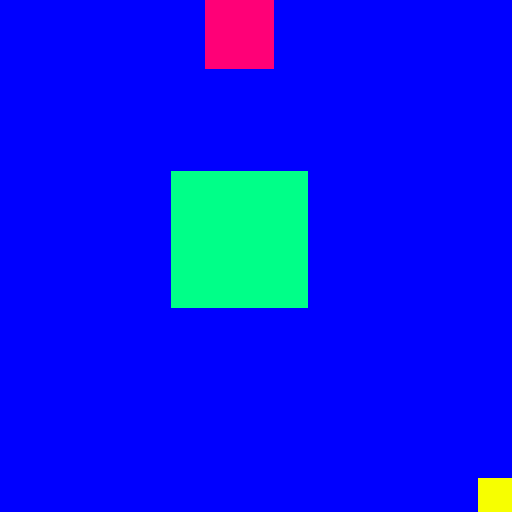

247/301


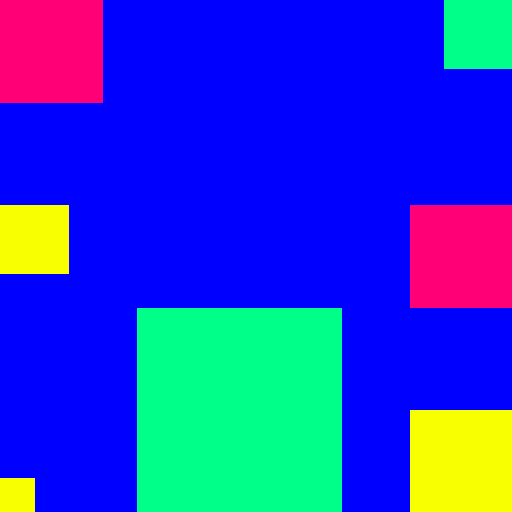

248/301


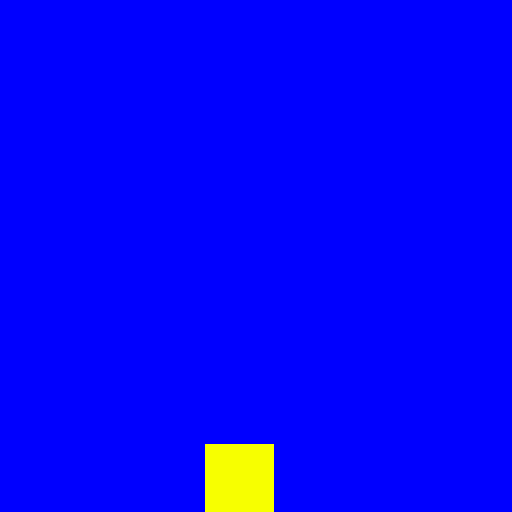

249/301


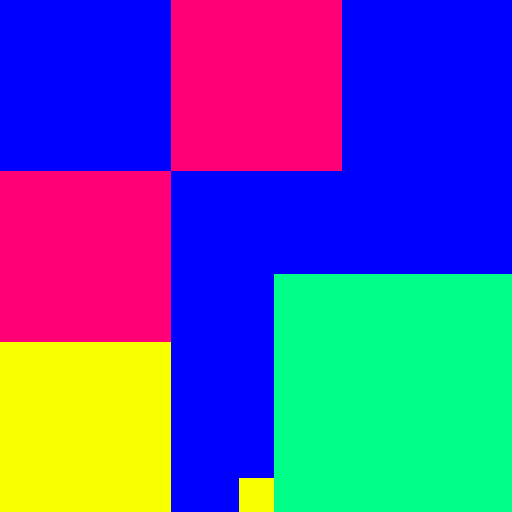

250/301


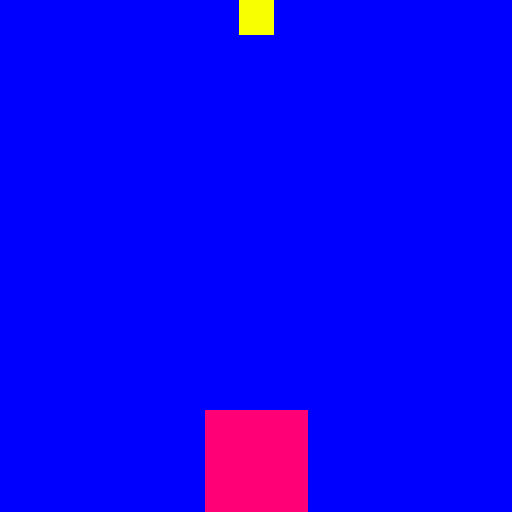

251/301


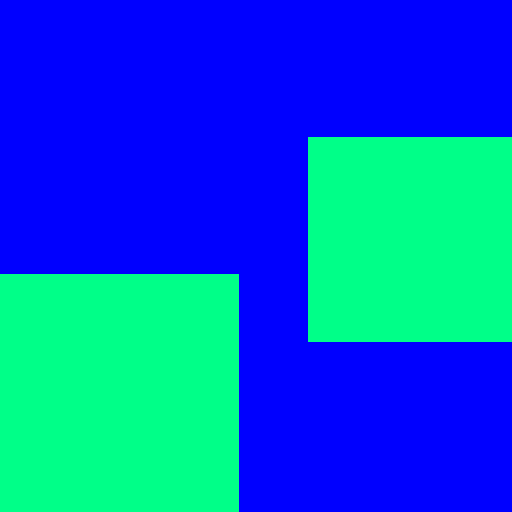

252/301


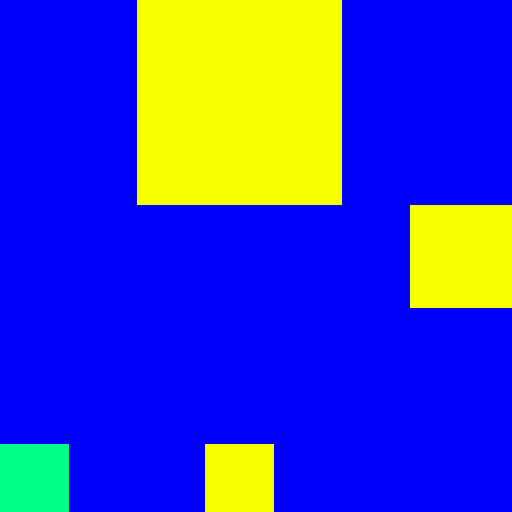

253/301


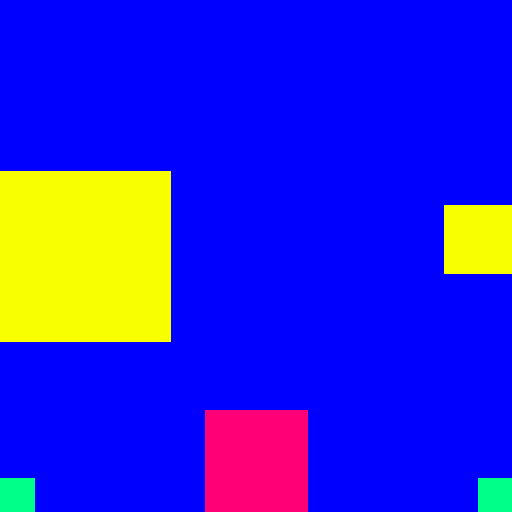

254/301


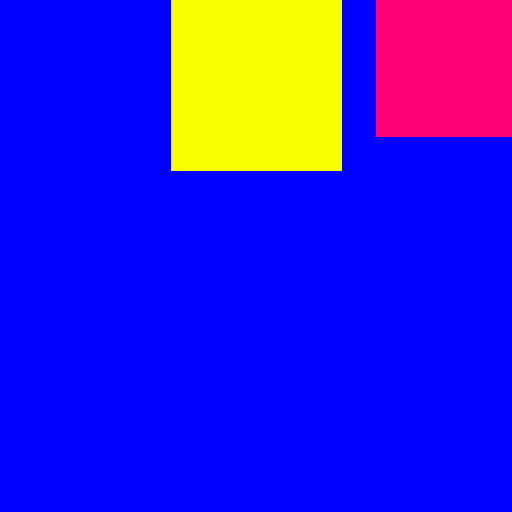

255/301


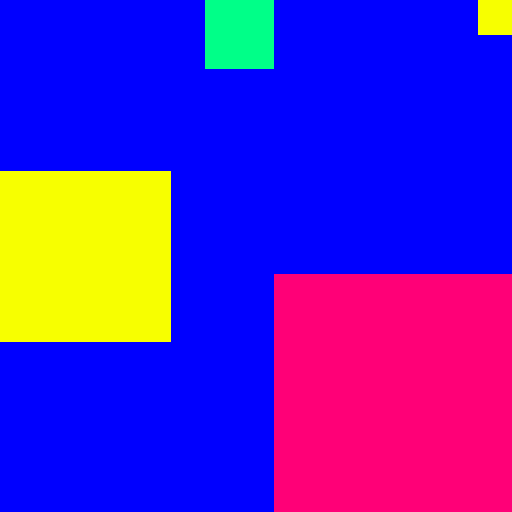

256/301


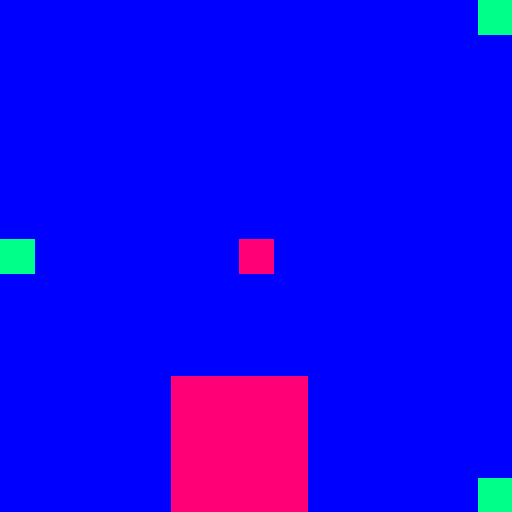

257/301


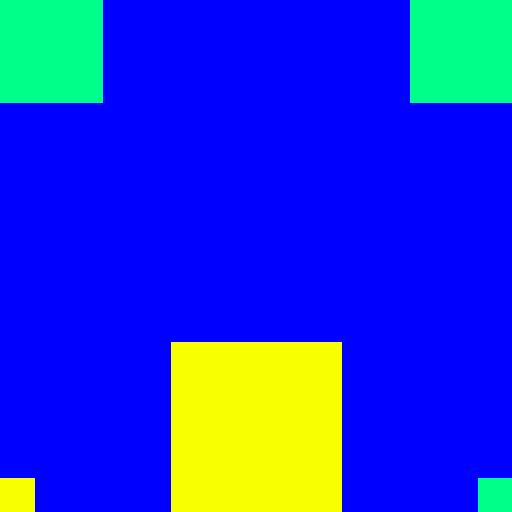

258/301


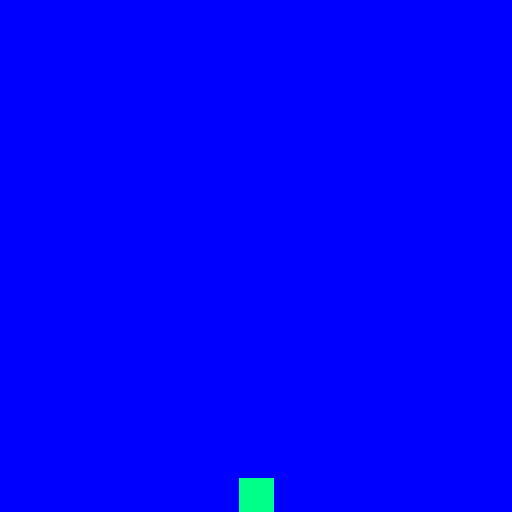

259/301


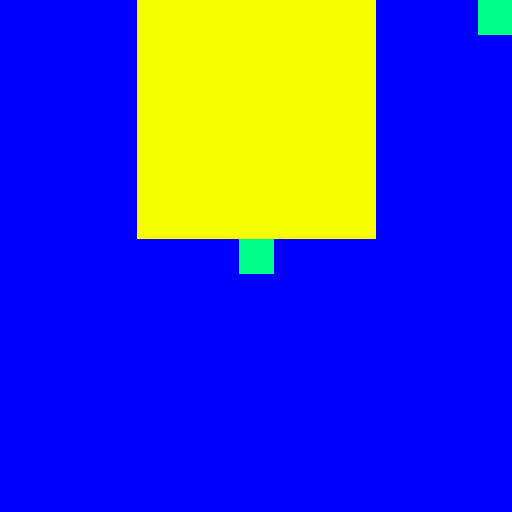

260/301


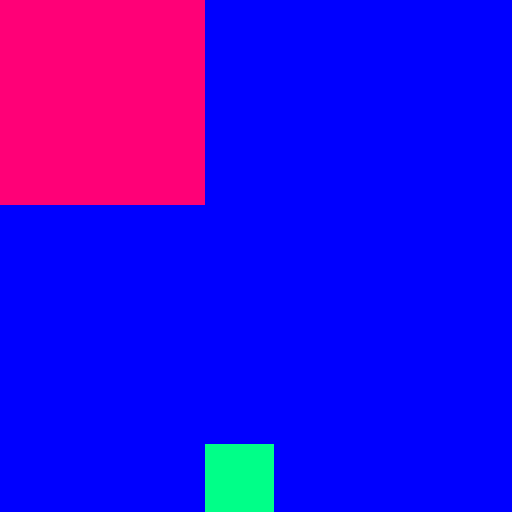

261/301


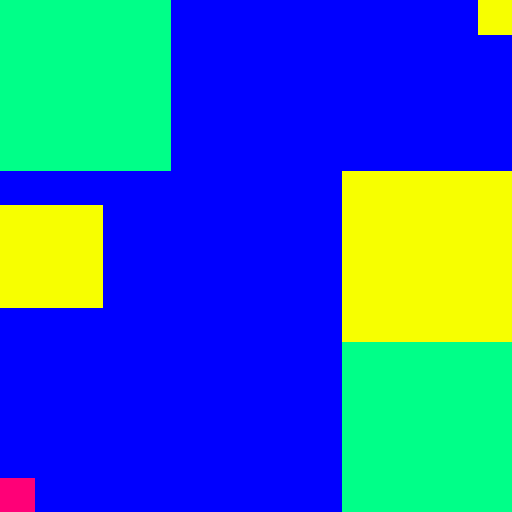

262/301


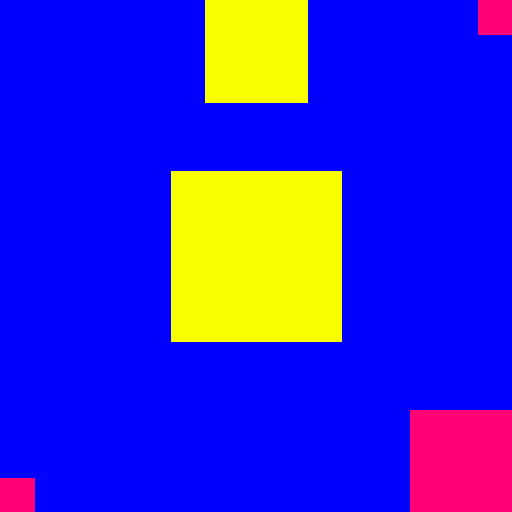

263/301


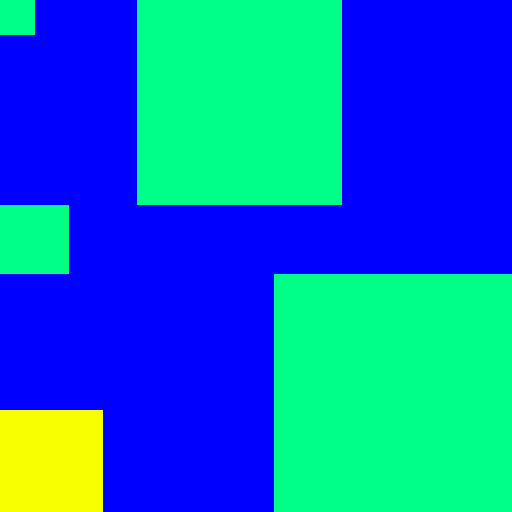

264/301


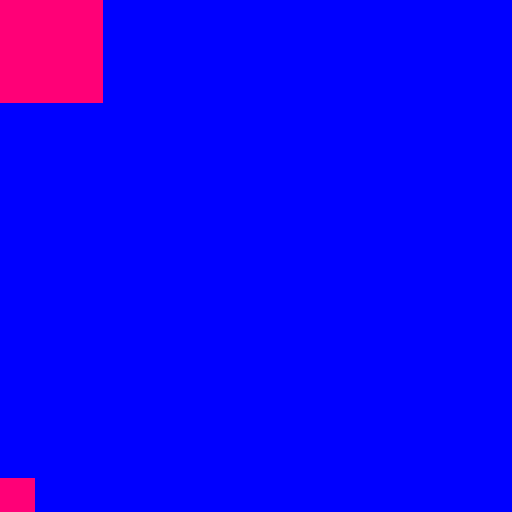

265/301


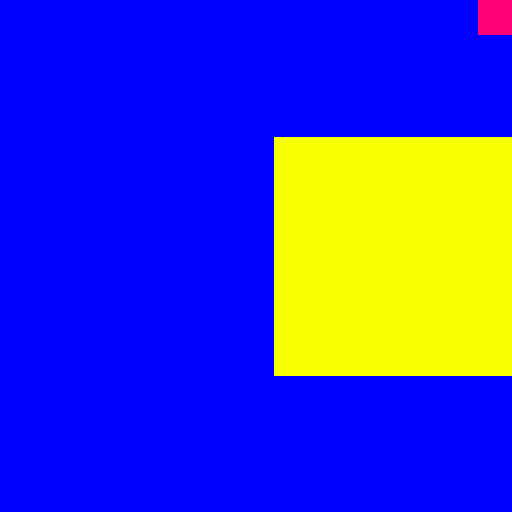

266/301


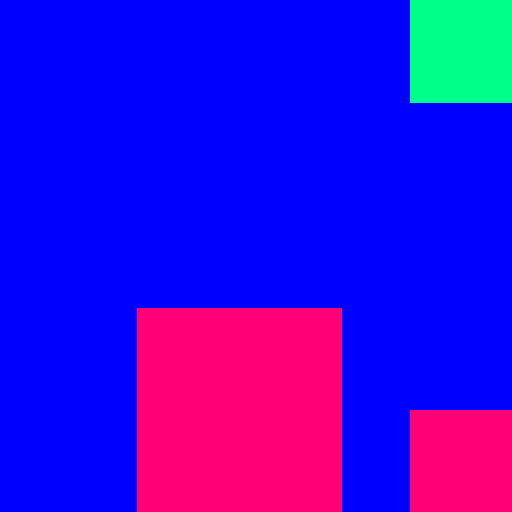

267/301


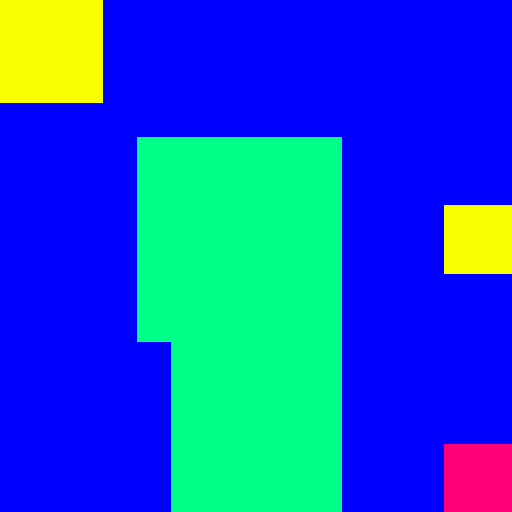

268/301


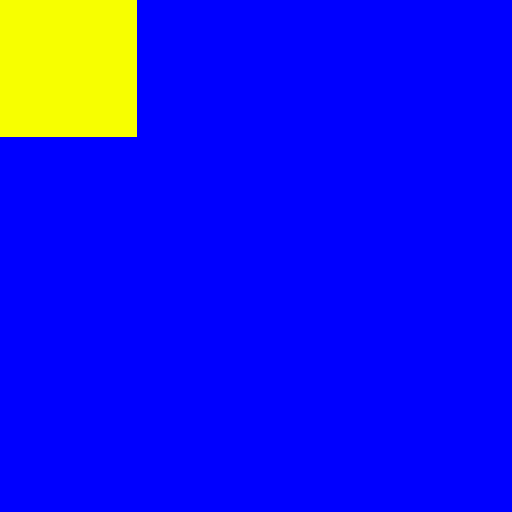

269/301


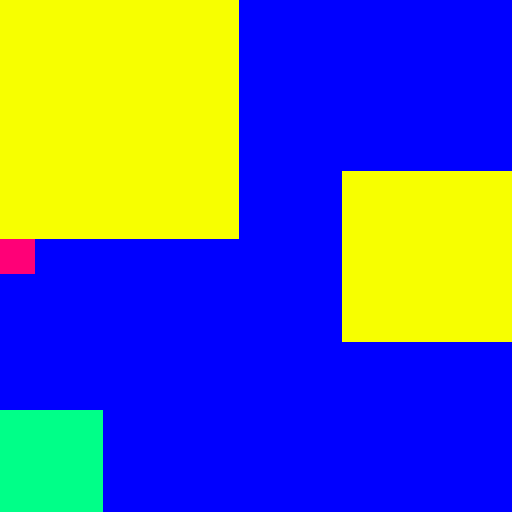

270/301


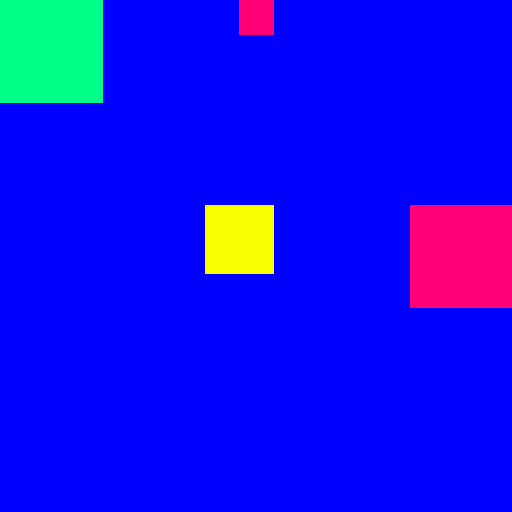

271/301


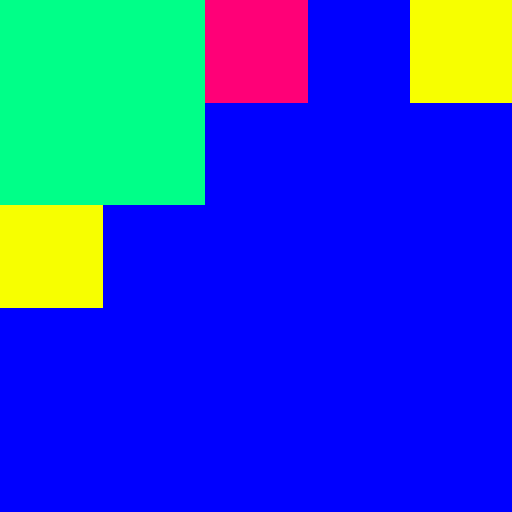

272/301


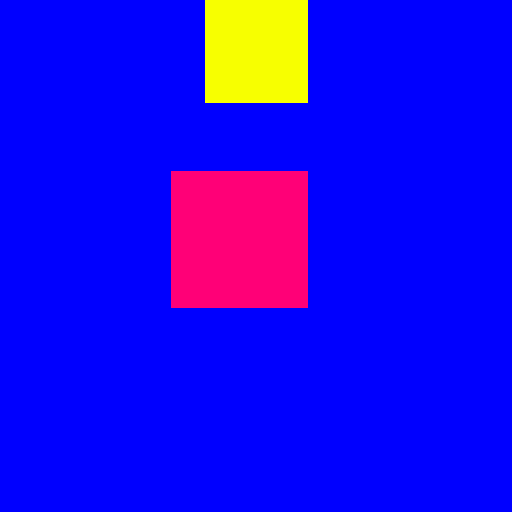

273/301


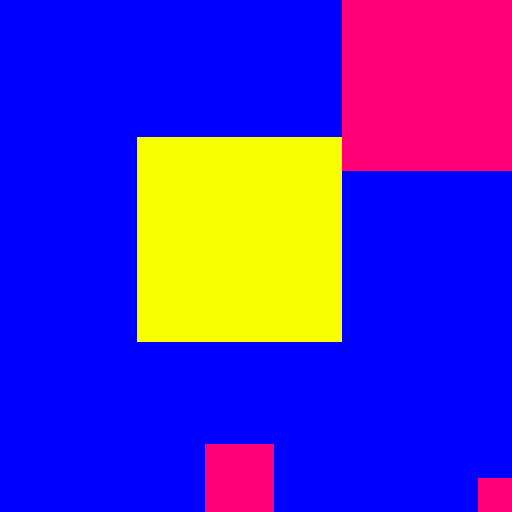

274/301


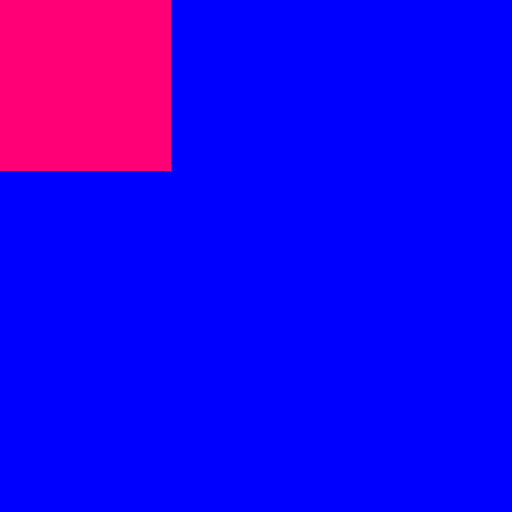

275/301


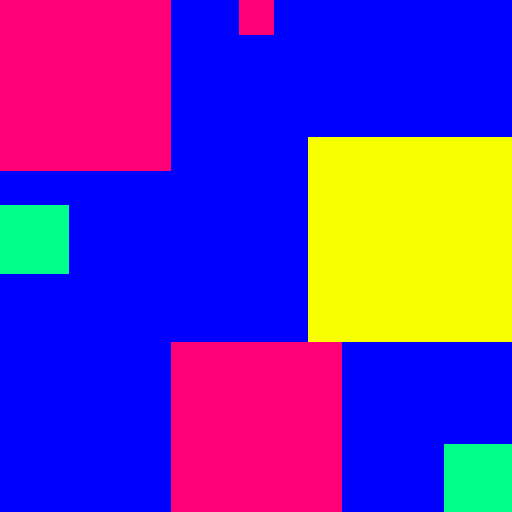

276/301


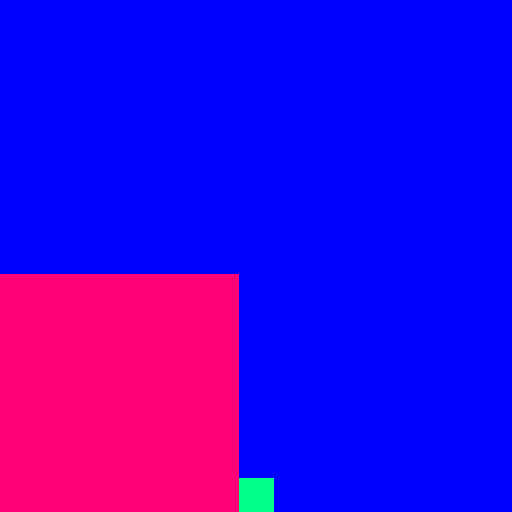

277/301


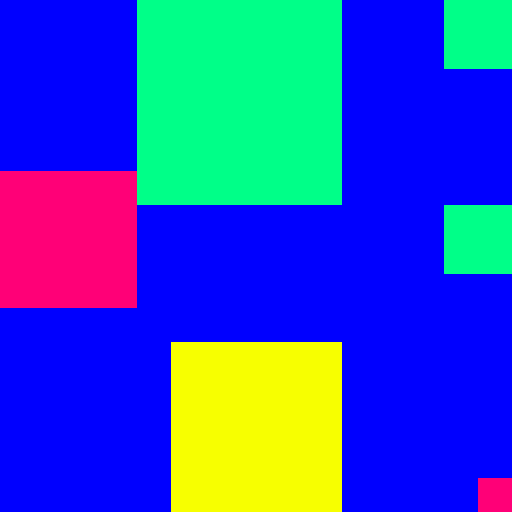

278/301


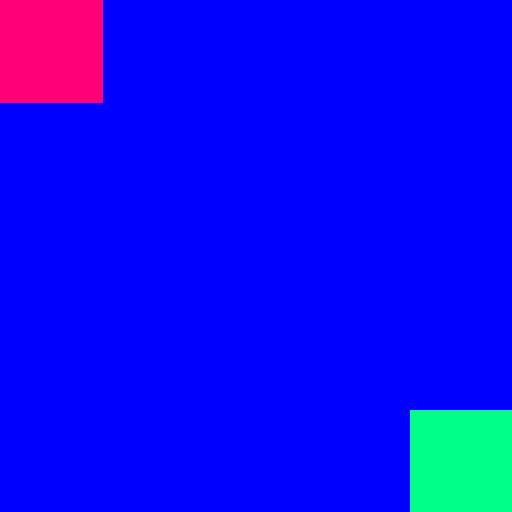

279/301


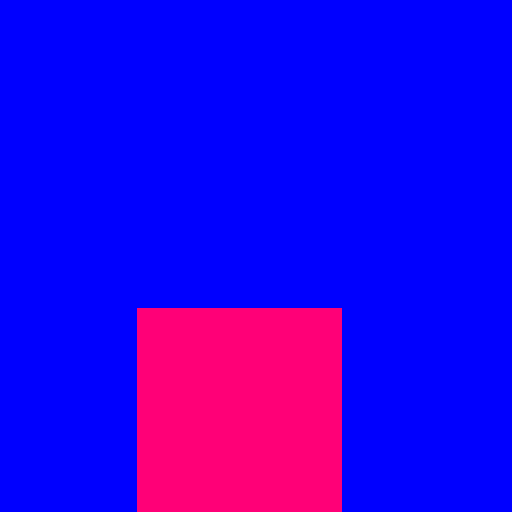

280/301


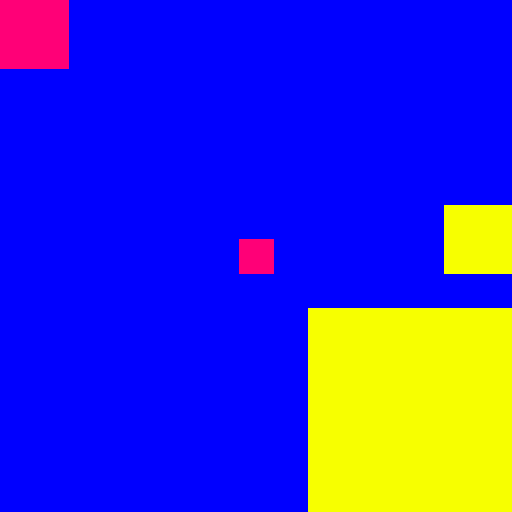

281/301


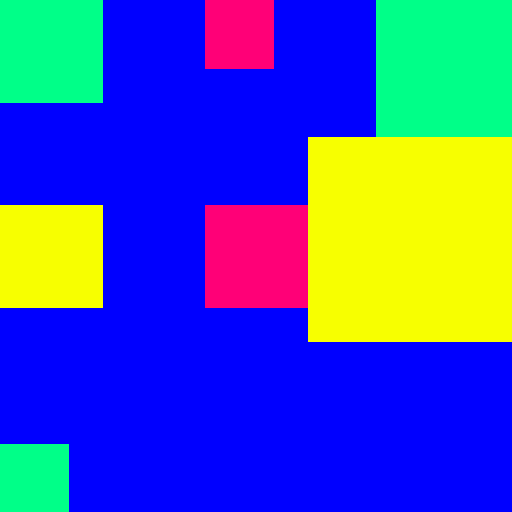

282/301


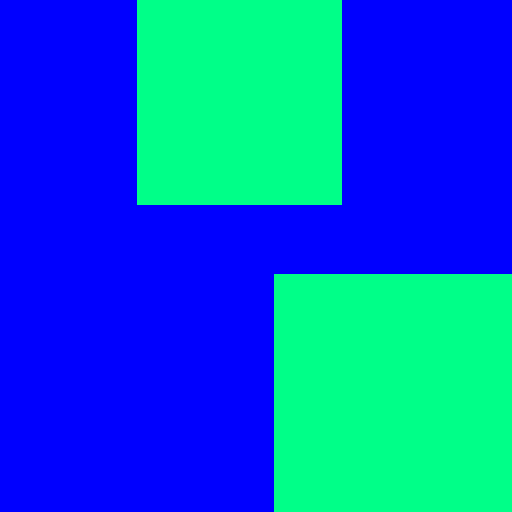

283/301


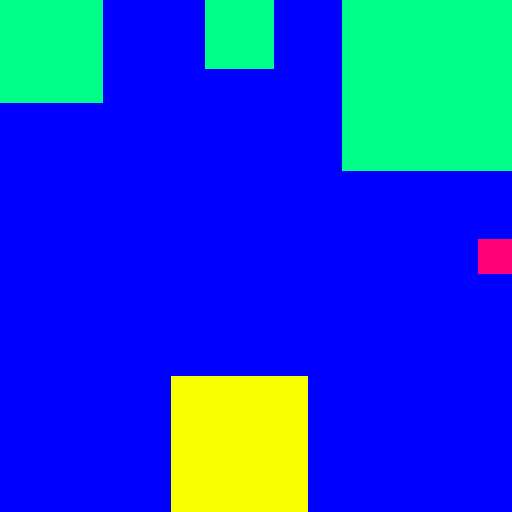

284/301


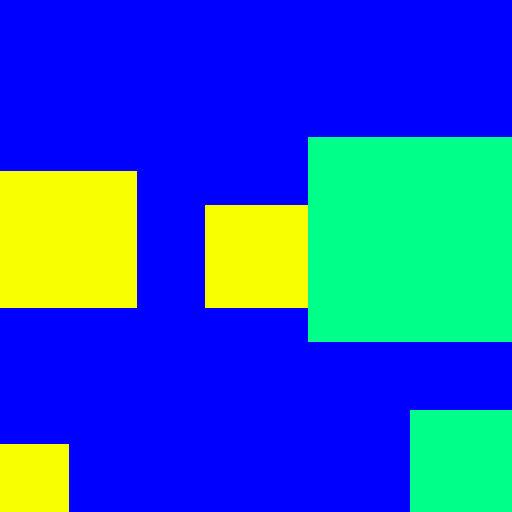

285/301


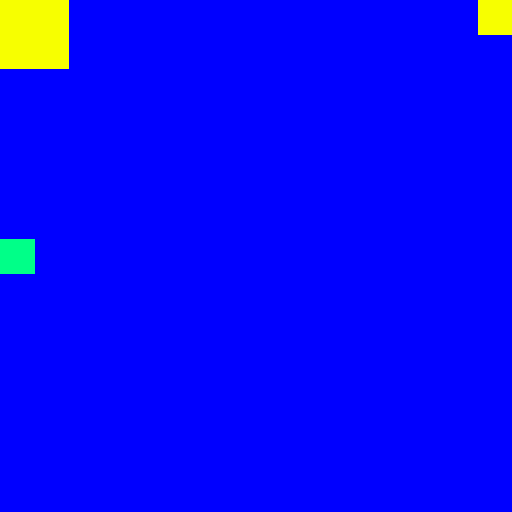

286/301


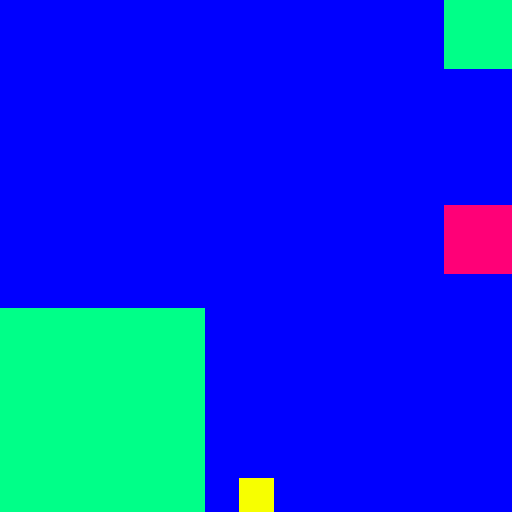

287/301


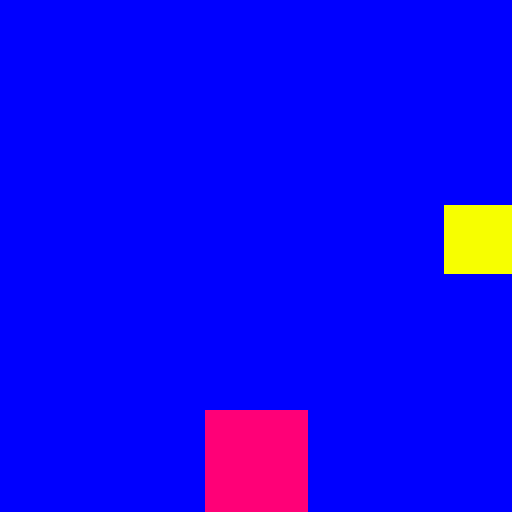

288/301


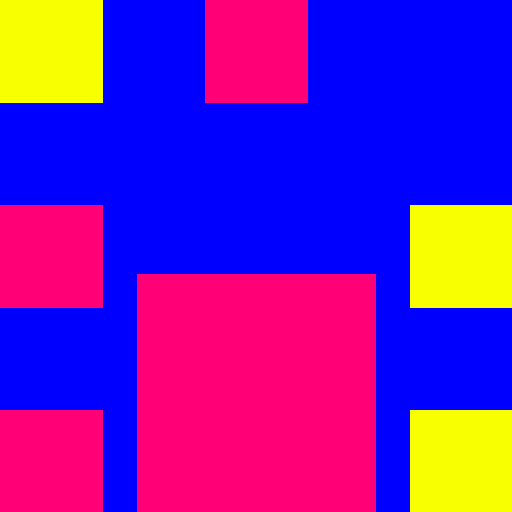

289/301


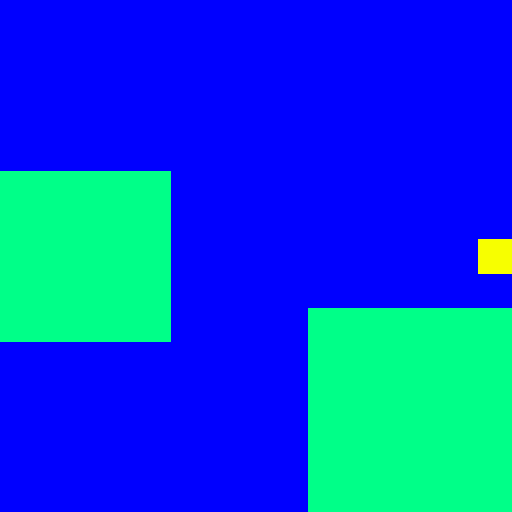

290/301


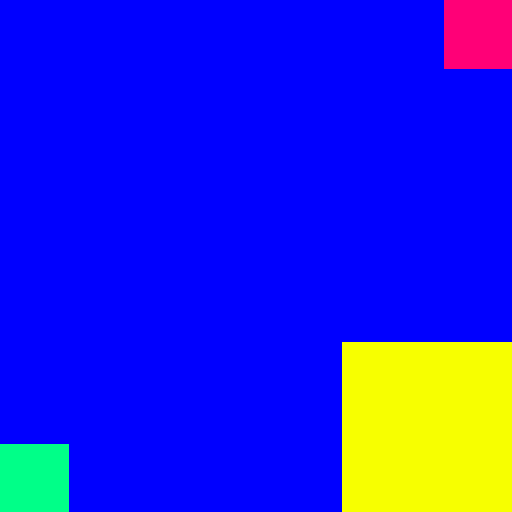

291/301


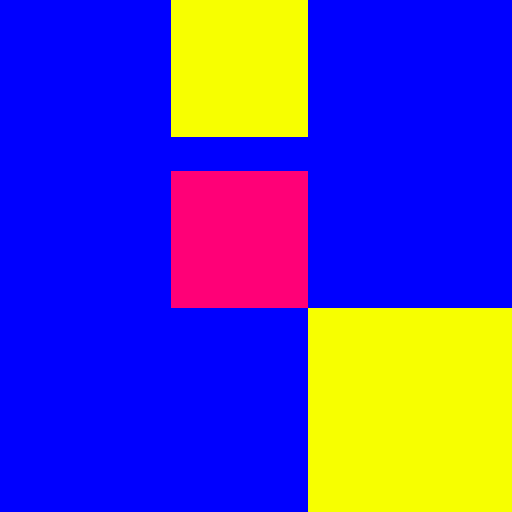

292/301


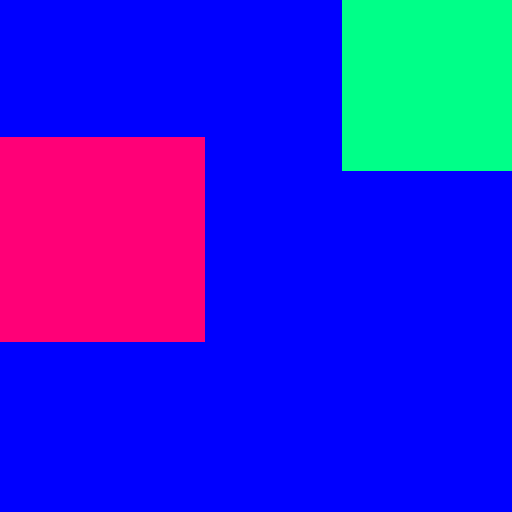

293/301


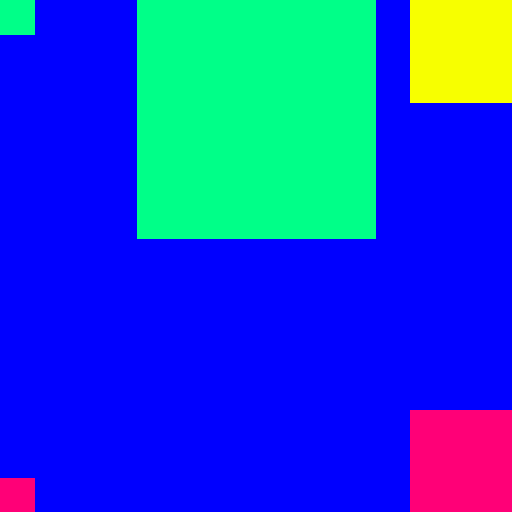

294/301


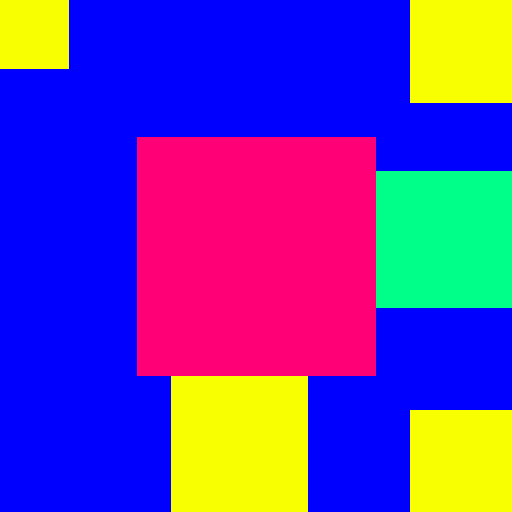

295/301


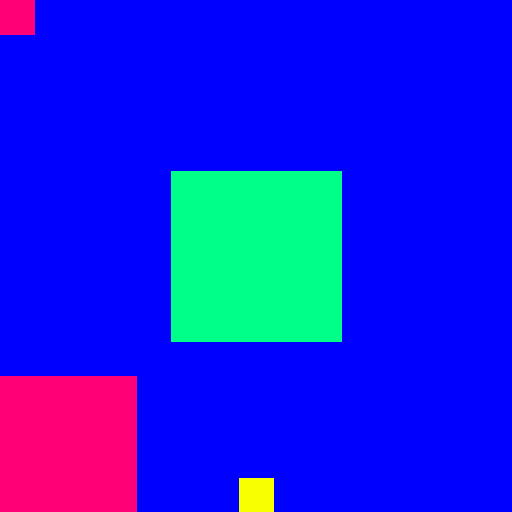

296/301


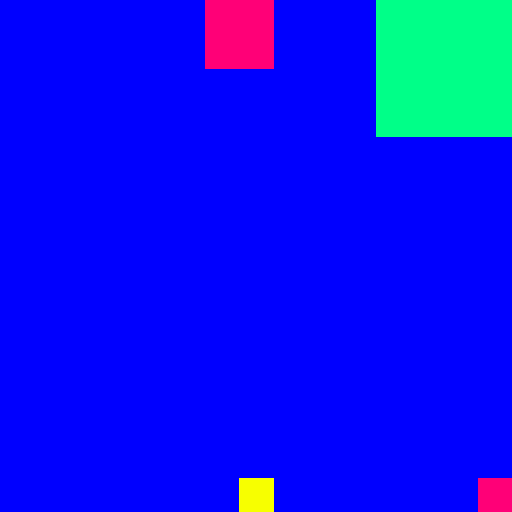

297/301


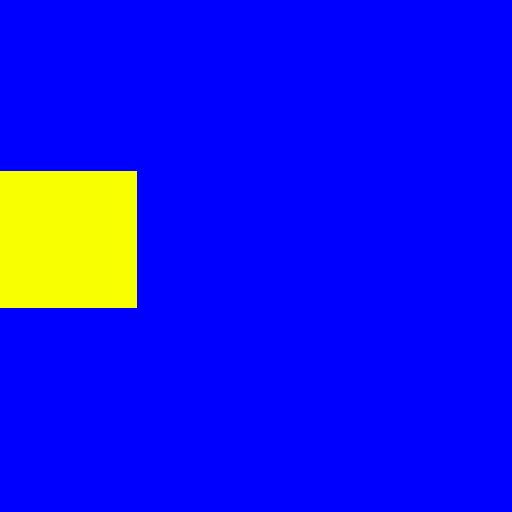

298/301


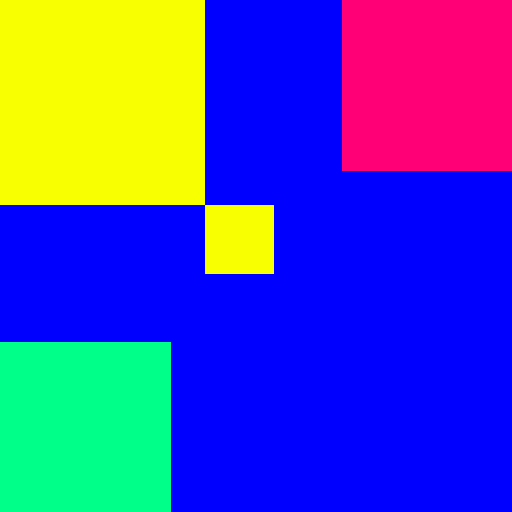

299/301


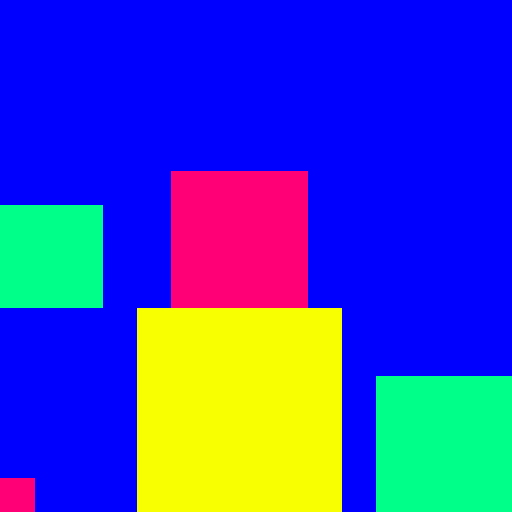

300/301


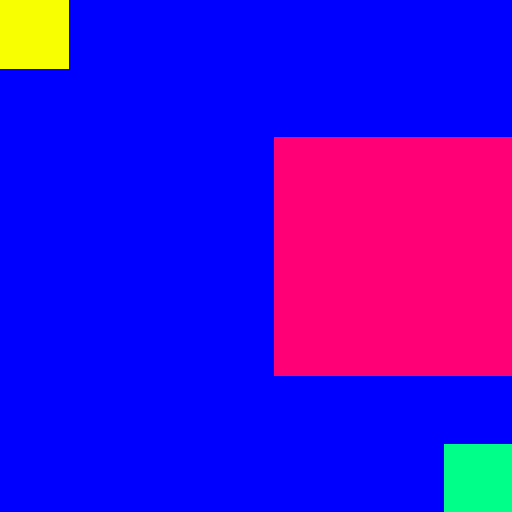

301/301


In [37]:
database_size = 300
room_size = (15, 15)
limit_of_elements = (1, 10)
elements_types = len(Room.objects)
images_width = 1024
positions = [
    "top left", "center top", "top right",
    "center left", "center", "center right",
    "bottom left", "center bottom", "bottom right"
]

all_rooms = []
random.seed()
for i in range(database_size + 1):
  print("room ", i)
  room = Room(room_size)
  number_elements = random.randint(limit_of_elements[0], limit_of_elements[1])
  print(f"    {number_elements} elementos")
  for i in range(number_elements):
    element = random.randint(0, elements_types - 1)
    size = random.randint(1, int(min(room_size) / 2))
    position = positions[random.randint(0, len(positions)-1)]
    print(f'    Elemento: {element} en posición {position}')
    room.addObject(Room.objects[element], size, position)
  room.list_prompt()
  all_rooms.append(room)

print(len(all_rooms))
for i in range(len(all_rooms)):
  ruta_imagen_drive = ruta_base + "/room_" + str(i) + ".jpg"
  image = all_rooms[i].generateImage()
  cv2.imwrite(ruta_imagen_drive, image)
  cv2_imshow(image)
  print(f'{i + 1}/{len(all_rooms)}')
  ruta_text_drive = ruta_base + "/room_" + str(i) + ".txt"
  with open(ruta_text_drive , 'w', encoding="utf-8") as file:
    file.write("\n".join(all_rooms[i].text))
